# ANALYSE D'INDICATEURS SUR LA VIE SCOLAIRE ET EXTRA-SCOLAIRE DES ÉLÈVES DE L'INSA TOULOUSE

### I. Objectif

Avec pour objectif d'aider tous les étudiants admis à obtenir leur diplôme quelle que soit leur origine sociale ou géographique, ou leur parcours scolaire avant d'entrer à l'INSA. Nous souhaitons donc pouvoir connaître les facteurs qui peuvent affecter la capacité de réussitte des étudiants afin de pouvoir trouver des solutions pour améliorer le taux de réussite des étudiants de l'INSA Toulouse.

    Modélisation du problème :
    Tout d'abord, dans le but que tous les étudiants obtiennent leur diplôme, nous allons étudier la variable REDOUBLEMENT par d'autres variables (facteurs affectant les étudiants). Pour les étudiants encore à l'école, cette variable décrit le mieux la probabilité de finir leurs études ou non. Nous voulons identifier les facteurs influençant le redoublement afin de limiter ce phénomène et d'améliorer le taux d'étudiants obtenant leur diplôme ou le faisant dans les délais impartis.
    De plus, nous pouvons étudier la variable RATTRAPAGES pour trouver des moyens de limiter les examens de rattrapage ou utiliser la variable CLASSEMENTDERNIER pour examiner quels facteurs aident les étudiants à obtenir de meilleurs résultats. 
    
    
**Cependant**, le problème se pose pour la variable CLASSEMENTDERNIER où environ un tiers choisissent "Je ne sais pas", ce qui complique le traitement car nous manquons d'informations et, si nous supprimons ces réponses, nous perdons un grand nombre d'observations. De plus, il est très difficile d'obtenir des informations pour les étudiants de première année ou les nouveaux entrants car lors de cette enquête, nous étions au deuxième semestre de l'année scolaire, ce qui signifie qu'ils n'ont passé qu'un semestre. Par conséquent, ils n'ont pas de résultats pour REDOUBLEMENT ou CLASSEMENTDERNIER, et la variable RATTRAPAGES, qui représente la moyenne du nombre de redoublements pendant toute la durée des études, est basée sur un échantillon trop petit. Je pense qu'il serait peut-être possible de séparer ces étudiants dans un jeu de données distinct, et nous analyserions alors les facteurs influençant leur capacité à s'adapter et à s'intégrer aux études à l'INSA Toulouse.
    

## II. Préparer les données.

### II.1. Découvrir des données 
Nous avons les données collectées d'une enquête réalisée par des étudiants de l'INSA Toulouse en mai 2024, effectuée via l'application Limesurvey. Ensuite, nous avons un fichier Excel contenant des lignes représentant chaque étudiant et des colonnes correspondant aux réponses. De plus, nous avons un fichier PDF 'Statistiques rapides' décrivant la distribution des réponses pour chaque question, ce qui nous aide à obtenir une vision plus détaillée des questions et des données que nous avons.

### II.2. Transformer des données 

Comme la plupart des questions sont à choix multiples, la réponse à une question ne se trouve pas dans une colonne mais dans plusieurs colonnes. Nous devons donc convertir ces colonnes en une seule colonne.

À cette étape, je me suis basé sur les résultats du fichier Excel des trois membres de l'équipe qui ont travaillé sur le projet précédent. Nous utilisons une formule conditionnelle dans Excel ; si la valeur de la colonne est "oui", elle renverra le résultat correspondant à la valeur de cette colonne. Cependant, après vérification, j'ai constaté qu'ils n'ont pas pris en compte les données de certaines questions, comme COMMENTAIRE, COURSNOTES(TD), COURSNOTES(TP), CONCENTRATIONPERSO, LOISIRSIMPACT, PREPMETIER, DOUBLEDIPLOME. Ils ont expliqué que cela était dû au fait qu'ils estimaient que ces variables pouvaient avoir une forte corrélation avec une autre variable, ou que ces variables avaient un taux élevé de valeurs non affichées, ou que tous les résultats se concentraient sur une seule valeur, etc. Mais je pense que cela n'est qu'une partie de leur ressenti, car ils n'ont pas utilisé de méthodes théoriques pour vérifier. Je souhaite donc utiliser tous les résultats des questions du sondage, vérifier le taux de données manquantes ou la corrélation des variables, puis les traiter ensuite.


En outre, pour les questions avec des valeurs de choix "Autre", où les répondants devaient entrer leur propre réponse, comme pour LOGEMENTTYPE, nous avons remarqué qu'il n'y avait pas beaucoup de valeurs "Autre". Nous avons donc regroupé manuellement ces valeurs "Autre" en catégories existantes. Par exemple, "concubinage", "avec ma copine", "en couple", "avec mon frère", "chez un ami" ont été regroupés sous "colocation", et "CROUS", "Logement étudiant", "maison individuelle" ont été regroupés sous "seul".

De plus, pour la variable DOUBLEDIPLOME, je recode les réponses choisies "Autre" en "Oui" ou "Non". Pour les cas indiquant une demande en cours, un souhait d'étudier ou une intention d'étudier l'année prochaine, je les recode en "Non". Selon moi, notre étude se base sur la variable RATTRAPPAGES, la moyenne du nombre de redoublements des semestres déjà étudiés. Par conséquent, si la double diplomation est envisagée dans le futur, cela n'a pas encore d'impact sur la variable cible.

Voici les résultats obtenus après le traitement des données sur Excel. Le fichier comprend 60 colonnes correspondant à 60 variables (sans compter la colonne ID) et 1182 lignes correspondant aux réponses de 1182 étudiants.


In [1]:
library(readxl) #Pour lire le fichier Excel
library(dplyr) #Pour convertir les variables de type 'chr' en type 'factor'
library(ggplot2) #Pour créer des graphiques
library(rlang) #Pour l'évaluation tidyeval
library(gridExtra) # Pour arranger plusieurs graphiques dans une grille
library(ggcorrplot) #Pour visualiser la matrice de corrélation.
library(reshape2) #Pour manipuler les données
library(writexl)
library(randomForest)
library(caret)  # For cross-validation
library(forcats)
library(xgboost)
library(FactoMineR)  # Pour réaliser l'Analyse des Correspondances Multiples (MCA)
library(factoextra)  # Pour visualiser les résultats de la MCA
library(car)
library(gplots)
library(reshape2)
library(glmnet)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'ggcorrplot' was built under R version 4.4.1"
Warning message:
"package 'writexl' was built under R version 4.4.1"
Warning message:
"package 'randomForest' was built under R version 4.4.1"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:gridExtra':

    combine


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'caret' was built under R version 4.4.1"
Loading required package: lattice

Warning message:
"package 'xgboost' was built under R vers

In [2]:
# Lire le fichier Excel "results-survey278778.xlsx" qui se trouve dans le même répertoire que le script R
insa <- read_excel("survey_Luan.xlsx")
# Sélectionner les 60 variables
insa <- insa[, 2:61]


In [3]:
# Afficher la taille du dataframe
print(dim(insa))

[1] 1182   60


In [4]:
# Afficher les premières lignes du dataframe
print(str(insa))

tibble [1,182 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : chr [1:1182] "15-30min" "5-15min" "0-5min" "5-15min" ...
 $ LOGEMENTTYPE      : chr [1:1182] "seul" "seul" "seul" "seul" ...
 $ LOGEMENTSURFACE   : chr [1:1182] "+ 30m2" "+ 30m2" "10-20m2" "+ 30m2" ...
 $ LOGEMENTBIEN      : chr [1:1182] "tout à fait" "tout à fait" "plutôt oui" "tout à fait" ...
 $ ACT_PRO           : chr [1:1182] "aucune" "aucune" "aucune" "aucune" ...
 $ BOURSIER          : chr [1:1182] "echelon 1-3" "non" "non" "non" ...
 $ HANDICAP          : chr [1:1182] "non" "non" "non" "non" ...
 $ TIERSTEMPS        : chr [1:1182] "Non" "Non" "Non" "Non" ...
 $ STRESS            : chr [1:1182] "souvent" "souvent" "souvent" "toujours" ...
 $ COMMENTAIRE       : chr [1:1182] "jamais" "parfois" "parfois" "parfois" ...
 $ COMCONSTRUCTIFS   : chr [1:1182] "pas commentaire" "plutôt oui" "plutôt oui" "plutôt oui" ...
 $ ETUDE_SEM         : chr [1:1182] "0-1h" "+4h" "1-2h" "1-2h" ...
 $ ETUDEWE           : chr [1:11

    Nous constatons que les valeurs des variables sont encodées sous forme de chr[] alors que nos données devraient être encodées sous forme de facteurs pour les variables qualitatives. Par conséquent, nous allons convertir toutes les variables en facteurs.

In [5]:
# Convertir toutes les colonnes de type 'chr' en 'factor' avec dplyr
insa <- insa %>%
  mutate_if(is.character, as.factor)
# Afficher la structure du dataframe après convertir
print(str(insa))

tibble [1,182 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "+30min","0-5min",..: 3 4 2 4 4 4 3 3 2 2 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "colocation","foyer familial",..: 3 3 3 3 1 1 3 3 3 3 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","+ 30m2",..: 2 2 3 2 5 5 4 2 3 4 ...
 $ LOGEMENTBIEN      : Factor w/ 4 levels "pas du tout",..: 4 4 3 4 4 4 4 4 3 3 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui +15h",..: 1 1 1 1 1 3 1 2 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "echelon 0bis",..: 2 4 4 4 4 4 4 4 1 4 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 5 levels "non","pas commentaire",..: 2 4 4 4 4 4

    Nous constatons que les variables ont été converties en facteurs, mais l'ordre des modalités est mélangé. Cela rend le suivi de chaque variable difficile et je trouve cela déroutant. Par conséquent, nous devons convertir la variable en facteur avec un ordre spécifique.

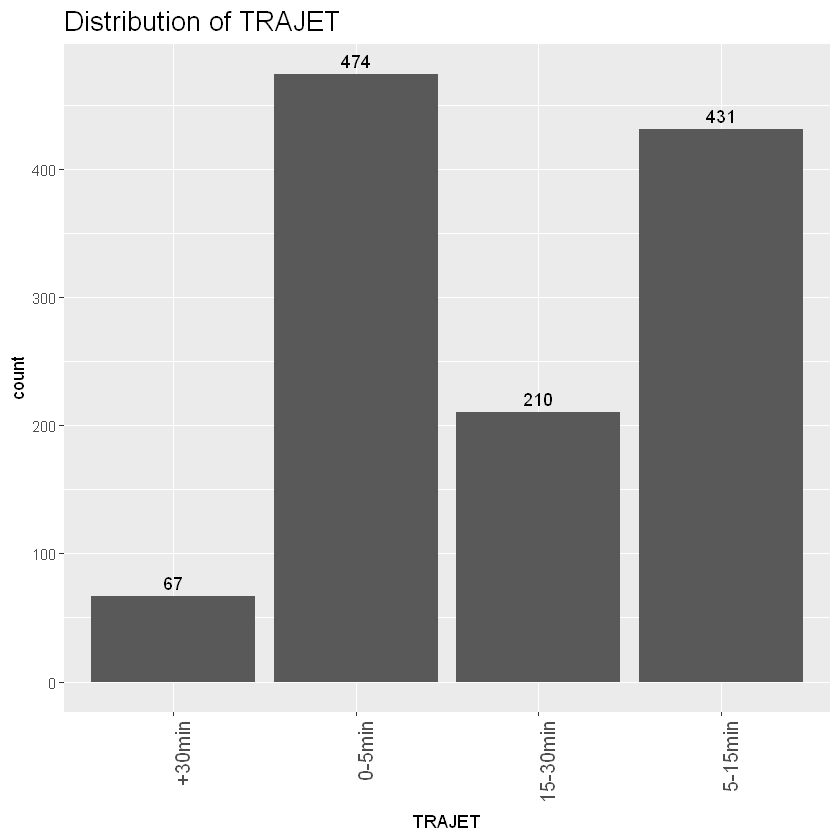

In [6]:
# Créer le graphique de distribution pour la variable TRAJET
p <- ggplot(insa, aes(x = TRAJET)) +
  geom_bar() +
  geom_text(stat='count', aes(label=after_stat(count)), vjust=-0.5) +
  ggtitle("Distribution of TRAJET") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12),
        plot.title = element_text(size = 16))

# Afficher le graphique
print(p)

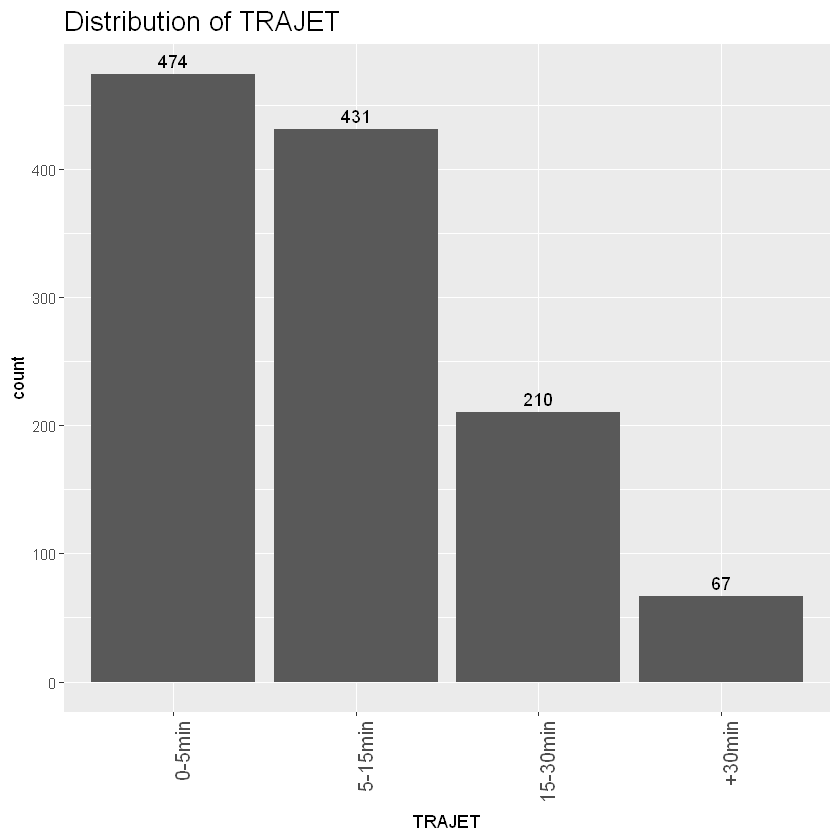

In [7]:
# Convertir la variable en facteur avec un ordre spécifique
insa$TRAJET <- factor(insa$TRAJET, levels = c("0-5min", "5-15min", "15-30min", "+30min"))

# Créer le graphique de distribution pour la variable TRAJET
p <- ggplot(insa, aes(x = TRAJET)) +
  geom_bar() +
  geom_text(stat='count', aes(label=after_stat(count)), vjust=-0.5) +
  ggtitle("Distribution of TRAJET") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12),
        plot.title = element_text(size = 16))

# Afficher le graphique
print(p)

    Nous procéderons de la même manière pour toutes les variables.

In [8]:
levels_list <- list(
  TRAJET = c("0-5min", "5-15min", "15-30min", "+30min"),
  LOGEMENTTYPE = c("seul", "colocation", "foyer familial"),
  LOGEMENTSURFACE = c("- 10m2", "10-20m2", "20-30m2", "+ 30m2","coloc ou foyer familial"),
  LOGEMENTBIEN = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  ACT_PRO = c("aucune", "oui 1-5h", "oui 5-10h","oui 10-15h", "oui +15h"),
  BOURSIER = c("non","echelon 0bis", "echelon 1-3", "echelon 4-7"),
  HANDICAP = c("non", "oui"),
  TIERSTEMPS = c("Non", "Oui"),
  STRESS = c("jamais", "parfois", "souvent", "toujours"),
  COMMENTAIRE = c("jamais", "parfois", "souvent", "toujours"),
  COMCONSTRUCTIFS = c("pas commentaire","non", "plutôt non", "plutôt oui", "tout à fait"),
  ETUDE_SEM = c("0h", "0-1h", "1-2h", "2-4h", "+4h"),
  ETUDEWE = c("0h","0-1h","1-2h", "2-4h", "4-6h", "6-8h", "+8h"),
  ETUDEGROUPE = c("jamais", "parfois", "souvent", "toujours"),
  ETUDEDEHORS = c("jamais", "parfois", "souvent", "toujours"),
  ETUDEDOM = c("jamais", "parfois", "souvent", "toujours"),
  PRESENCE_CM = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PRESENCE_TD = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PRESENCE_TP = c("Jamais", "Parfois", "Souvent", "Toujours"),
  CONCENTRATION_CM = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"),
  CONCENTRATION_TD = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"),
  CONCENTRATION_TP = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"),
  PREPCOURS_CM = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PREPCOURS_TD = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PREPCOURS_TP = c("Jamais", "Parfois", "Souvent", "Toujours"),
  COURSNOTES_CM = c("Jamais", "Parfois", "Souvent", "Toujours"),
  COURSNOTES_TD = c("Jamais", "Parfois", "Souvent", "Toujours"),
  COURSNOTES_TP = c("Jamais", "Parfois", "Souvent", "Toujours"),
  REVISIONSDEB = c("semestre", "1 mois avant", "2 semaines avant", "1 semaine avant", "3-4 jours avant", "la veille"),
  CONCENTRATIONPERSO = c("pas du tout", "moyennement", "plutôt oui", "très"),
  CONDITIONSTRAVAIL = c("mauvaises", "moyennes", "plutôt bonnes", "très bonnes"),
  RESSOURCES_SUP = c("jamais", "parfois", "régulièrement", "très souvent"),
  AMIS = c("jamais", "parfois", "régulièrement", "très souvent"),
  FAMILLE = c("jamais", "parfois", "régulièrement", "très souvent"),
  ISOLEMENT = c("jamais", "parfois", "souvent", "toujours"),
  ASSOCIATIF = c("non", "0-1h", "1-5h", "5-10h", "10-15h","15-20h", "+20h"),
  ASSOCIATIF_POSITIF = c("pas d'asso", "pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  ASSOCIATIFFATIGUE = c("pas d'asso", "pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  SPORTTEMPS = c("0-1h", "1-3h", "3-6h", "6-10h", "+10h"),
  SPECTACLES = c("jamais", "rarement", "1/mois", "1/semaine"),
  SPECTACLES_POSITIF = c("pas de spectacles", "pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  SORTIEBAR = c("jamais", "rarement", "1/mois", "1/semaine", "plusieurs fois/semaine", "tous les jours"),
  DETENTE = c("jamais", "parfois", "régulièrement", "très souvent"),
  ECRANS = c("0-1h", "1-2h", "2-4h", "4-6h", "6-8h","+8h"),
  SOMMEIL = c("très insatisfaisante", "plutôt insatisfaisante", "plutôt satisfaisante", "très satisfaisante"),
  ALIMENTATION = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  MOTIVATION = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  SENSATIONREUSSITE = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  ADEQUATION = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  PREPMETIER = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  PROMO = c("1A", "2A", "3A", "4A", "5A"),
  SPECIALITE_PO = c("ICBE", "IMACS", "MIC", "IC", "GB", "GP3E", "GP", "AE", "GMM", "IR", "GC", "GM", "apprentissage", "1A"),
  COHORTE = c("FAS", "NORG", "IBER", "IBER_Fr", "ENG", "ENG_Fr", "AS_Hue", "AS_Fr", "SHN", "Danse-etude", "Musique-etude", "Theatre-etude", "SupENR", "classique"),
  DOUBLEDIPLOME = c("non", "oui"),
  INTEGRATION = c("post-bac", "1A", "2A", "3A", "4A", "5A"),
  BACTYPE = c("Fr", "Fr_etranger", "equi_Fr", "etranger"),
  CLASSEMENT1A = c("0-10%", "10-25%", "25-50%", "50-75%", "75-100%", "redoubl", "amenag", "pas de classement"),
  CLASSEMENTDERNIER = c("0-10%", "10-25%", "25-50%", "50-75%", "75-100%", "jsp"),
  REDOUBLEMENT = c("Non", "Oui"),
  RATTRAPAGES = c("aucun", "1 par semestre", "2/3 par semestre", "+ de 4 par semestre")
)
for (var in names(levels_list)) {
  if (var %in% names(insa)) {
    insa[[var]] <- factor(insa[[var]], levels = levels_list[[var]])
  }
}

str(insa)



tibble [1,182 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 2 3 3 1 1 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 5 3 4 2 3 ...
 $ LOGEMENTBIEN      : Factor w/ 4 levels "pas du tout",..: 4 4 3 4 4 4 4 4 3 3 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 5 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 5 levels "pas commentaire",..: 1 4 4 4 4 4 4 4 3 4

    Nous vérifions s'il y a des valeurs manquantes, ce qui peut nous aider à détecter des fautes d'orthographe lorsque nous réorganisons l'ordre des modalités. 

In [9]:
# Vérifier le nombre de valeurs NA dans chaque variable
na_counts <- sapply(insa, function(x) sum(is.na(x)))
print(na_counts)

            TRAJET       LOGEMENTTYPE    LOGEMENTSURFACE       LOGEMENTBIEN 
                 0                  1                  5                  0 
           ACT_PRO           BOURSIER           HANDICAP         TIERSTEMPS 
                 0                  0                  0                  0 
            STRESS        COMMENTAIRE    COMCONSTRUCTIFS          ETUDE_SEM 
                 0                  0                  0                  0 
           ETUDEWE        ETUDEGROUPE        ETUDEDEHORS           ETUDEDOM 
                 0                  0                  0                  0 
       PRESENCE_CM        PRESENCE_TD        PRESENCE_TP   CONCENTRATION_CM 
                 0                  0                  0                  0 
  CONCENTRATION_TD   CONCENTRATION_TP       PREPCOURS_CM       PREPCOURS_TD 
                 0                  0                  0                  0 
      PREPCOURS_TP      COURSNOTES_CM      COURSNOTES_TD      COURSNOTES_TP 

    En outre, nous constatons qu'il y a des valeurs manquantes pour deux variables, LOGEMENTTYPE et LOGEMENTSURFACE. Pour la variable LOGEMENTTYPE, il y a une option 'Autre' et un étudiant a rempli 'vélo', que nous considérons comme une valeur manquante. De plus, nous avons divisé les résultats de la variable LOGEMENTTYPE en valeurs disponibles, parmi lesquelles 5 valeurs sont classées sous 'seul'. Cependant, lorsque l'option 'Autre' est choisie, il n'y a pas de question sur LOGEMENTSURFACE. Par conséquent, les 5 personnes qui ont choisi 'Autre' de type 'seul' n'ont pas de valeur pour LOGEMENTSURFACE.

    Comme le nombre de valeurs manquantes est faible, nous allons supprimer les individus contenant des valeurs manquantes (nous pourrions utiliser des méthodes telles que calculer la moyenne ou la Random Forest pour imputer la valeur de LOGEMENTSURFACE, mais avec 5 données manquantes sur 1182 (soit 0,423%), nous pouvons les supprimer).

In [10]:
# Supprimer les lignes contenant des valeurs manquantes
insa_cleaned_1 <- na.omit(insa)

# Vérifier la structure du dataframe après la suppression des lignes avec des valeurs manquantes
str(insa_cleaned_1)

write_xlsx(insa_cleaned_1, "insa_cleaned_1.xlsx")

tibble [1,163 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 2 3 3 1 1 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 5 3 4 2 3 ...
 $ LOGEMENTBIEN      : Factor w/ 4 levels "pas du tout",..: 4 4 3 4 4 4 4 4 3 3 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 5 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 5 levels "pas commentaire",..: 1 4 4 4 4 4 4 4 3 4

**Enfin, nous avons un dataframe de 1163x60 correspondant à 1163 individus et 60 variables.**


### II.3. Valider des données

    Maintenant, je veux vérifier qu'il n'y a pas d'erreurs dans le traitement sur Excel. Par conséquent, je vais tracer un graphique de distribution des modalités des variables et le comparer avec le graphique des Statistiques rapides obtenues à partir de l'enquête.

In [11]:
plot_distribution <- function(df, var) {
  p <- ggplot(df, aes(x = !!sym(var))) +
    geom_bar() +
    geom_text(stat = 'count', aes(label = paste0(round(after_stat(count / sum(count)) * 100, 1), "%")), 
              vjust = -0.5, size = 2.5) +
    scale_y_continuous(labels = scales::percent) +
    ggtitle(paste("Distribution de", var)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 8),
          plot.title = element_text(size = 12))
  return(p)
}

# Obtenir la liste des variables à partir des noms des colonnes de insa_clean
variables_to_plot <- names(insa_cleaned_1)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(insa_cleaned_1, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("distributions.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

## III. Analyse statistique descriptive

Avant de plonger dans une analyse approfondie ou des modèles complexes, nous allons analyser ces données pour chaque variable individuellement ou pour des groupes de variables qui sont liées entre elles.

Étant donné que les données comprennent des variables qualitatives et que certaines questions sont interconnectées, où la réponse à une question dépend de la précédente, et que certaines questions reprennent directement le résultat de la réponse précédente, comme c'est le cas pour LOGEMENTTYPE et LOGEMENTSURFACE, COMMENTAIRE et COMCONSTRUCTIFS, ASSOCIATIF et ASSOCIATIF_POSITIF ainsi qu'ASSOCIATIFFATIGUE, SPECTACLES et SPECTACLES_POSITIF. Par exemple, si une personne choisit "jamais" à la question COMMENTAIRE, alors la réponse à COMCONSTRUCTIFS sera automatiquement "pas commentaire". Cela peut entraîner un phénomène où, lorsque nous transformons ces variables en variables indicatrices pour construire des modèles, certaines variables deviennent totalement identiques, rendant ainsi le modèle instable et peu fiable. Par conséquent, nous ne retiendrons qu’une seule variable parmi les variables traitant d’un même sujet afin d’éviter la redondance des données et également de prévenir le phénomène de multicolinéarité.

Méthode choisie :
Nous analyserons toutes les variables décrivant un même sujet afin de comprendre les relations qui existent entre elles. Cependant, au final, nous ne conserverons que la variable qui décrit le mieux ce sujet.

In [12]:
# Fonction pour tracer la distribution d'une variable
plot_distribution <- function(df, var) {
  p <- ggplot(df, aes(x = !!sym(var))) +
    geom_bar(aes(y = after_stat(count / sum(count)))) +
    geom_text(stat = 'count', aes(label = paste0(round(after_stat(count / sum(count)) * 100, 1), "%"), 
                                  y = after_stat(count / sum(count))), 
              vjust = -0.5, size = 4.5) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    labs(y = "Pourcentage") +
    ggtitle(paste("Distribution de", var)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 10),
          plot.title = element_text(size = 12))
  return(p)
}

### Variable TRAJET

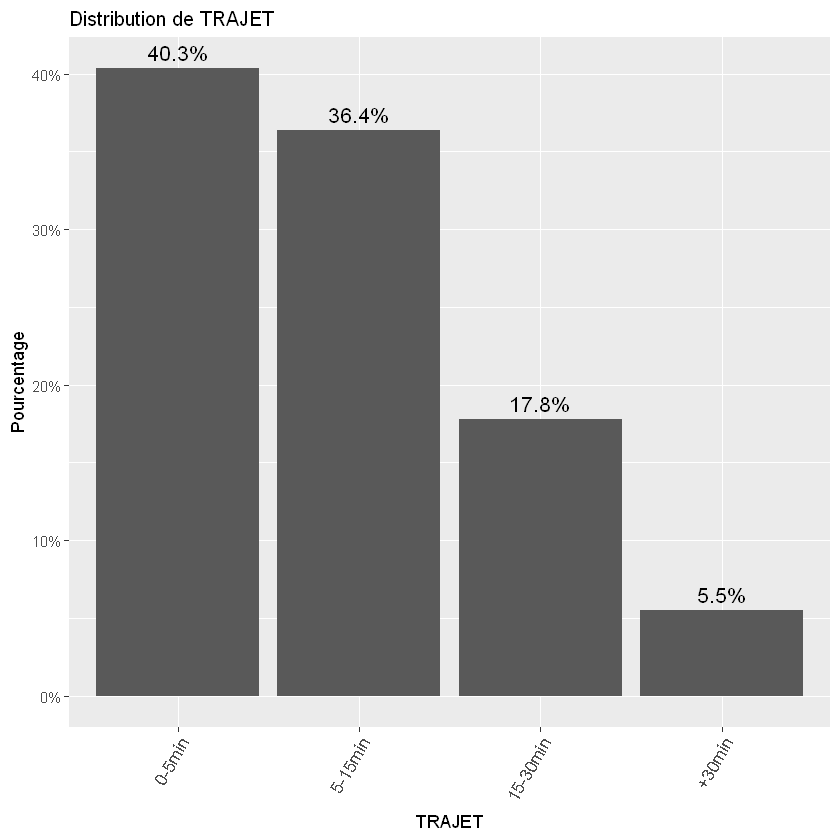

In [13]:
print(plot_distribution(insa_cleaned_1, "TRAJET"))

D'après les résultats de l'enquête, nous constatons que près de 80 % des étudiants mettent moins de 15 minutes pour se rendre à l'école et que près de 95 % des étudiants mettent moins de 30 minutes. Cela montre que la plupart des étudiants bénéficient de bonnes conditions de déplacement (ne nécessitant pas trop de temps) pour se rendre à l'école.

Je souhaite vérifier si le temps de trajet pour se rendre à l'école dépend du type de logement. En effet, je pense que de nombreux étudiants vivent seuls dans des résidences autour de l'école, ce qui rend leur temps de trajet très court. De plus, je me pose si ceux qui ont un temps de trajet long parce qu'ils louent un logement partagé ou qu'ils vivent avec leur famille loin de l'école.

          
           seul colocation foyer familial
  0-5min    441         27              1
  5-15min   319         99              5
  15-30min  108         74             25
  +30min     12         14             38


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 507.4, df = 6, p-value < 2.2e-16



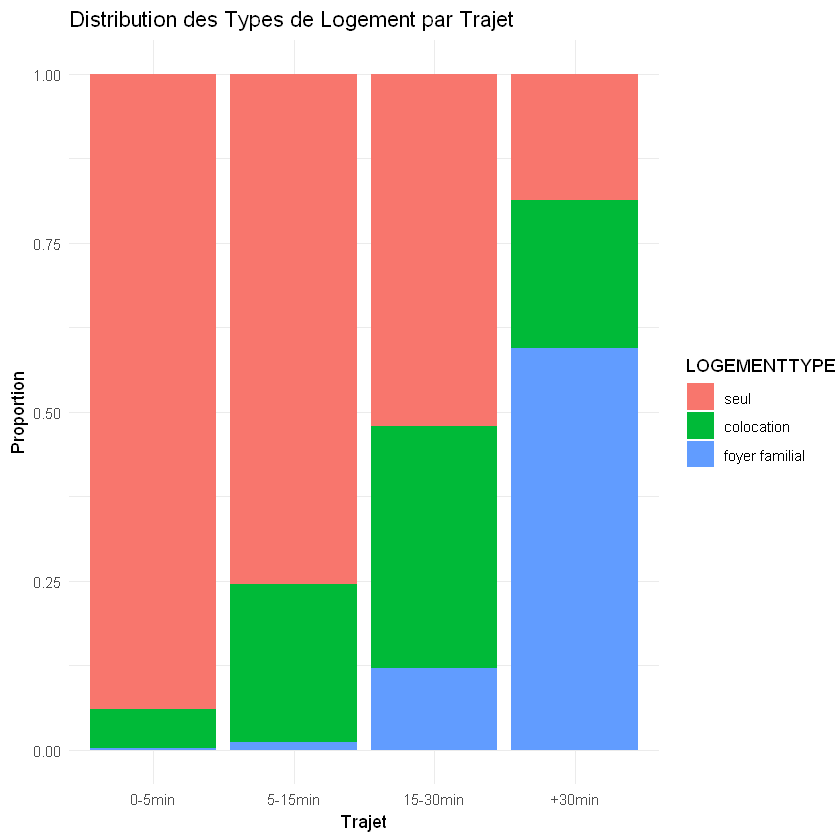

In [14]:
# Créer une table de contingence pour TRAJET et LOGEMENTTYPE
contingency_table <- table(insa_cleaned_1$TRAJET, insa_cleaned_1$LOGEMENTTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

library(ggplot2)

# Visualiser la distribution des LOGEMENTTYPE par TRAJET
ggplot(insa_cleaned_1, aes(x = TRAJET, fill = LOGEMENTTYPE)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution des Types de Logement par Trajet',
       x = 'Trajet',
       y = 'Proportion') +
  theme_minimal()


Les résultats avec une p-value < 2,2e-16 et les graphiques confirment qu'il y a suffisamment de preuves pour conclure qu'il existe une relation entre les deux variables. Nous observons que les étudiants vivant seuls ont tendance à vivre plus près de l'école pour faciliter leurs déplacements, tandis que ceux qui ont un temps de trajet plus long sont principalement ceux qui vivent en foyer familial.

### LOGEMENT

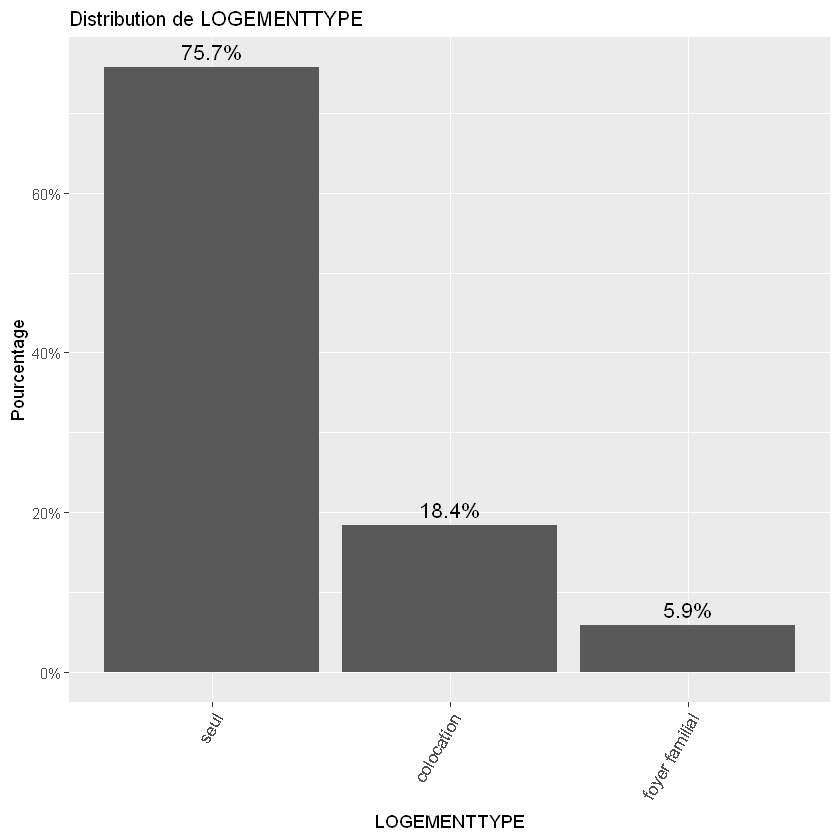

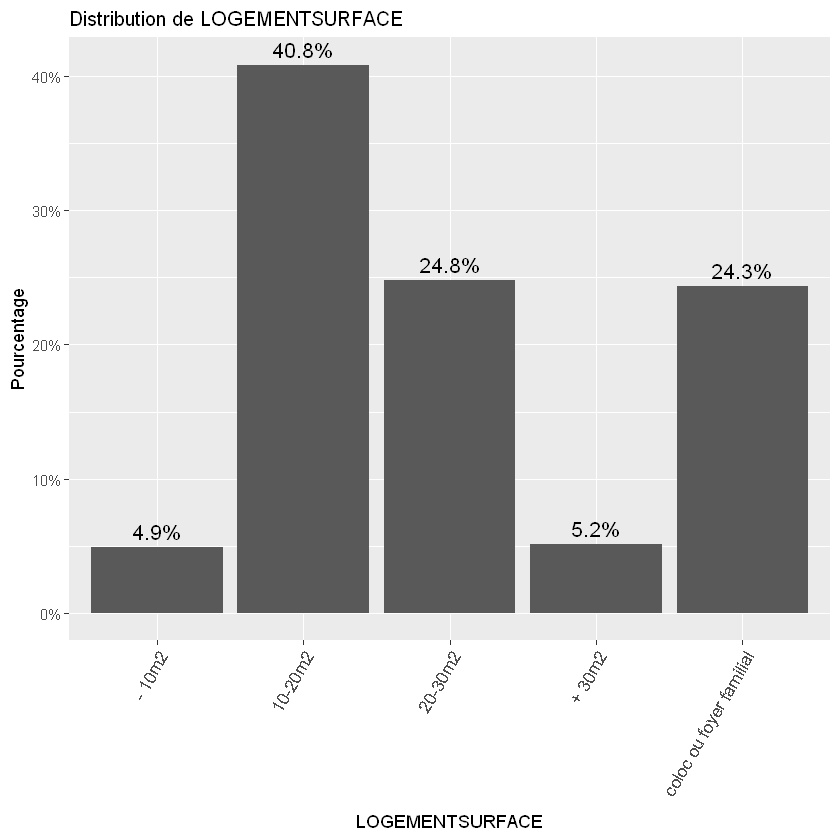

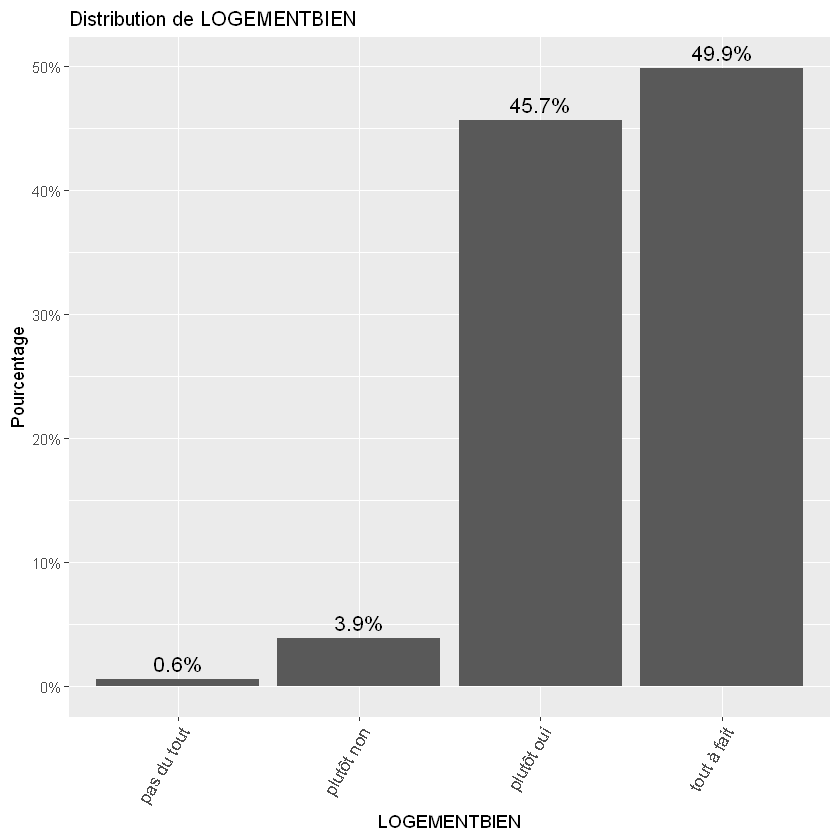

In [15]:
# Liste des variables liées au logement
variables_to_plot <- c("LOGEMENTTYPE", "LOGEMENTSURFACE", "LOGEMENTBIEN")

# Générer et enregistrer des graphiques pour chaque variable du groupe
for (var in variables_to_plot) {
  print(plot_distribution(insa_cleaned_1, var))
}

Nous constatons que la majorité des étudiants (3/4) vivent seuls, avec une forte proportion vivant dans des logements de 10 à 30 m² (86,7 % des 75,7 %, soit 65,6 %)

In [16]:
# Créer une table de contingence pour LOGEMENTSURFACE et LOGEMENTTYPE
contingency_table <- table(insa_cleaned_1$LOGEMENTSURFACE, insa_cleaned_1$LOGEMENTTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
test_chisq <- chisq.test(contingency_table)

# Afficher les résultats du test
print(test_chisq)

                         
                          seul colocation foyer familial
  - 10m2                    57          0              0
  10-20m2                  475          0              0
  20-30m2                  288          0              0
  + 30m2                    60          0              0
  coloc ou foyer familial    0        214             69


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 1163, df = 8, p-value < 2.2e-16



De plus, pour la variable LOGEMENTBIEN, nous observons que presque tous les étudiants se sentent satisfaits de leur logement (>95 %). Enfin, je souhaite vérifier si la satisfaction par rapport au logement dépend du type du logement. 

In [17]:
# Créer une table de contingence pour LOGEMENTBIEN et LOGEMENTTYPE
contingency_table <- table(insa_cleaned_1$LOGEMENTBIEN, insa_cleaned_1$LOGEMENTTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
test_chisq <- chisq.test(contingency_table)

# Afficher les résultats du test
print(test_chisq)


             
              seul colocation foyer familial
  pas du tout    6          1              0
  plutôt non    36          8              1
  plutôt oui   436         74             21
  tout à fait  402        131             47


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 27.13, df = 6, p-value = 0.0001369



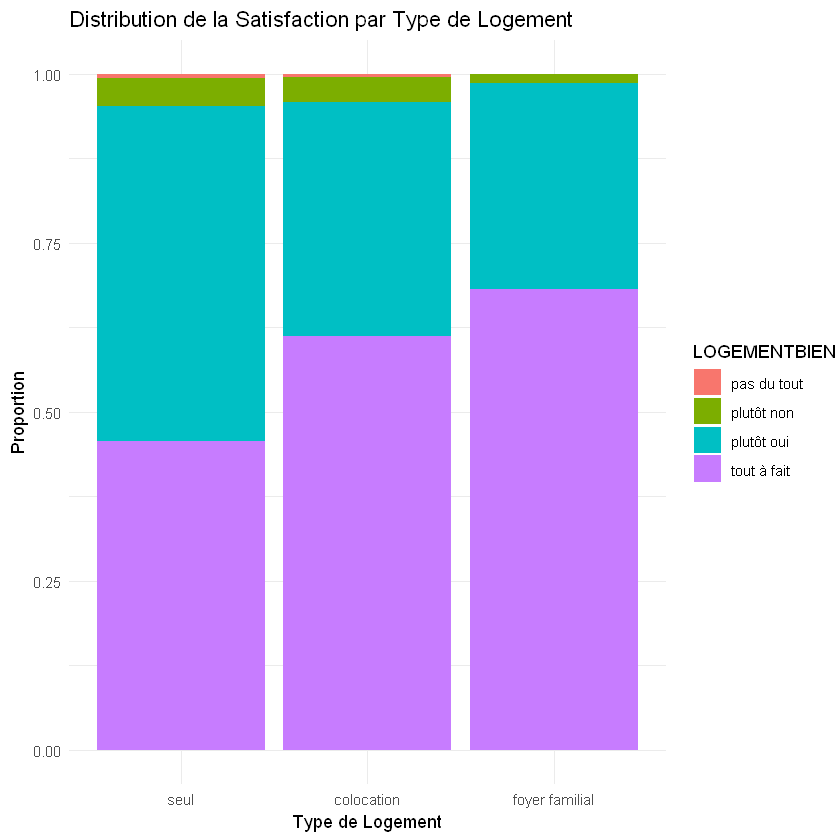

In [18]:
# Visualiser la distribution de la satisfaction par rapport au type de logement
ggplot(insa_cleaned_1, aes(x = LOGEMENTTYPE, fill = LOGEMENTBIEN)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de la Satisfaction par Type de Logement',
       x = 'Type de Logement',
       y = 'Proportion') +
  theme_minimal()

Nous constatons que si l'on regroupe les réponses "plutôt oui" et "tout à fait" pour évaluer la satisfaction des étudiants, il n'y a pas de différence significative dans le taux de satisfaction concernant le logement entre les différents types d'hébergement.

En résumé, pour la variable TRAJET et les variables "LOGEMENTTYPE", "LOGEMENTSURFACE", "LOGEMENTBIEN", nous constatons ce qui suit :

+ La variable TRAJET et la variable "LOGEMENTTYPE" sont dépendantes. Nous observons que les étudiants vivant seuls ont tendance à habiter plus près de l’école pour faciliter leurs déplacements, tandis que ceux ayant un temps de trajet plus long sont principalement ceux qui vivent dans la collocation ou le foyer familial.
+ La variable "LOGEMENTTYPE" et la variable "LOGEMENTSURFACE" sont dépendantes car les réponses aux deux questions sont liées entre elles.
+ La variable "LOGEMENTBIEN", d'après le test du Chi-deux, dépend également de la variable "LOGEMENTTYPE", bien que cette relation ne soit pas très évidente. De plus, la distribution de cette variable est fortement biaisée en faveur de deux modalités, "plutôt oui" et "tout à fait" (représentant plus de 95 %), ce qui rend cette variable peu informative.

Ainsi, j’ai décidé de conserver seulement la variable "LOGEMENTTYPE" pour représenter les variables liées au TRAJET et au logement.

De plus, en analysant ces variables, nous observons que pour la variable TRAJET, environ 80 % des étudiants mettent moins de 15 minutes pour se rendre à l’école et près de 95 % mettent moins de 30 minutes. Quant à la variable "LOGEMENTBIEN", plus de 95 % des étudiants ont choisi "plutôt oui" ou "tout à fait" pour exprimer leur satisfaction. Cela montre que la grande majorité des étudiants de notre école disposent de bonnes conditions de déplacement (ne nécessitant pas beaucoup de temps) pour se rendre à l'école, et que leurs conditions de logement sont également assez satisfaisantes, avec plus de 95 % des réponses indiquant une satisfaction positive.

In [19]:
insa_cleaned_1 <- insa_cleaned_1 %>%
    dplyr::select (-TRAJET, -LOGEMENTSURFACE, -LOGEMENTBIEN)


### Variable ACT_PRO (activité professionnelle)

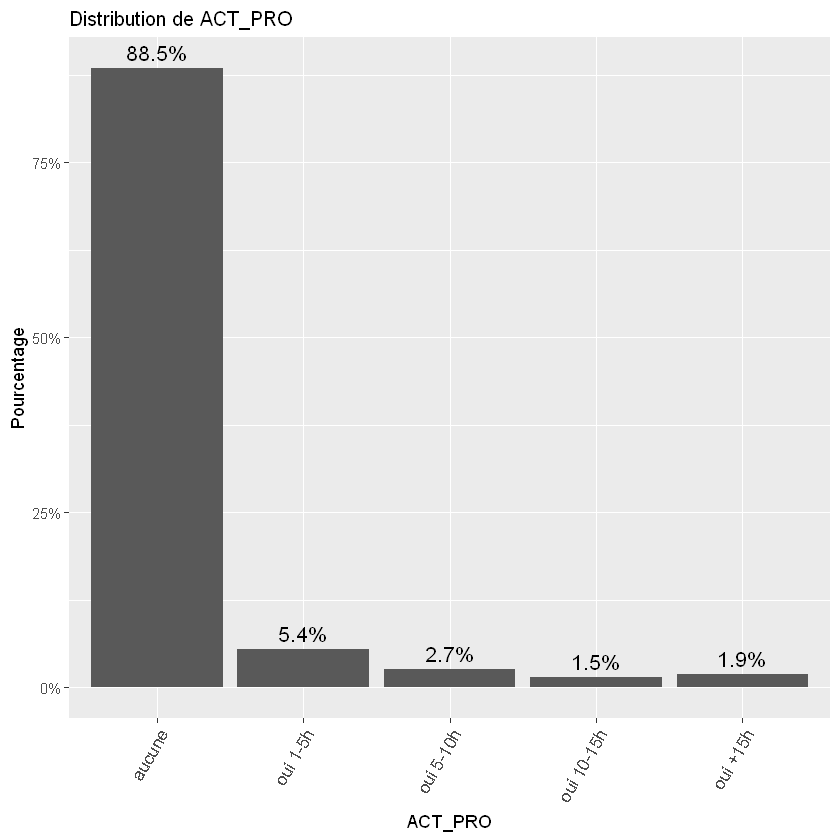

In [20]:
print(plot_distribution(insa_cleaned_1, "ACT_PRO"))

Nous constatons que la majorité des étudiants de notre école (88,5 %) n'exercent pas d'activité rémunérée en parallèle de leurs études. Cela peut s'expliquer par la charge de travail importante de notre programme, qui pousse les étudiants à se concentrer principalement sur leurs études et à ne pas avoir le temps de travailler à côté, ou seulement un temps réduit (moins de 5 heures).

### Variable BOURSIER

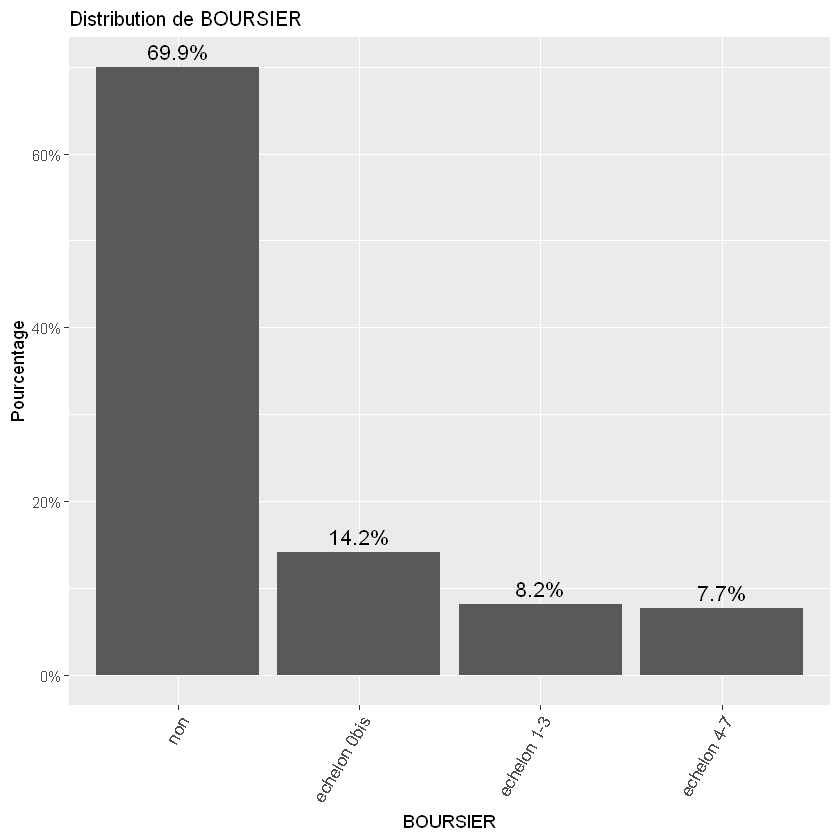

In [21]:
print(plot_distribution(insa_cleaned_1, "BOURSIER"))

Le graphique montre que la majorité des étudiants ne reçoivent pas de soutien financier sous forme de bourse (69,9 %), et parmi ceux qui en bénéficient, la plupart ne reçoivent qu'un faible niveau de soutien (14,2 %). Cela indique qu'un certain nombre d'étudiants ont besoin d'un soutien financier, mais pas de manière significative. Cependant, une minorité d'étudiants ont des besoins financiers élevés ou répondent aux critères pour recevoir des bourses à des niveaux plus élevés.

### Variable HANDICAP

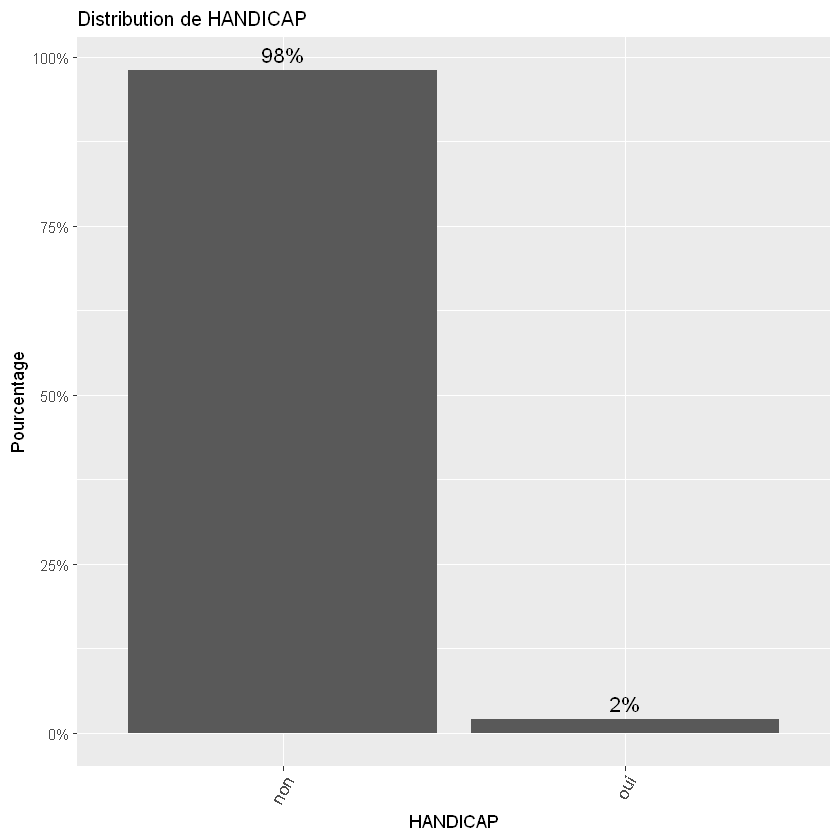

In [22]:
print(plot_distribution(insa_cleaned_1, "HANDICAP"))

Le graphique montre que la majorité des étudiants ne rencontrent pas de problèmes de handicap (98%), et qu'il n'y a qu'un petit nombre d'étudiants en situation de handicap. Cependant, il est nécessaire de mettre en place des mesures pour aider ces étudiants en difficulté.

### Variable TIERSTEMPS

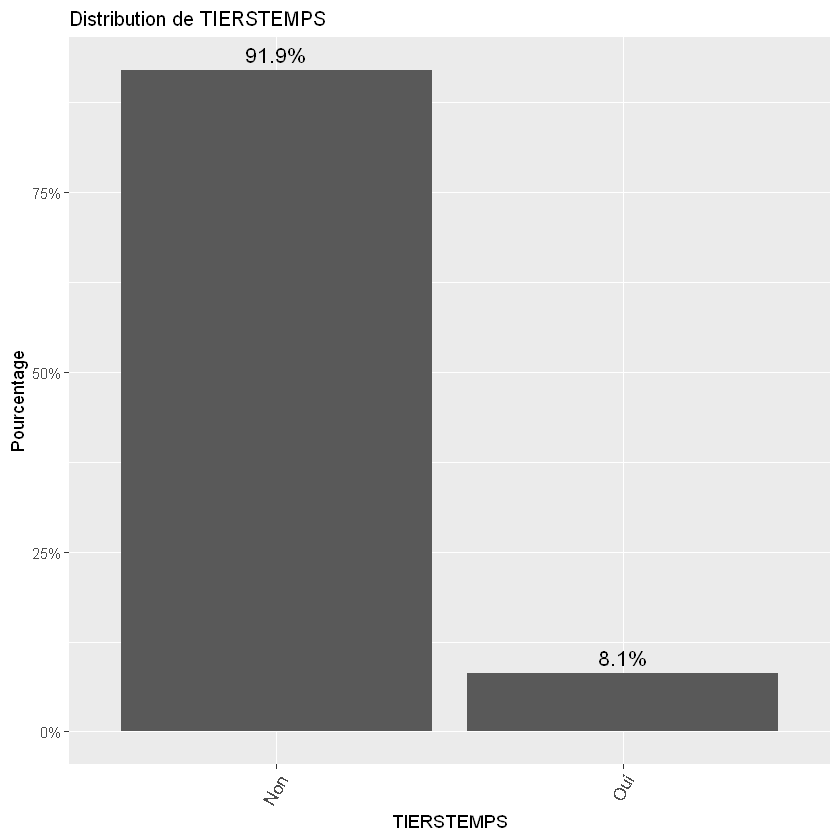

In [23]:
print(plot_distribution(insa_cleaned_1, "TIERSTEMPS"))

In [24]:
# Créer une table de contingence pour TIERSTEMPS et BACTYPE
contingency_table <- table(insa_cleaned_1$TIERSTEMPS, insa_cleaned_1$BACTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

# Interprétation du résultat
if (chi_square_test$p.value < 0.05) {
  print("Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et BACTYPE.")
} else {
  print("Nous ne rejetons pas l'hypothèse nulle (H0). Il n'y a pas de relation significative entre TIERSTEMPS et BACTYPE.")
}



     
       Fr Fr_etranger equi_Fr etranger
  Non 964          54       5       46
  Oui  50           3       1       40


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 185.71, df = 3, p-value < 2.2e-16

[1] "Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et BACTYPE."


In [25]:
# Créer une table de contingence entre TIERSTEMPS et HANDICAP
contingency_table <- table(insa_cleaned_1$TIERSTEMPS, insa_cleaned_1$HANDICAP)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test de Fisher Exact
fisher_test <- fisher.test(contingency_table)

# Afficher les résultats du test de Fisher
print(fisher_test)

# Interprétation du résultat
if (fisher_test$p.value < 0.05) {
  # Si p-value est inférieure à 0.05, il y a une relation significative
  print("Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et HANDICAP.")
} else {
  # Si p-value est supérieure ou égale à 0.05, nous ne rejetons pas H0
  print("Nous ne rejetons pas l'hypothèse nulle (H0). Il n'y a pas de relation significative entre TIERSTEMPS et HANDICAP.")
}

     
       non  oui
  Non 1064    5
  Oui   76   18

	Fisher's Exact Test for Count Data

data:  contingency_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
  17.26685 176.31845
sample estimates:
odds ratio 
  49.91262 

[1] "Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et HANDICAP."


Le graphique montre que la majorité (91.9%) des étudiants n'ont pas besoin de soutien en termes de temps supplémentaire, et seulement quelques étudiants bénéficient de ce soutien. D'après le tableau de contingence et le test du Khi-deux, nous constatons que la variable TIERSTEMPS dépend des variables BACTYPE et HANDICAP. Cela est presque évident, car la majorité des étudiants bénéficiant de TIERSTEMPS sont des étudiants étrangers ayant des difficultés en français et des étudiants en situation de handicap.

### Variable STRESS

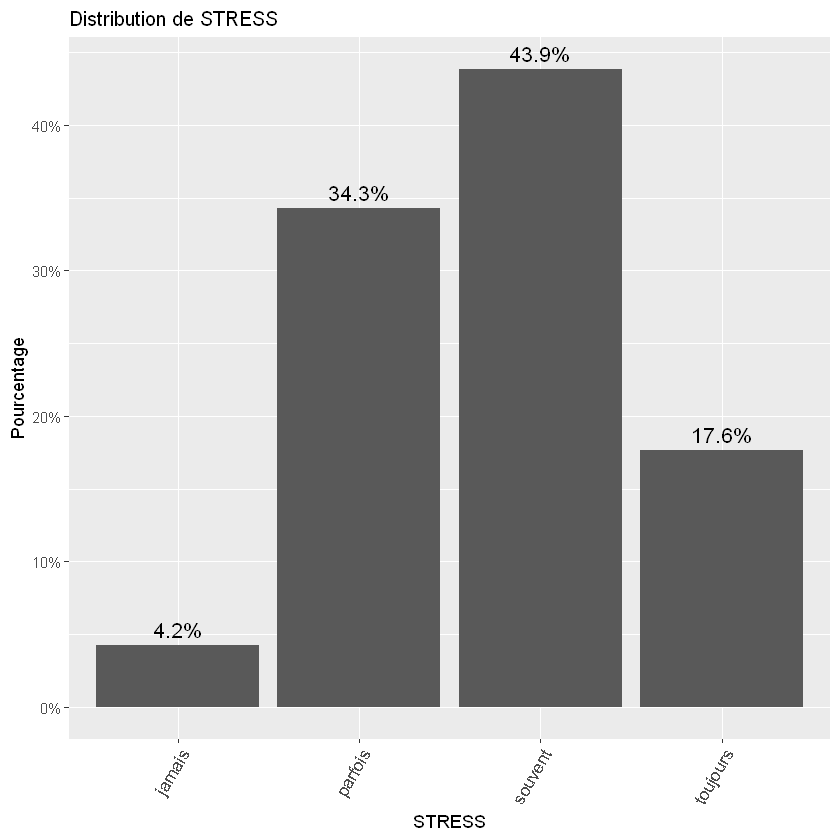

In [26]:
print(plot_distribution(insa_cleaned_1, "STRESS"))

Nous constatons que le faible pourcentage d'étudiants qui ne se sentent jamais stressés indique que la plupart des étudiants doivent faire face à un certain niveau de stress pendant leurs études. De plus, le taux élevé d'étudiants souvent ou toujours stressés (environ 60 %) est également préoccupant, car un stress fréquent peut avoir des effets négatifs sur la santé des étudiants.

### Variable COMMENTAIRE et COMCONSTRUCTIFS

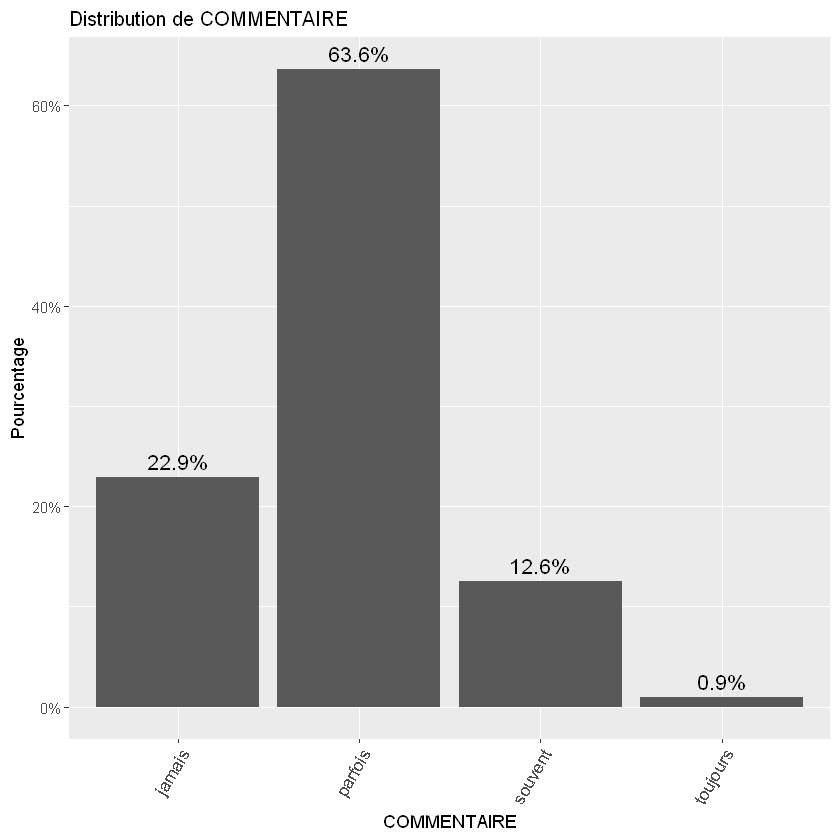

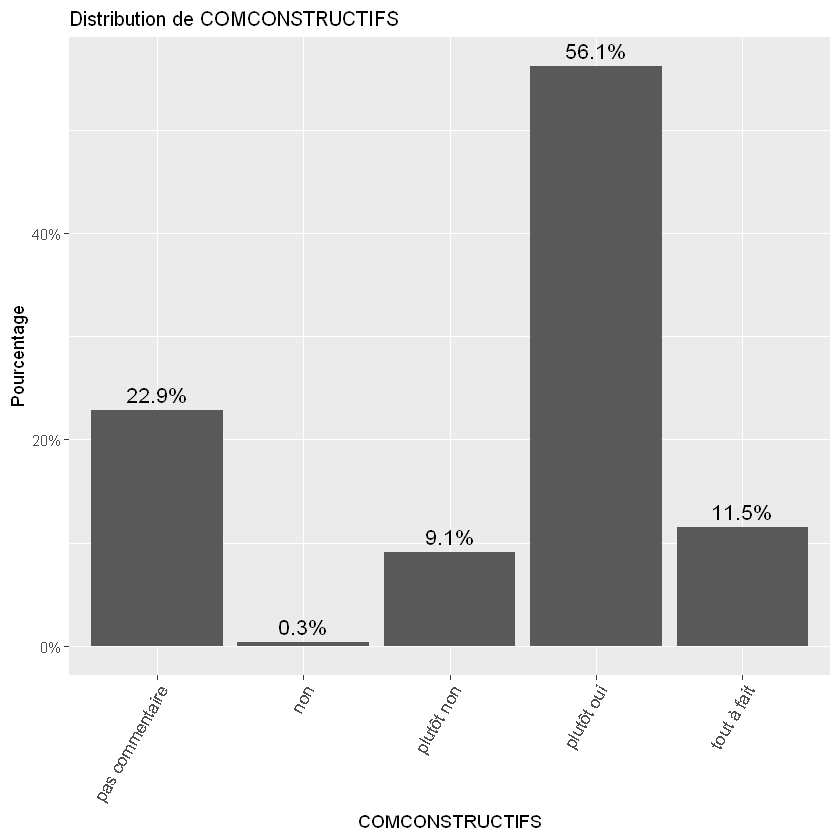

In [27]:
print(plot_distribution(insa_cleaned_1, "COMMENTAIRE"))
print(plot_distribution(insa_cleaned_1, "COMCONSTRUCTIFS"))


Nous constatons qu'il y a une redondance d'information entre ces deux variables. De plus, la majorité des commentaires sont constructifs, soit près de 87,7 % (67,6/77,1). Par conséquent, nous avons décidé de supprimer la variable COMCONSTRUCTIFS.

In [28]:
insa_cleaned_1 <- insa_cleaned_1 %>% 
    select (-COMCONSTRUCTIFS) 

str(insa_cleaned_1)

tibble [1,163 × 56] (S3: tbl_df/tbl/data.frame)
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 5 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ ETUDE_SEM         : Factor w/ 5 levels "0h","0-1h","1-2h",..: 2 5 3 3 2 2 2 4 3 3 ...
 $ ETUDEWE           : Factor w/ 7 levels "0h","0-1h","1-2h",..: 4 4 5 6 5 3 3 7 5 5 ...
 $ ETUDEGROUPE       : Factor w/ 4 levels "jamais","parfois",..: 1 1 2 2 2 1 1 2 2 3 ...
 $ ETUDEDEHORS       : Factor w/ 4 levels "jamais","parfois",..: 3 2 2 2 3 3 2

### Variable ETUDE_SEM, ETUDEWE

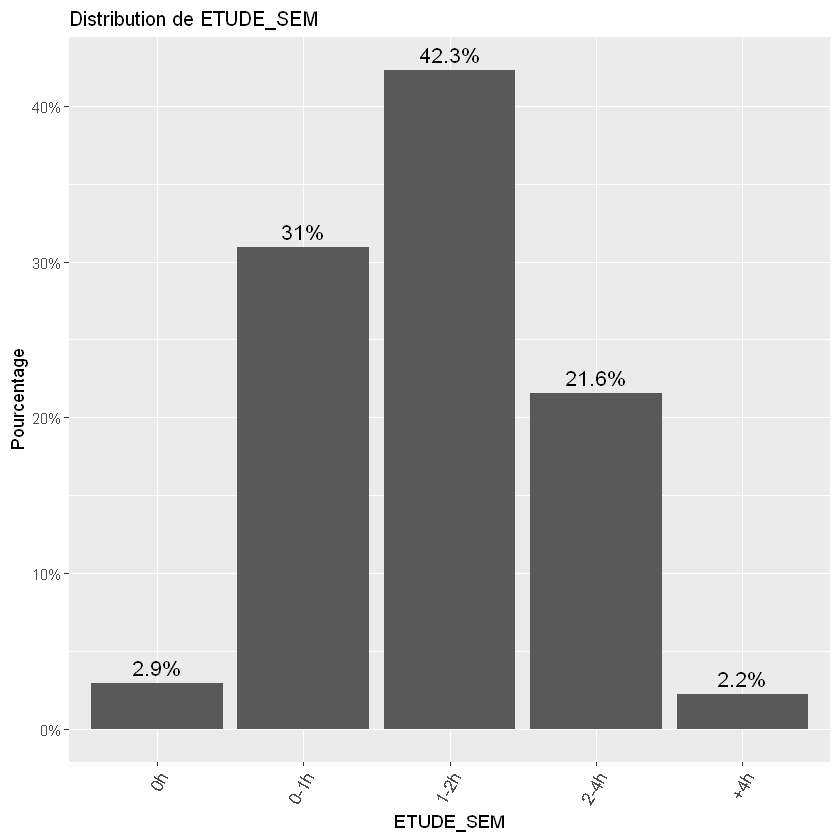

In [29]:
print(plot_distribution(insa_cleaned_1, "ETUDE_SEM"))

Nous constatons que la majorité des étudiants étudient moins de 4 heures par jour en semaine en dehors des cours à l'école (environ 95 %), avec une proportion maximale étudiant entre 1 et 2 heures (42,3 %). Cela est compréhensible, car les étudiants passent généralement toute la journée à l'école, n'ayant donc que le soir ou tôt le matin pour étudier. Ainsi, étudier plus de 4 heures par jour en dehors des cours est très rare (2,2 %).

En outre, un nombre significatif d'étudiants étudient moins d'une heure par jour (environ un tiers). Cela peut indiquer que certains étudiants n'ont pas besoin de beaucoup de temps de révision en dehors des cours ou qu'ils ne gèrent pas bien leur temps d'étude. Cependant, le fait qu'une proportion assez importante d'étudiants consacre peu de temps à l'étude peut être préoccupant et potentiellement problématique.

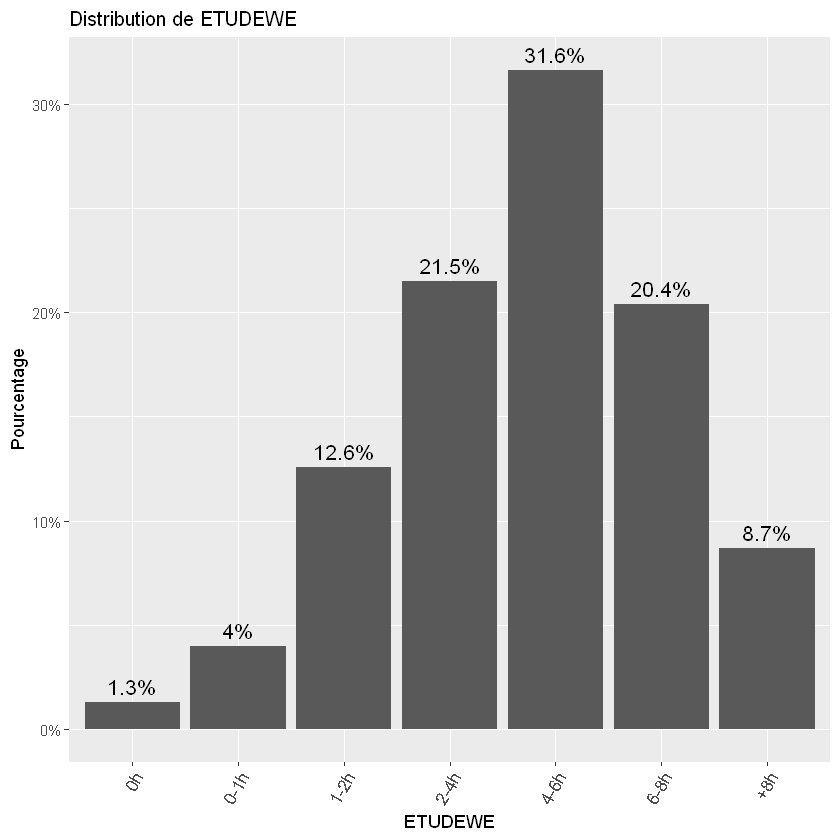

In [30]:
print(plot_distribution(insa_cleaned_1, "ETUDEWE"))

Nous constatons que plus de 80 % des étudiants consacrent plus de 2 heures à l'étude pendant le week-end, la tranche horaire la plus fréquente étant de 4 à 6 heures (31,6 %). Cela montre que la majorité des étudiants consacrent une quantité de temps assez significative à l'étude pendant le week-end.

      
        0h 0-1h 1-2h 2-4h 4-6h 6-8h +8h
  0h     9    7    7    3    4    3   1
  0-1h   5   35   95  119   73   26   7
  1-2h   1    3   37  115  198  104  34
  2-4h   0    1    7   12   90   95  46
  +4h    0    0    0    1    3    9  13


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 611.48, df = 24, p-value < 2.2e-16

[1] "Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre ETUDE_SEM et ETUDEWE."


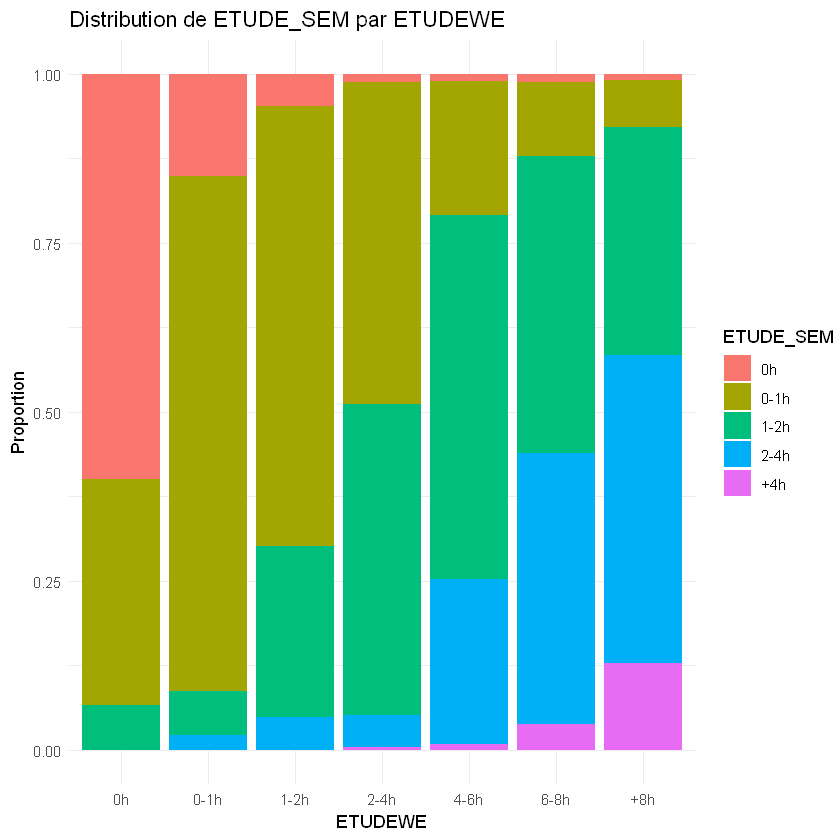

In [31]:
# Créer une table de contingence pour ETUDE_SEM et ETUDEWE
contingency_table <- table(insa_cleaned_1$ETUDE_SEM, insa_cleaned_1$ETUDEWE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

# Interprétation du résultat
if (chi_square_test$p.value < 0.05) {
  print("Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre ETUDE_SEM et ETUDEWE.")
} else {
  print("Nous ne rejetons pas l'hypothèse nulle (H0). Il n'y a pas de relation significative entre ETUDE_SEM et ETUDEWE.")
}

# Visualiser la distribution de ETUDE_SEM par ETUDEWE
ggplot(insa_cleaned_1, aes(x = ETUDEWE, fill = ETUDE_SEM)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de ETUDE_SEM par ETUDEWE',
       x = 'ETUDEWE',
       y = 'Proportion') +
  theme_minimal()

Il y a une relation significative entre ETUDE_SEM et ETUDEWE. Nous constatons que le temps d'étude en semaine et le temps d'étude pendant le week-end sont généralement proportionnels. Ceux qui étudient davantage en semaine ont également tendance à étudier davantage pendant le week-end.

Ainsi, nous pouvons considérer que ces deux variables décrivent une même notion : le temps que les étudiants consacrent à leurs études en dehors des heures de cours. Je vais donc choisir de conserver la variable ETUDEWE pour représenter cette notion, car elle présente un plus grand nombre de modalités et une meilleure répartition entre celles-ci.

In [32]:
insa_cleaned_1 <- insa_cleaned_1 %>% 
    select (-ETUDE_SEM) 

### Variable ETUDEGROUPE

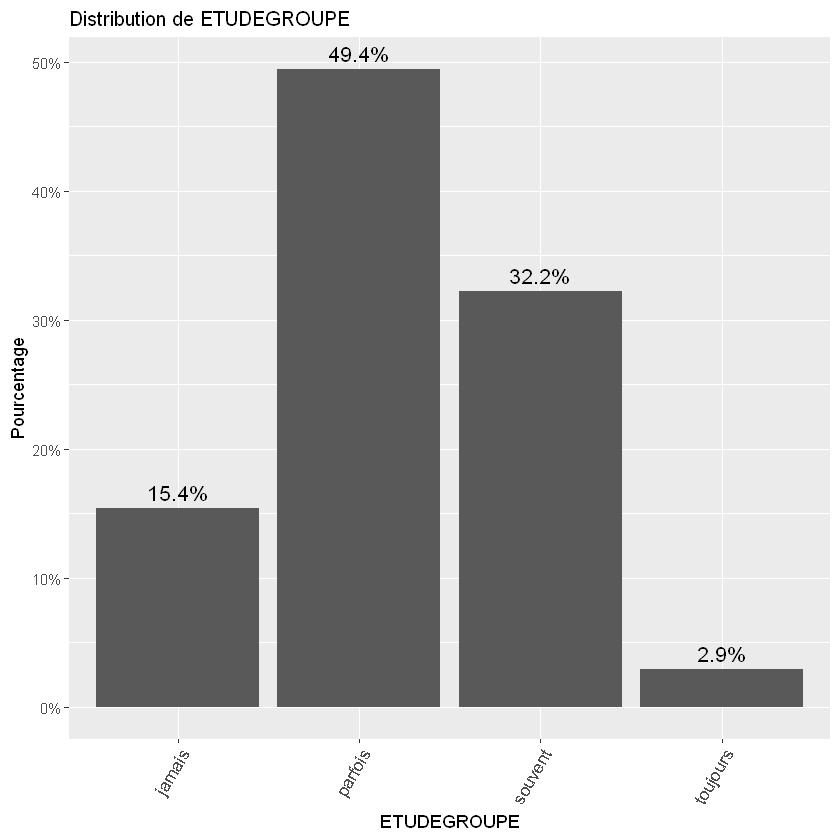

In [33]:
print(plot_distribution(insa_cleaned_1, "ETUDEGROUPE"))

La majorité des étudiants ont tendance à étudier en groupe (~80 %) au moins occasionnellement, ce qui peut indiquer que l'apprentissage en groupe est considéré comme une méthode efficace et populaire parmi les étudiants. Cependant, il y a aussi une minorité d'étudiants qui ne travaillent jamais ou toujours en groupe, ce qui peut être dû à des préférences personnelles ou à des exigences d'apprentissage spécifiques.

### Variable ETUDEDEHORS et ETUDEDOM

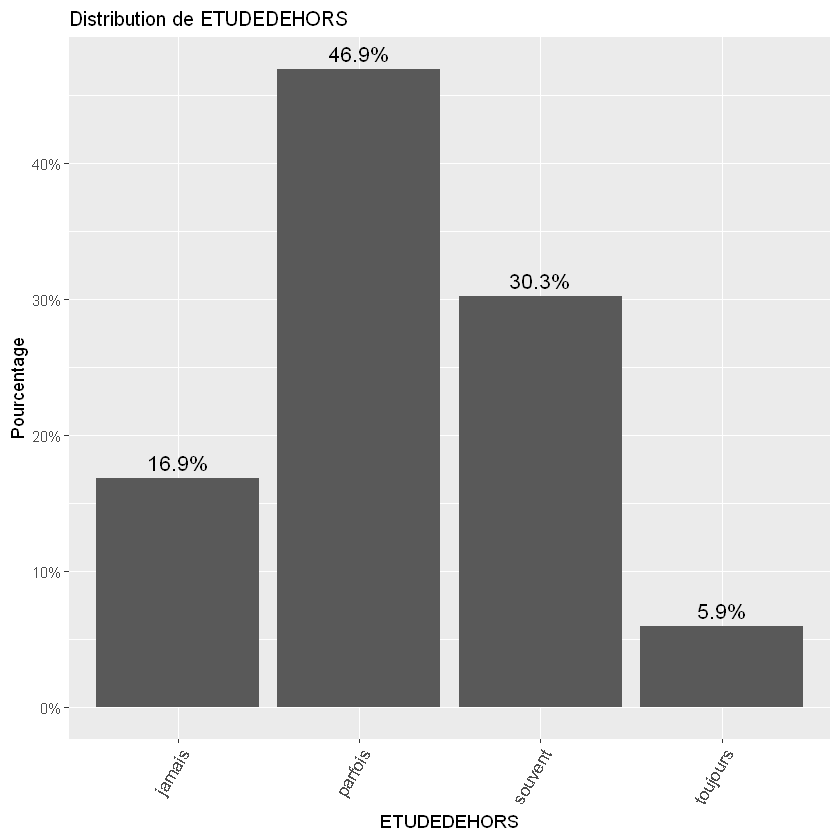

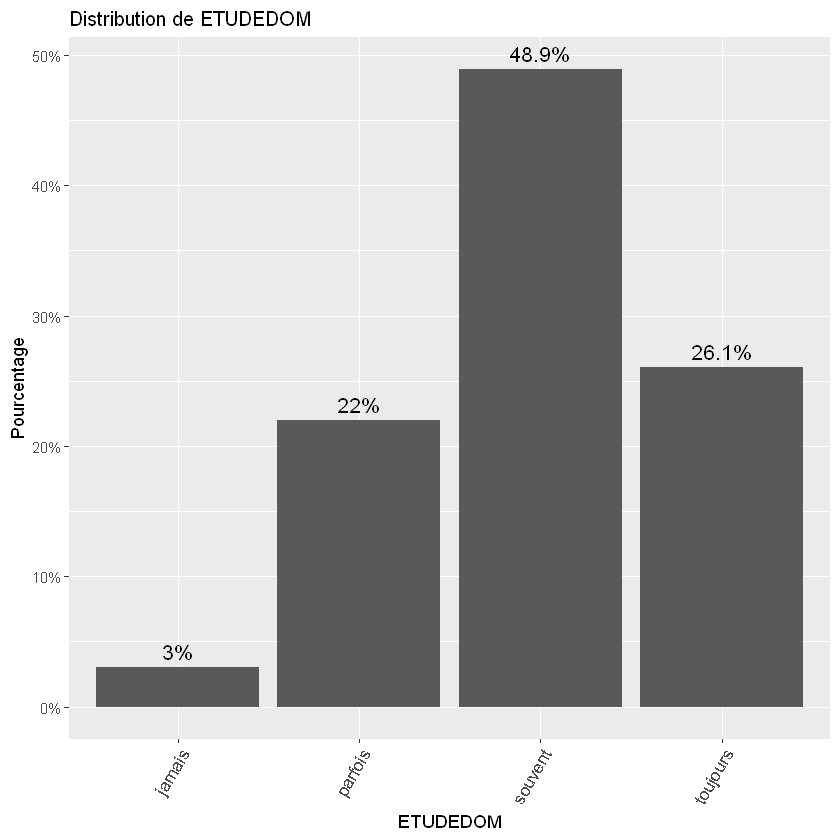

In [34]:
print(plot_distribution(insa_cleaned_1, "ETUDEDEHORS"))
print(plot_distribution(insa_cleaned_1, "ETUDEDOM"))

          
           jamais parfois souvent toujours
  jamais        5       9      12      170
  parfois       2      48     385      111
  souvent       6     161     169       16
  toujours     22      38       3        6


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 908.47, df = 9, p-value < 2.2e-16



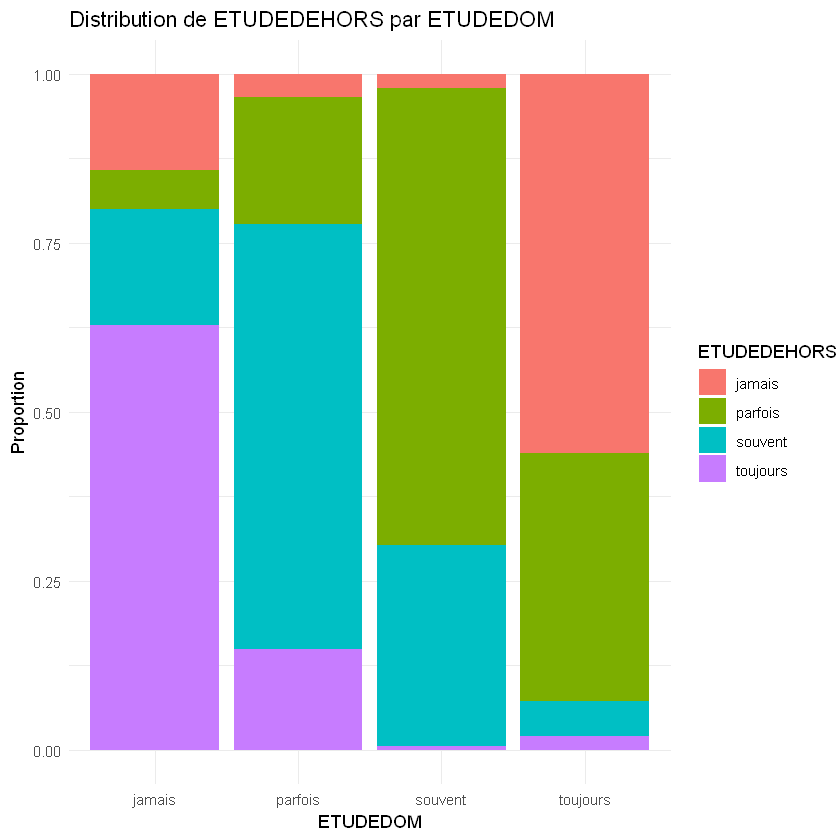

In [35]:
# Créer une table de contingence pour ETUDEDEHORS et ETUDEDOM
contingency_table <- table(insa_cleaned_1$ETUDEDEHORS, insa_cleaned_1$ETUDEDOM)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

library(ggplot2)

# Visualiser la distribution de ETUDEDEHORS par ETUDEDOM
ggplot(insa_cleaned_1, aes(x = ETUDEDOM, fill = ETUDEDEHORS)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de ETUDEDEHORS par ETUDEDOM',
       x = 'ETUDEDOM',
       y = 'Proportion') +
  theme_minimal()


Nous constatons une opposition entre les variables ETUDEDEHORS et ETUDEDOM, ce qui est compréhensible car ceux qui étudient fréquemment à la maison le font rarement à l'extérieur, et inversement. De plus, le pourcentage élevé d'étudiants qui étudient souvent ou toujours à la maison (75 %) indique que les étudiants préfèrent généralement étudier chez eux plutôt qu'à l'extérieur.

Étant donné que ces deux variables décrivent le même phénomène, par exemple, les étudiants qui étudient fréquemment à l’extérieur passent moins de temps à étudier chez eux, et inversement, on peut considérer que ces deux variables se déduisent l’une de l’autre ou partagent un sens similaire. Par conséquent, nous avons choisi de supprimer l’une des deux variables. J’ai décidé de supprimer la variable ETUDEDOM, car elle est fortement biaisée vers les choix "souvent" et "toujours", tandis que la modalité "jamais" ne représente que 3 %, ce qui pourrait rendre le modèle instable.

In [36]:
insa_cleaned_1 <- insa_cleaned_1 %>% 
    select (-ETUDEDOM) 

### Variable PRESENCE_CM, PRESENCE_TD et PRESENCE_TP

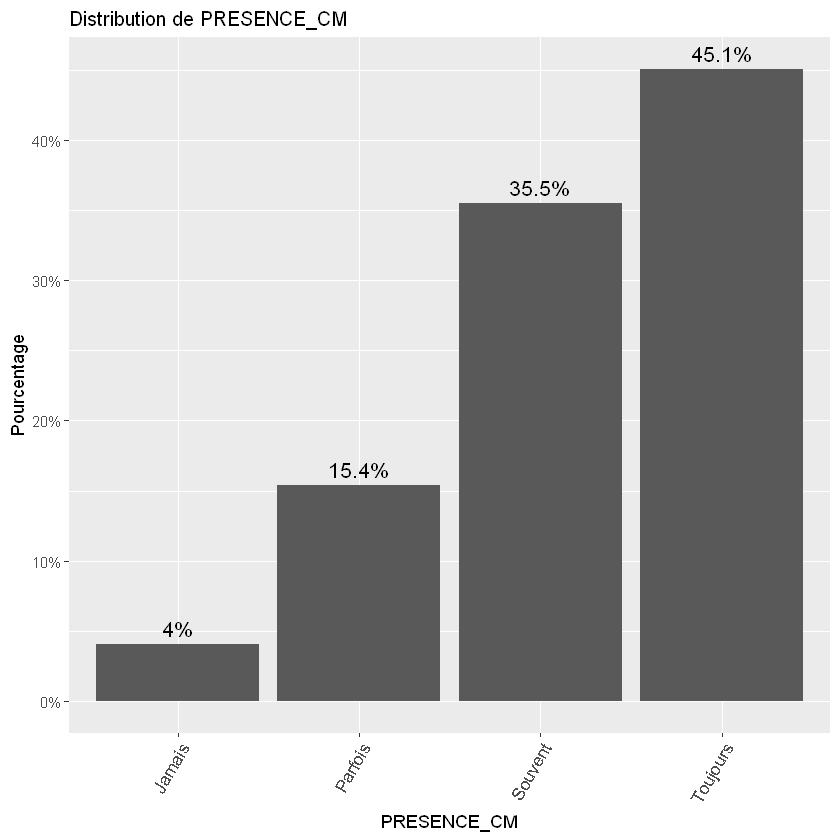

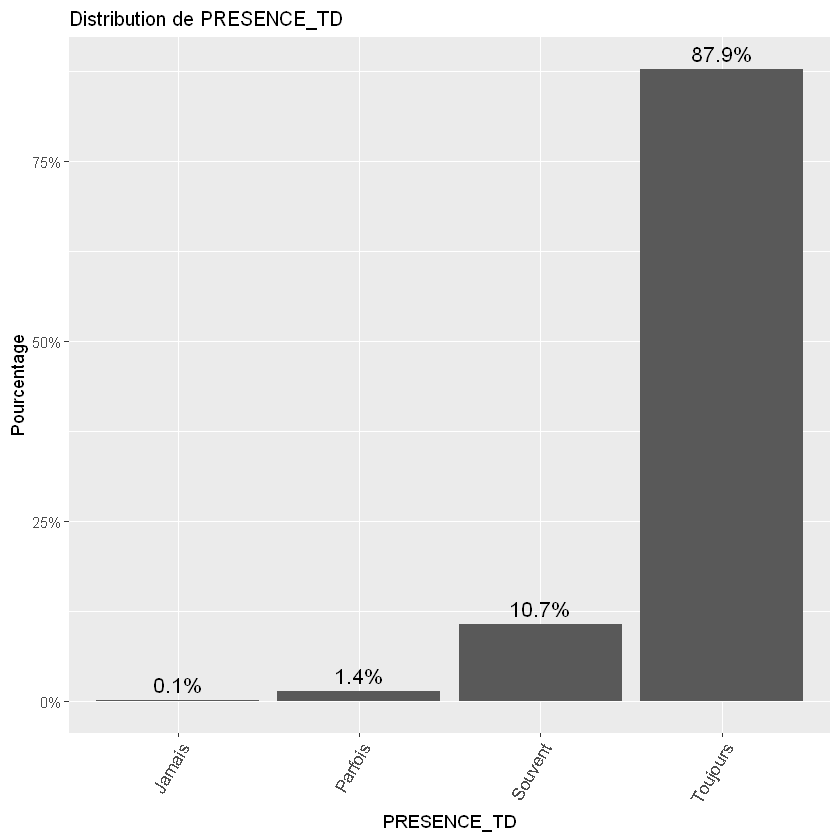

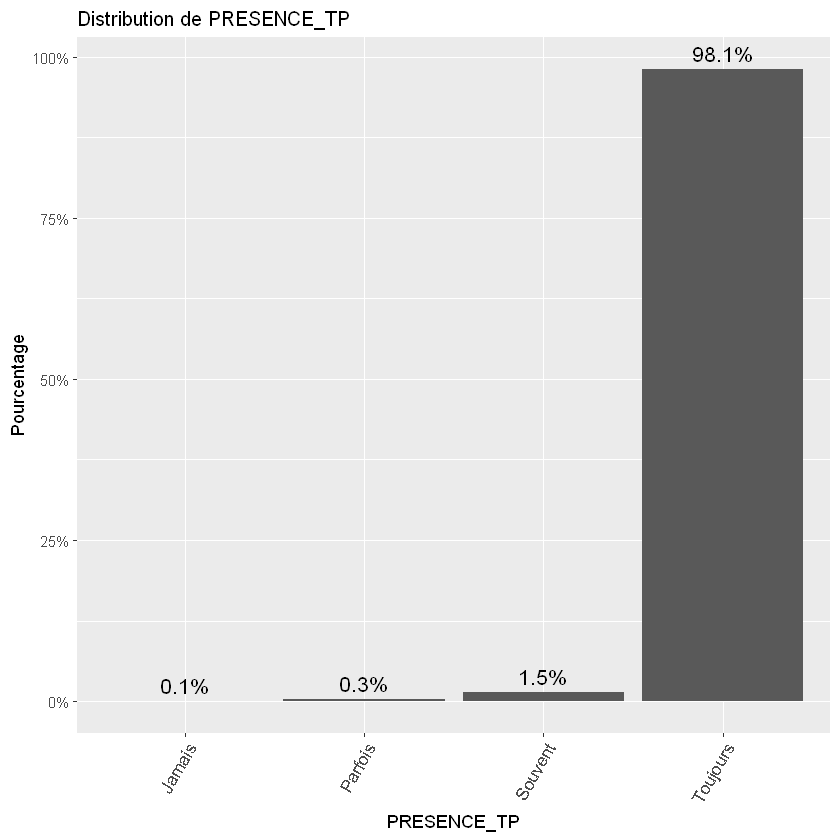

In [37]:
print(plot_distribution(insa_cleaned_1, "PRESENCE_CM"))
print(plot_distribution(insa_cleaned_1, "PRESENCE_TD"))
print(plot_distribution(insa_cleaned_1, "PRESENCE_TP"))

Nous constatons que la majorité des étudiants (environ 80 %) sont fréquemment ou toujours présents aux cours magistraux (CM). Cependant, il est important de noter qu'une proportion non négligeable, près de 20 %, des étudiants n'assistent qu'occasionnellement ou jamais à ces cours, ce qui mérite notre attention. Cependant, pour les cours de travaux dirigés (TD) et de travaux pratiques (TP), le taux de participation augmente de manière significative : 98,5 % des étudiants assistent fréquemment ou toujours aux TD. Pour les TP, 98,1 % des étudiants y assistent toujours et une participation quasi totale (99,6 %) pour ceux qui assistent fréquemment ou toujours aux TP. Cela peut s'expliquer par le fait que certains étudiants préfèrent apprendre les concepts théoriques des cours magistraux (CM) de manière autonome à la maison et participent davantage aux sessions axées sur les exercices pratiques et les applications concrètes. Cette tendance est compréhensible étant donné que notre école est une école d'ingénieurs, où les étudiants accordent une grande importance à l'apprentissage pratique.

### Variable CONCENTRATION_CM, CONCENTRATION_TD et CONCENTRATION_TP

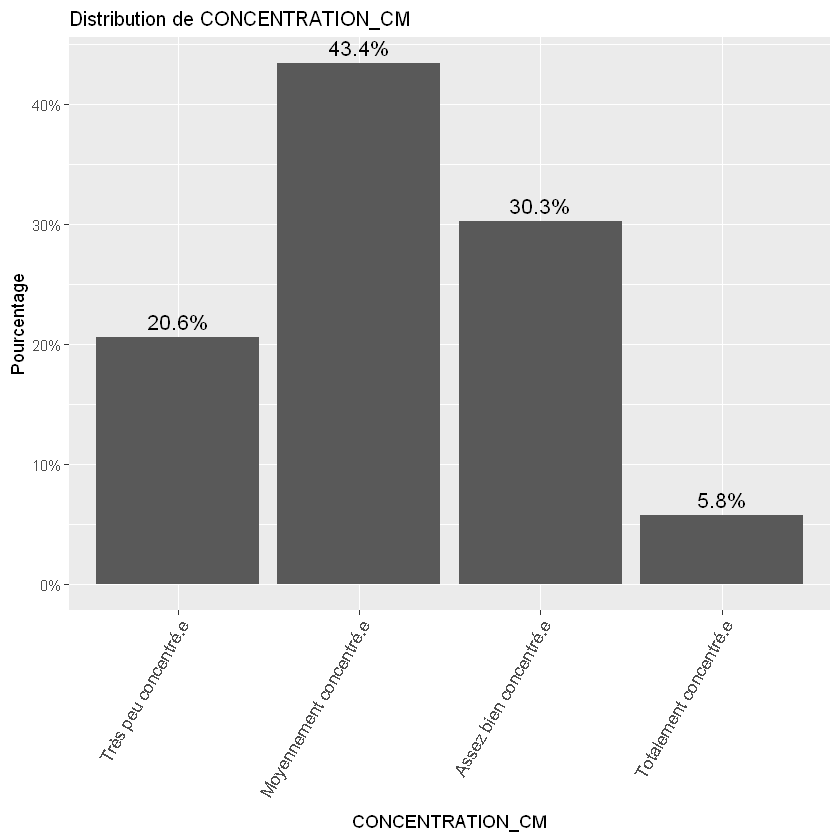

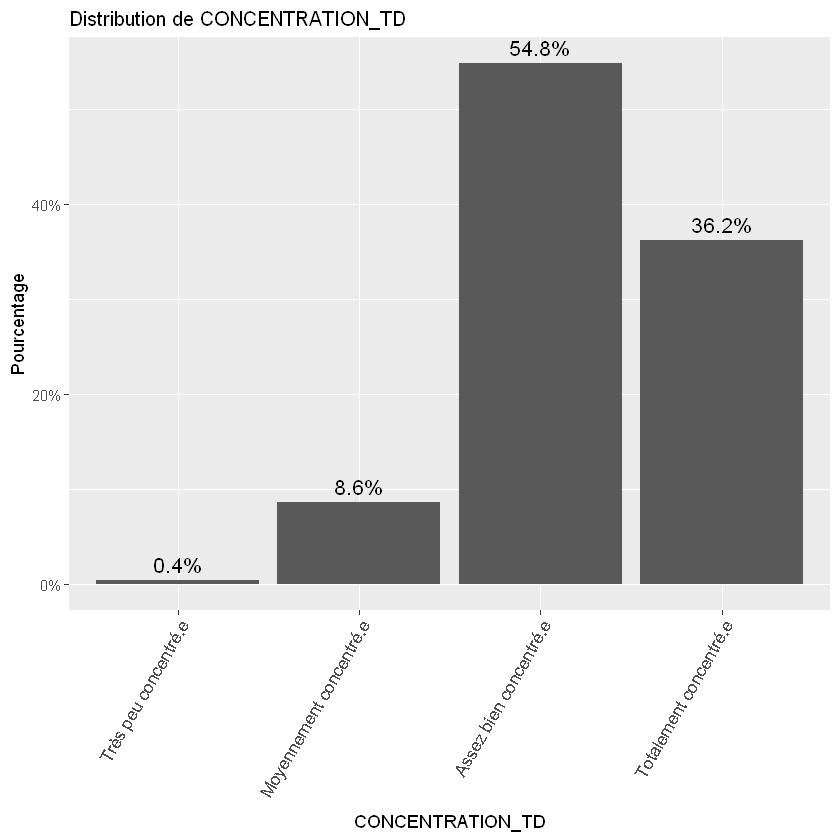

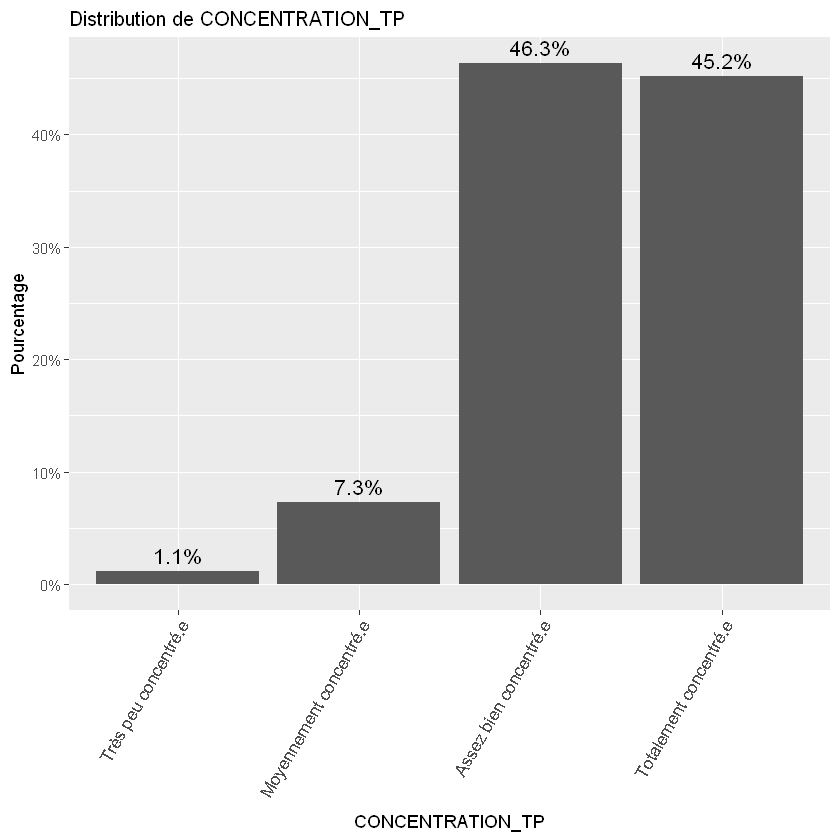

In [38]:
print(plot_distribution(insa_cleaned_1, "CONCENTRATION_CM"))
print(plot_distribution(insa_cleaned_1, "CONCENTRATION_TD"))
print(plot_distribution(insa_cleaned_1, "CONCENTRATION_TP"))

Nous pouvons établir un argument similaire avec les variables de présence, en notant que les étudiants ont tendance à se concentrer davantage lors des séances de TD et particulièrement lors des TP. Cependant, une situation préoccupante se dessine : une grande partie des étudiants (64 % - près des deux tiers) sont peu ou moyennement concentrés. La situation s'améliore considérablement pour les TD et les TP, où plus de 90 % des étudiants sont assez bien ou totalement concentrés.

### Variable PREPCOURS_CM, PREPCOURS_TD et PREPCOURS_TP

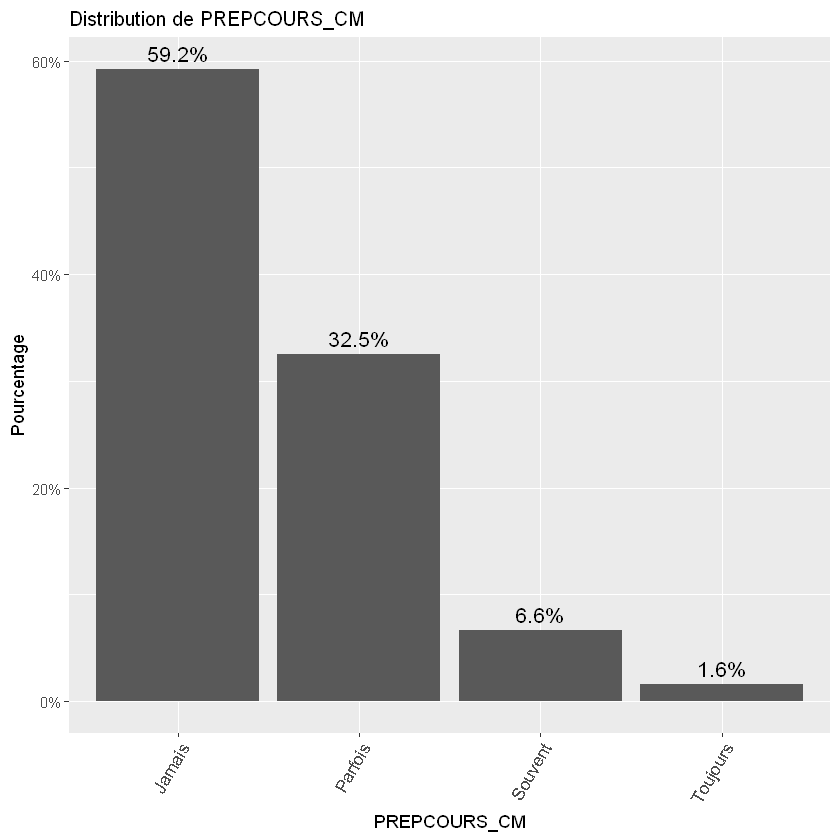

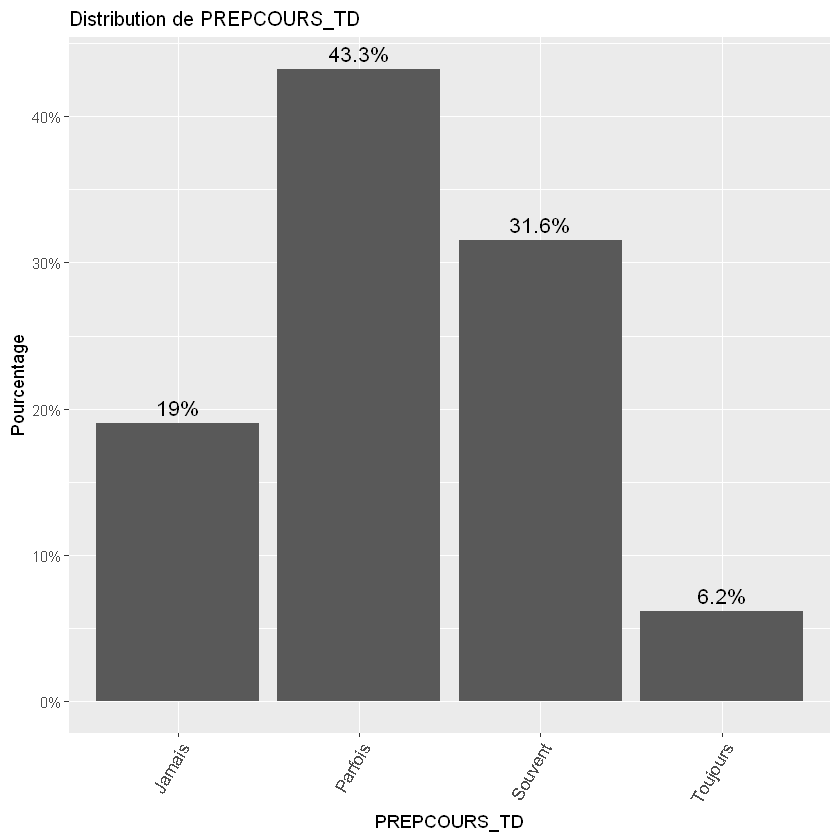

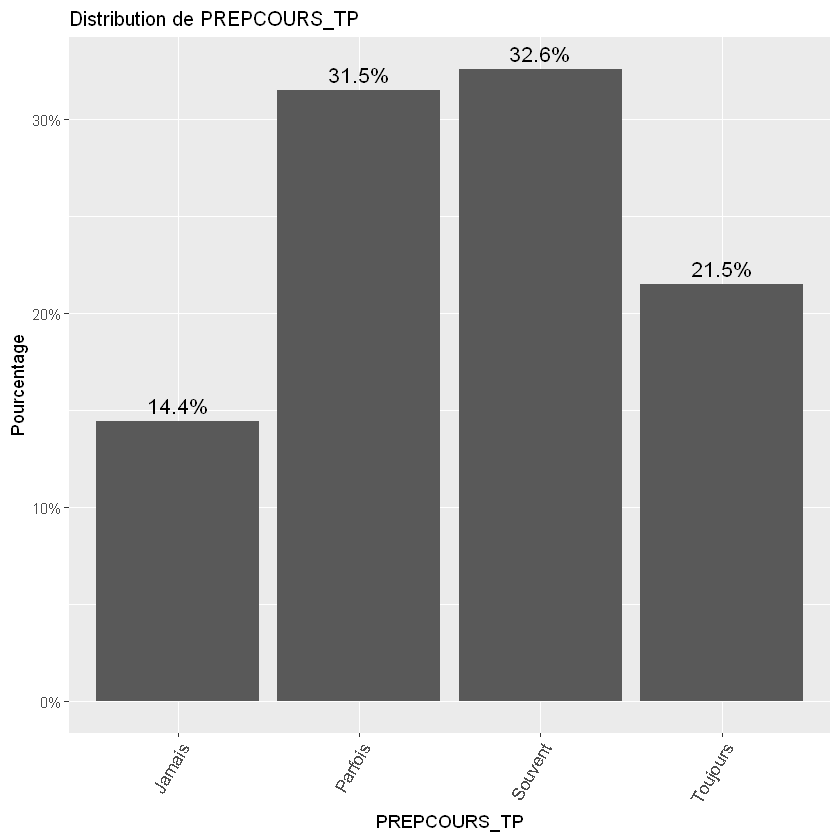

In [39]:
print(plot_distribution(insa_cleaned_1, "PREPCOURS_CM"))
print(plot_distribution(insa_cleaned_1, "PREPCOURS_TD"))
print(plot_distribution(insa_cleaned_1, "PREPCOURS_TP"))

De manière similaire aux variables PRESENCE et CONCENTRATION, la variable PREPCOURS montre que les étudiants ont tendance à se préparer davantage pour les TD et TP. Un chiffre assez préoccupant est que 59,2 % des étudiants, soit plus de la moitié, ne préparent jamais leurs cours pour les CM, et plus de 90 % des étudiants ne préparent pas régulièrement ces cours. Cela est inquiétant, car les CM sont des séances théoriques où les étudiants découvrent souvent de nouveaux concepts. Ne pas se préparer en amont rend l'apprentissage de ces notions plus difficile et peut également entraîner un manque de concentration pendant les CM.

### Variable COURSNOTES_CM, COURSNOTES_TD et COURSNOTES_TP

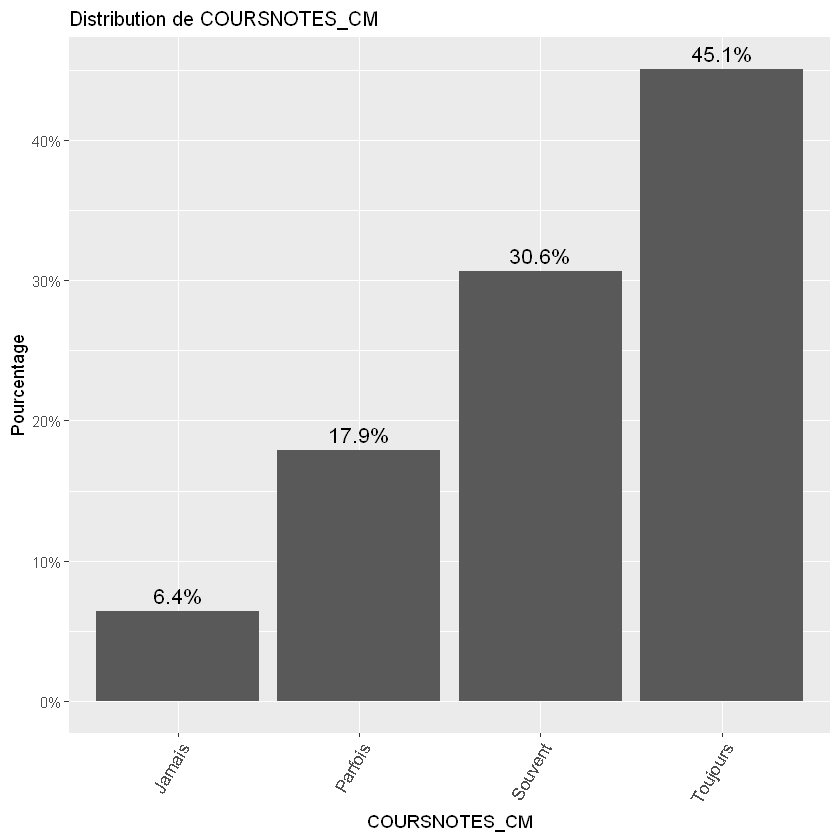

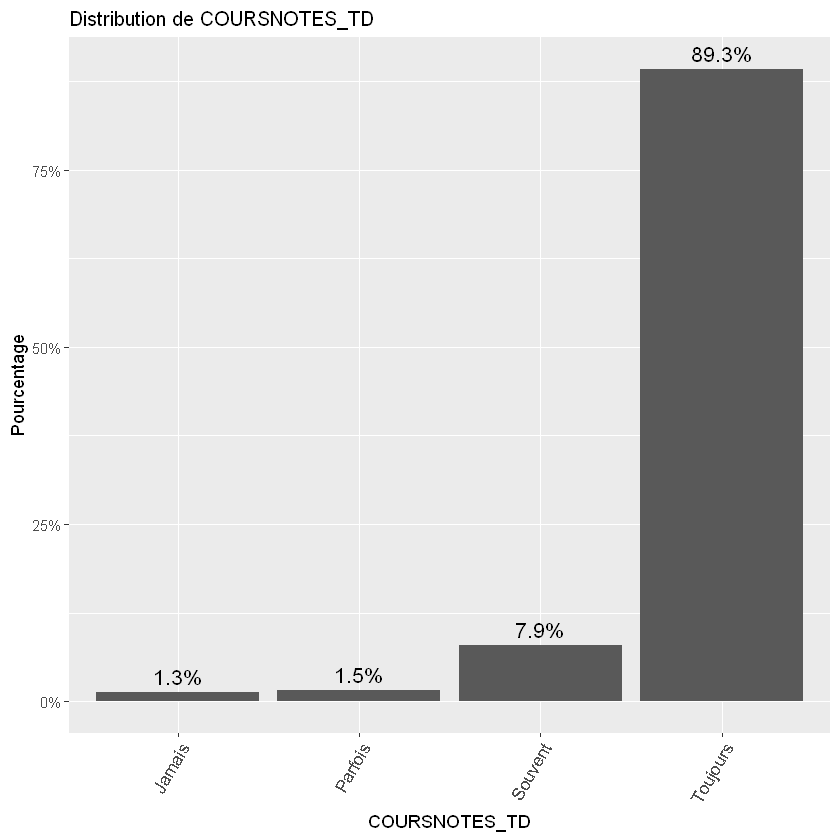

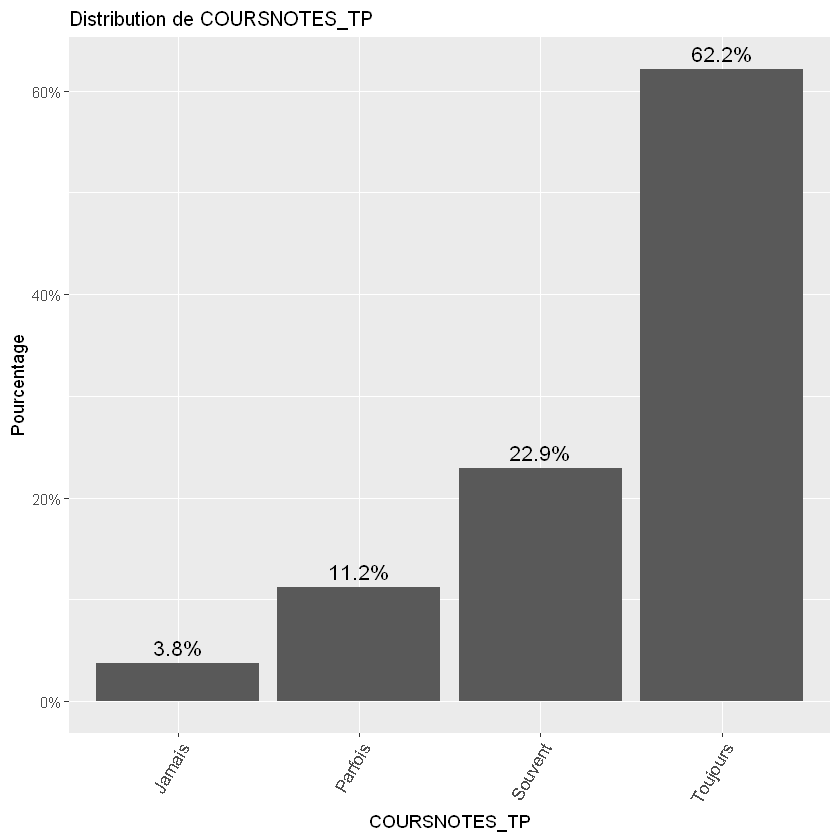

In [40]:
print(plot_distribution(insa_cleaned_1, "COURSNOTES_CM"))
print(plot_distribution(insa_cleaned_1, "COURSNOTES_TD"))
print(plot_distribution(insa_cleaned_1, "COURSNOTES_TP"))

Nous pouvons également observer une tendance similaire par rapport aux variables précédentes concernant les CM, TD et TP. Nos étudiants semblent accorder davantage de priorité aux TD et TP. Cependant, en ce qui concerne la prise de notes, il y a un changement notable : le taux de prise de notes est plus élevé pendant les TD que pendant les TP. Cela s'explique assez facilement, car les TD consistent souvent en des exercices sur papier, où les étudiants ont tendance à prendre plus de notes, contrairement aux séances pratiques (TP), où ils travaillent principalement avec des machines ou des équipements.

De plus, un aspect positif est que près de 90 % des étudiants prennent toujours des notes lors des TD, et plus de 97 % le font au moins régulièrement. Cela montre que les étudiants accordent une grande importance aux TD, ce qui reflète l'importance perçue de ces séances dans leur apprentissage.

### Combination des variables

In [41]:
# PRESENCE_CM và CONCENTRATION_CM
contingency_table1 <- table(insa_cleaned_1$PRESENCE_CM, insa_cleaned_1$CONCENTRATION_CM)
chi_square_test1 <- chisq.test(contingency_table1)
print(chi_square_test1)

# PRESENCE_CM và PREPCOURS_CM
contingency_table2 <- table(insa_cleaned_1$PRESENCE_CM, insa_cleaned_1$PREPCOURS_CM)
chi_square_test2 <- chisq.test(contingency_table2)
print(chi_square_test2)

# PRESENCE_CM và COURSNOTES_CM
contingency_table3 <- table(insa_cleaned_1$PRESENCE_CM, insa_cleaned_1$COURSNOTES_CM)
chi_square_test3 <- chisq.test(contingency_table3)
print(chi_square_test3)

# CONCENTRATION_CM và PREPCOURS_CM
contingency_table4 <- table(insa_cleaned_1$CONCENTRATION_CM, insa_cleaned_1$PREPCOURS_CM)
chi_square_test4 <- chisq.test(contingency_table4)
print(chi_square_test4)

# CONCENTRATION_CM và COURSNOTES_CM
contingency_table5 <- table(insa_cleaned_1$CONCENTRATION_CM, insa_cleaned_1$COURSNOTES_CM)
chi_square_test5 <- chisq.test(contingency_table5)
print(chi_square_test5)

# PREPCOURS_CM và COURSNOTES_CM
contingency_table6 <- table(insa_cleaned_1$PREPCOURS_CM, insa_cleaned_1$COURSNOTES_CM)
chi_square_test6 <- chisq.test(contingency_table6)
print(chi_square_test6)

Warning message in chisq.test(contingency_table1):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table1
X-squared = 322.57, df = 9, p-value < 2.2e-16



Warning message in chisq.test(contingency_table2):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table2
X-squared = 169.48, df = 9, p-value < 2.2e-16



Warning message in chisq.test(contingency_table3):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table3
X-squared = 410.48, df = 9, p-value < 2.2e-16



Warning message in chisq.test(contingency_table4):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table4
X-squared = 219.41, df = 9, p-value < 2.2e-16



Warning message in chisq.test(contingency_table5):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table5
X-squared = 300.11, df = 9, p-value < 2.2e-16



Warning message in chisq.test(contingency_table6):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table6
X-squared = 113.54, df = 9, p-value < 2.2e-16



In [42]:
# PRESENCE_TD và CONCENTRATION_TD
contingency_table1_td <- table(insa_cleaned_1$PRESENCE_TD, insa_cleaned_1$CONCENTRATION_TD)
chi_square_test1_td <- chisq.test(contingency_table1_td)
print(chi_square_test1_td)

# PRESENCE_TD và PREPCOURS_TD
contingency_table2_td <- table(insa_cleaned_1$PRESENCE_TD, insa_cleaned_1$PREPCOURS_TD)
chi_square_test2_td <- chisq.test(contingency_table2_td)
print(chi_square_test2_td)

# PRESENCE_TD và COURSNOTES_TD
contingency_table3_td <- table(insa_cleaned_1$PRESENCE_TD, insa_cleaned_1$COURSNOTES_TD)
chi_square_test3_td <- chisq.test(contingency_table3_td)
print(chi_square_test3_td)

# CONCENTRATION_TD và PREPCOURS_TD
contingency_table4_td <- table(insa_cleaned_1$CONCENTRATION_TD, insa_cleaned_1$PREPCOURS_TD)
chi_square_test4_td <- chisq.test(contingency_table4_td)
print(chi_square_test4_td)

# CONCENTRATION_TD và COURSNOTES_TD
contingency_table5_td <- table(insa_cleaned_1$CONCENTRATION_TD, insa_cleaned_1$COURSNOTES_TD)
chi_square_test5_td <- chisq.test(contingency_table5_td)
print(chi_square_test5_td)

# PREPCOURS_TD và COURSNOTES_TD
contingency_table6_td <- table(insa_cleaned_1$PREPCOURS_TD, insa_cleaned_1$COURSNOTES_TD)
chi_square_test6_td <- chisq.test(contingency_table6_td)
print(chi_square_test6_td)


Warning message in chisq.test(contingency_table1_td):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table1_td
X-squared = 54.701, df = 9, p-value = 1.388e-08



Warning message in chisq.test(contingency_table2_td):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table2_td
X-squared = 53.294, df = 9, p-value = 2.571e-08



Warning message in chisq.test(contingency_table3_td):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table3_td
X-squared = 65.039, df = 9, p-value = 1.418e-10



Warning message in chisq.test(contingency_table4_td):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table4_td
X-squared = 156.09, df = 9, p-value < 2.2e-16



Warning message in chisq.test(contingency_table5_td):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table5_td
X-squared = 34.51, df = 9, p-value = 7.267e-05



Warning message in chisq.test(contingency_table6_td):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table6_td
X-squared = 28.876, df = 9, p-value = 0.0006799



In [43]:
# PRESENCE_TP và CONCENTRATION_TP
contingency_table1_tp <- table(insa_cleaned_1$PRESENCE_TP, insa_cleaned_1$CONCENTRATION_TP)
chi_square_test1_tp <- chisq.test(contingency_table1_tp)
print(chi_square_test1_tp)

# PRESENCE_TP và PREPCOURS_TP
contingency_table2_tp <- table(insa_cleaned_1$PRESENCE_TP, insa_cleaned_1$PREPCOURS_TP)
chi_square_test2_tp <- chisq.test(contingency_table2_tp)
print(chi_square_test2_tp)

# PRESENCE_TP và COURSNOTES_TP
contingency_table3_tp <- table(insa_cleaned_1$PRESENCE_TP, insa_cleaned_1$COURSNOTES_TP)
chi_square_test3_tp <- chisq.test(contingency_table3_tp)
print(chi_square_test3_tp)

# CONCENTRATION_TP và PREPCOURS_TP
contingency_table4_tp <- table(insa_cleaned_1$CONCENTRATION_TP, insa_cleaned_1$PREPCOURS_TP)
chi_square_test4_tp <- chisq.test(contingency_table4_tp)
print(chi_square_test4_tp)

# CONCENTRATION_TP và COURSNOTES_TP
contingency_table5_tp <- table(insa_cleaned_1$CONCENTRATION_TP, insa_cleaned_1$COURSNOTES_TP)
chi_square_test5_tp <- chisq.test(contingency_table5_tp)
print(chi_square_test5_tp)

# PREPCOURS_TP và COURSNOTES_TP
contingency_table6_tp <- table(insa_cleaned_1$PREPCOURS_TP, insa_cleaned_1$COURSNOTES_TP)
chi_square_test6_tp <- chisq.test(contingency_table6_tp)
print(chi_square_test6_tp)


Warning message in chisq.test(contingency_table1_tp):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table1_tp
X-squared = 40.36, df = 9, p-value = 6.539e-06



Warning message in chisq.test(contingency_table2_tp):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table2_tp
X-squared = 22.065, df = 9, p-value = 0.008674



Warning message in chisq.test(contingency_table3_tp):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table3_tp
X-squared = 44.869, df = 9, p-value = 9.754e-07



Warning message in chisq.test(contingency_table4_tp):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table4_tp
X-squared = 128.08, df = 9, p-value < 2.2e-16



Warning message in chisq.test(contingency_table5_tp):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table5_tp
X-squared = 110.76, df = 9, p-value < 2.2e-16


	Pearson's Chi-squared test

data:  contingency_table6_tp
X-squared = 148.71, df = 9, p-value < 2.2e-16



Après avoir analysé les variables précédentes, nous observons une tendance générale concernant l'implication des étudiants dans les CM, TD et TP. De plus, les tests montrent une dépendance entre les variables liées à ces trois types de cours. Par conséquent, je propose de créer trois nouvelles variables : IMPLICATION_CM, IMPLICATION_TD et IMPLICATION_TP, qui regrouperaient ces aspects et permettraient de mieux évaluer l'implication des étudiants dans chacun de ces formats de cours.

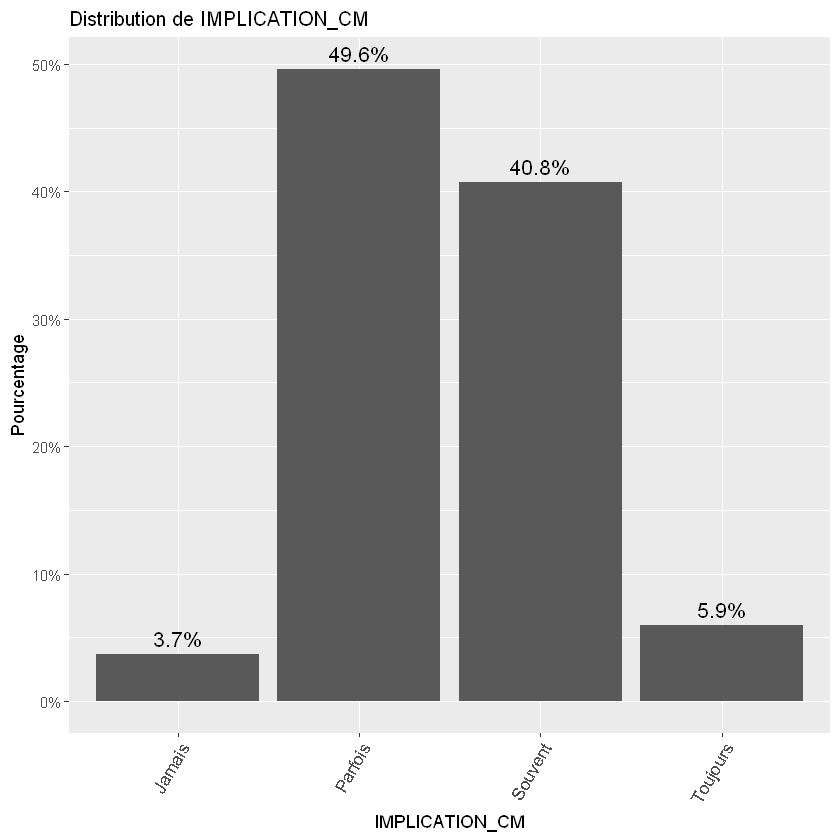

In [44]:
# Calculer la moyenne des valeurs pour CM sans stocker les variables intermédiaires
IMPLICATION_CM_NUM <- rowMeans(cbind(
  as.numeric(factor(insa_cleaned_1$PRESENCE_CM, levels = c("Jamais", "Parfois", "Souvent", "Toujours"))),
  as.numeric(factor(insa_cleaned_1$CONCENTRATION_CM, levels = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"))),
  as.numeric(factor(insa_cleaned_1$PREPCOURS_CM, levels = c("Jamais", "Parfois", "Souvent", "Toujours"))),
  as.numeric(factor(insa_cleaned_1$COURSNOTES_CM, levels = c("Jamais", "Parfois", "Souvent", "Toujours")))
), na.rm = TRUE)

# Arrondir et reconvertir en modalités qualitatives
insa_cleaned_1$IMPLICATION_CM <- factor(round(IMPLICATION_CM_NUM),
                                        levels = c(1, 2, 3, 4),
                                        labels = c("Jamais", "Parfois", "Souvent", "Toujours"))

# Vérifier la distribution de la nouvelle variable IMPLICATION_CM
print(plot_distribution(insa_cleaned_1, "IMPLICATION_CM"))


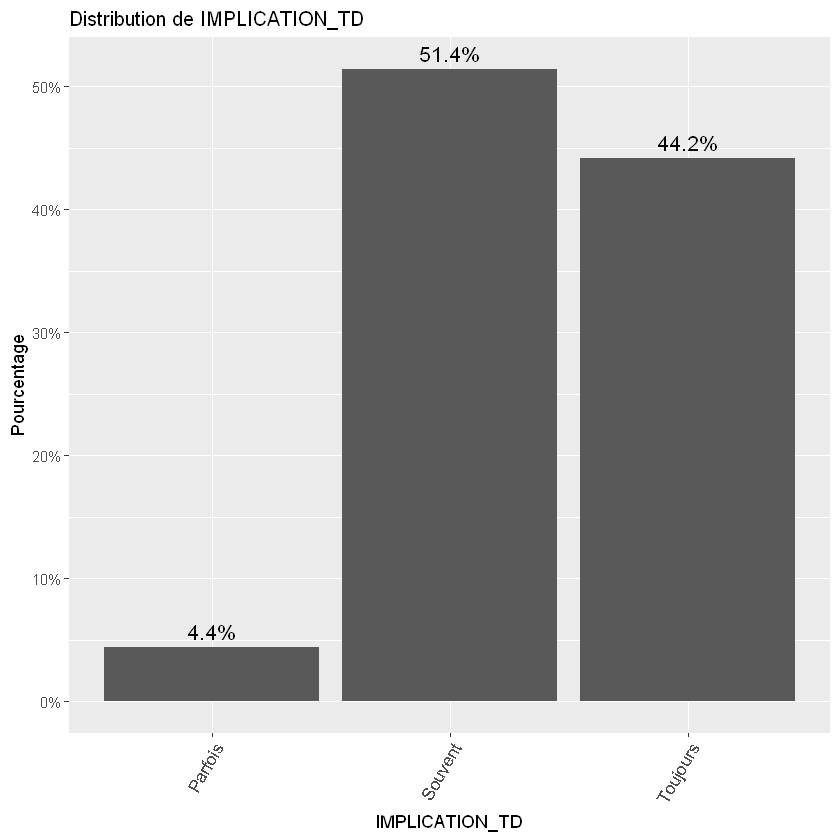

In [45]:
# Calculer la moyenne des valeurs pour TD sans stocker les variables intermédiaires
IMPLICATION_TD_NUM <- rowMeans(cbind(
  as.numeric(factor(insa_cleaned_1$PRESENCE_TD, levels = c("Jamais", "Parfois", "Souvent", "Toujours"))),
  as.numeric(factor(insa_cleaned_1$CONCENTRATION_TD, levels = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"))),
  as.numeric(factor(insa_cleaned_1$PREPCOURS_TD, levels = c("Jamais", "Parfois", "Souvent", "Toujours"))),
  as.numeric(factor(insa_cleaned_1$COURSNOTES_TD, levels = c("Jamais", "Parfois", "Souvent", "Toujours")))
), na.rm = TRUE)

# Arrondir et reconvertir en modalités qualitatives
insa_cleaned_1$IMPLICATION_TD <- factor(round(IMPLICATION_TD_NUM),
                                        levels = c(1, 2, 3, 4),
                                        labels = c("Jamais", "Parfois", "Souvent", "Toujours"))

# Vérifier la distribution de la nouvelle variable IMPLICATION_TD
print(plot_distribution(insa_cleaned_1, "IMPLICATION_TD"))


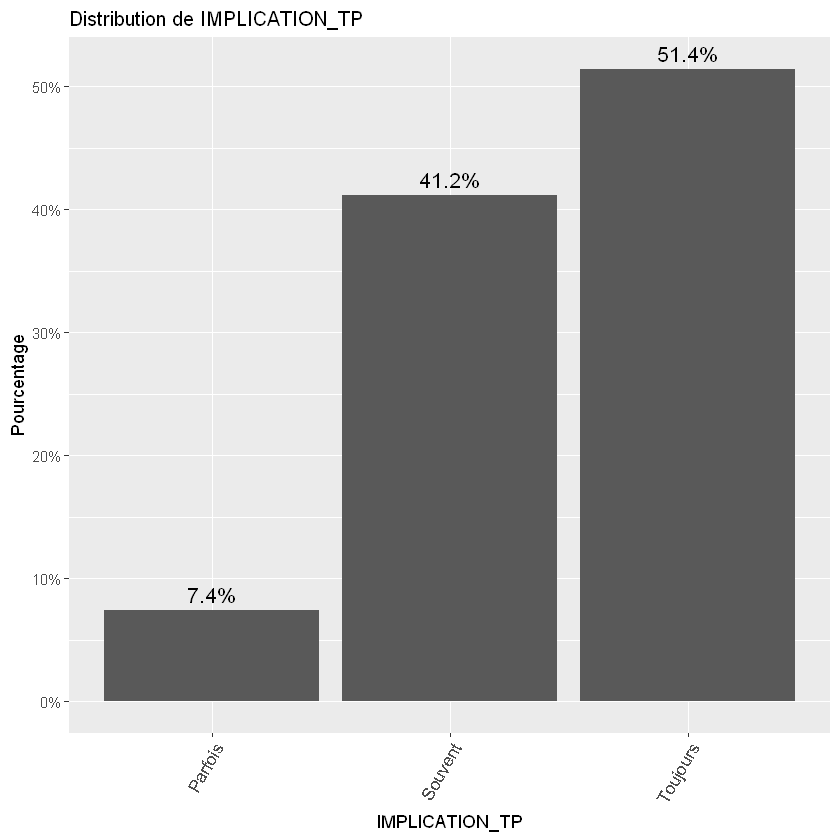

In [46]:
# Calculer la moyenne des valeurs pour TP sans stocker les variables intermédiaires
IMPLICATION_TP_NUM <- rowMeans(cbind(
  as.numeric(factor(insa_cleaned_1$PRESENCE_TP, levels = c("Jamais", "Parfois", "Souvent", "Toujours"))),
  as.numeric(factor(insa_cleaned_1$CONCENTRATION_TP, levels = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"))),
  as.numeric(factor(insa_cleaned_1$PREPCOURS_TP, levels = c("Jamais", "Parfois", "Souvent", "Toujours"))),
  as.numeric(factor(insa_cleaned_1$COURSNOTES_TP, levels = c("Jamais", "Parfois", "Souvent", "Toujours")))
), na.rm = TRUE)

# Arrondir et reconvertir en modalités qualitatives
insa_cleaned_1$IMPLICATION_TP <- factor(round(IMPLICATION_TP_NUM),
                                        levels = c(1, 2, 3, 4),
                                        labels = c("Jamais", "Parfois", "Souvent", "Toujours"))

# Vérifier la distribution de la nouvelle variable IMPLICATION_TP
print(plot_distribution(insa_cleaned_1, "IMPLICATION_TP"))

In [47]:
# Supprimer les colonnes liées à CM, TD et TP qui ont été utilisées pour calculer les variables d'implication
insa_cleaned_1 <- insa_cleaned_1 %>%
    select(-PRESENCE_CM, -CONCENTRATION_CM, -PREPCOURS_CM, -COURSNOTES_CM,   # Colonnes CM
           -PRESENCE_TD, -CONCENTRATION_TD, -PREPCOURS_TD, -COURSNOTES_TD,   # Colonnes TD
           -PRESENCE_TP, -CONCENTRATION_TP, -PREPCOURS_TP, -COURSNOTES_TP)   # Colonnes TP


### Variable REVISIONSDEB

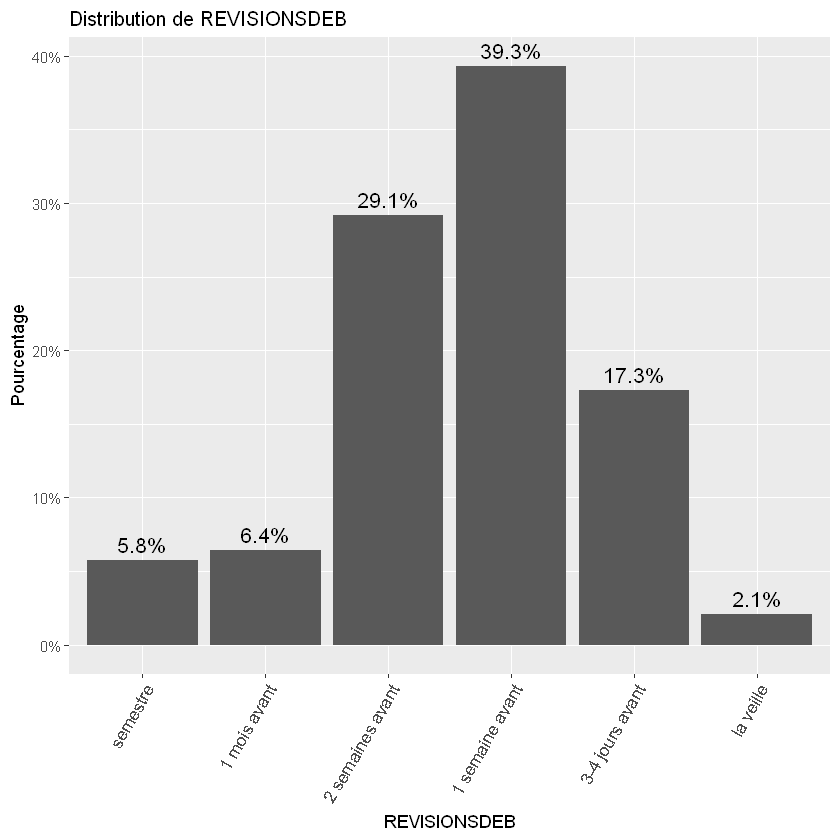

In [48]:
print(plot_distribution(insa_cleaned_1, "REVISIONSDEB"))

Nous constatons que les étudiants commencent généralement à réviser leurs cours environ 1 à 2 semaines avant l'examen (près de 70 %). Cependant, une proportion non négligeable d'entre eux ne commence à réviser que 3 à 4 jours avant l'examen (17,3 %). De plus, plus d'un dixième (12,2 %) des étudiants commencent à réviser assez tôt, c'est-à-dire plus d'un mois avant l'examen, tandis qu'une petite minorité (2,1 %) ne commence qu'à la veille de l'examen. Le fait que la révision débute principalement 1 à 2 semaines avant l'examen pourrait s'expliquer en partie par le fait qu'à l'INSA, il y a de nombreux examens tout au long du semestre. Les étudiants ont donc tendance à se concentrer sur une matière avant de passer l'examen, puis à se préparer pour la matière suivante

### Variable CONCENTRATIONPERSO

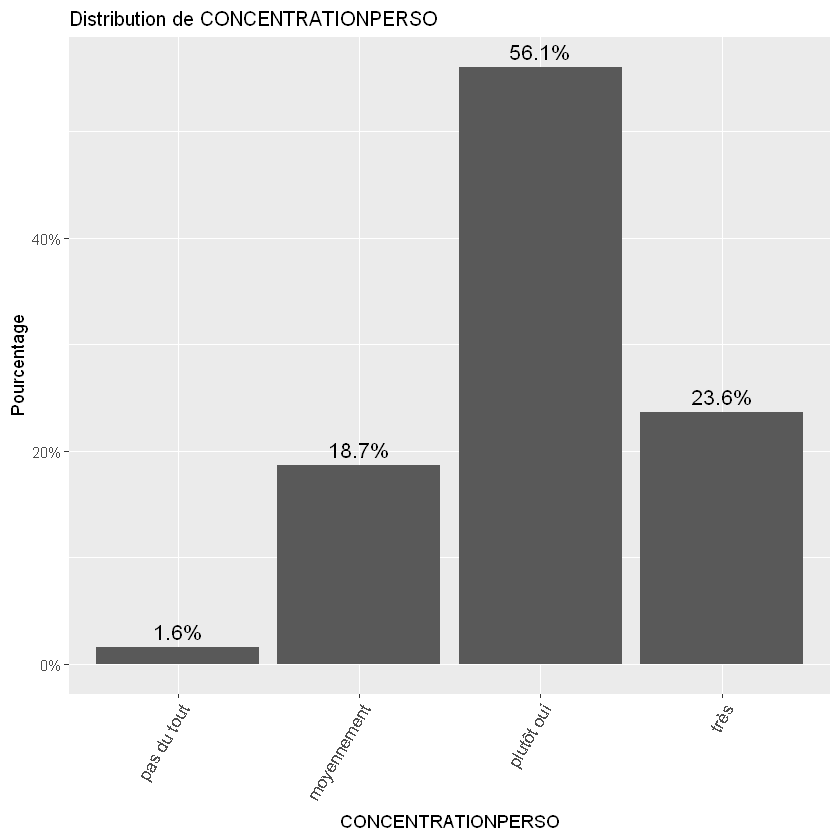

In [49]:
print(plot_distribution(insa_cleaned_1, "CONCENTRATIONPERSO"))

Nous constatons que la concentration des étudiants est dans l'ensemble assez bonne : près de 80 % des étudiants ont répondu qu'ils étaient "plutôt concentrés" ou "très concentrés" pendant leurs périodes de travail personnel. À l'inverse, un très faible pourcentage (1,6 %) a indiqué qu'ils n'étaient pas du tout concentrés. Le reste des étudiants se dit "modérément concentré".

### Variable CONDITIONSTRAVAIL

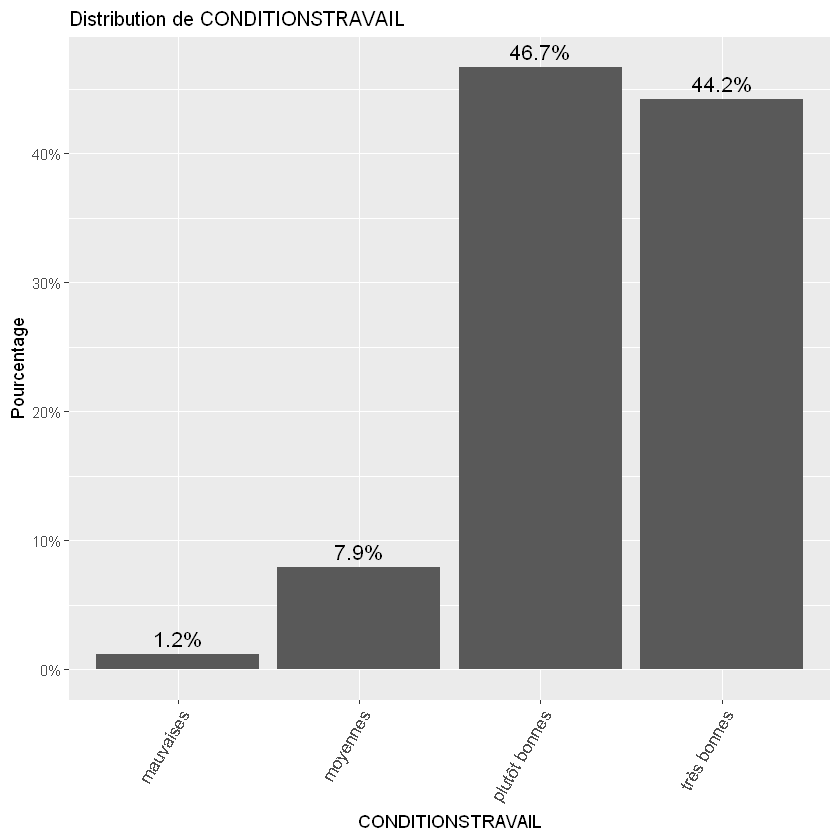

In [50]:
print(plot_distribution(insa_cleaned_1, "CONDITIONSTRAVAIL"))

Nous constatons que la majorité des étudiants (plus de 90 %) estiment avoir des conditions de travail personnel "plutôt bonnes" ou meilleures, et très peu d'étudiants (1,2 %) ont répondu avoir de "mauvaises" conditions de travail personnel, le reste ayant des conditions "moyennes". Cela montre que les étudiants de notre école bénéficient de conditions de travail personnel relativement bonnes.

### Variable RESSOURCES_SUP

A quelle fréquence utilisez-vous des ressources supplémentaires (livres, ressources web) à vos cours et TD pour étudier ?

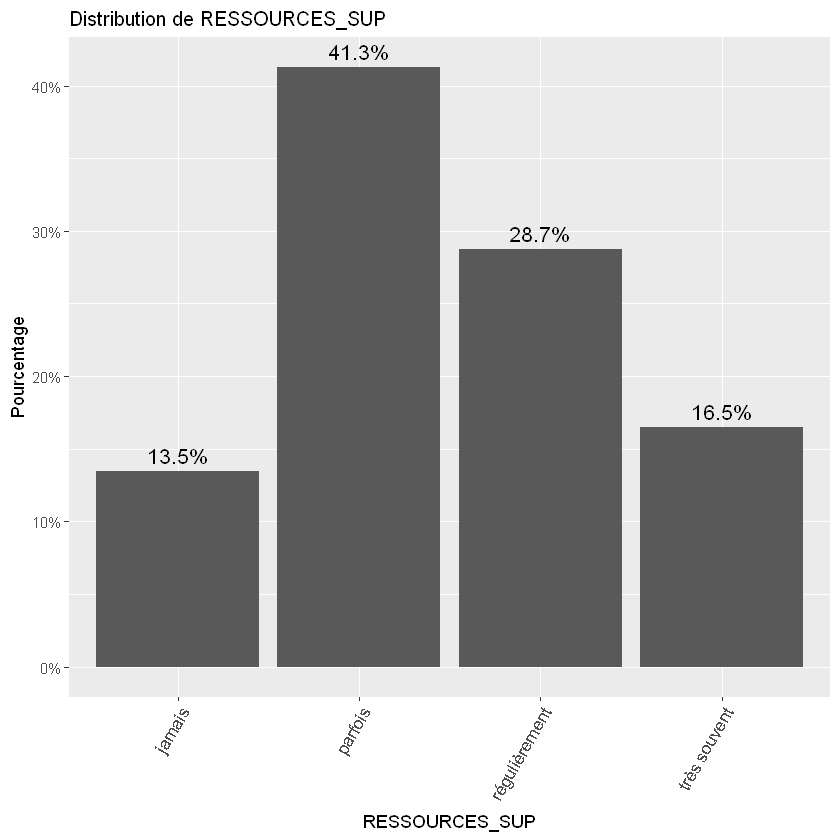

In [51]:
print(plot_distribution(insa_cleaned_1, "RESSOURCES_SUP"))

Si l'on considère chaque modalité séparément, les catégories "régulièrement" et "très souvent" ne représentent pas la majorité. Cependant, en les regroupant, plus de 45 % des étudiants recherchent des connaissances extérieures "régulièrement" ou "très souvent". À cela s'ajoute 41,3 % des étudiants qui recherchent des ressources supplémentaires "parfois". Cela est relativement positif, car notre école étant une école d'ingénieurs, il est essentiel d'explorer des connaissances pratiques en dehors des manuels académiques pour apprendre les techniques les plus récentes. De plus, c'est un moyen de renforcer l'autonomie des étudiants dans leur apprentissage.

### Variable AMIS

 En dehors des cours, à quelle fréquence retrouvez-vous vos amis ?

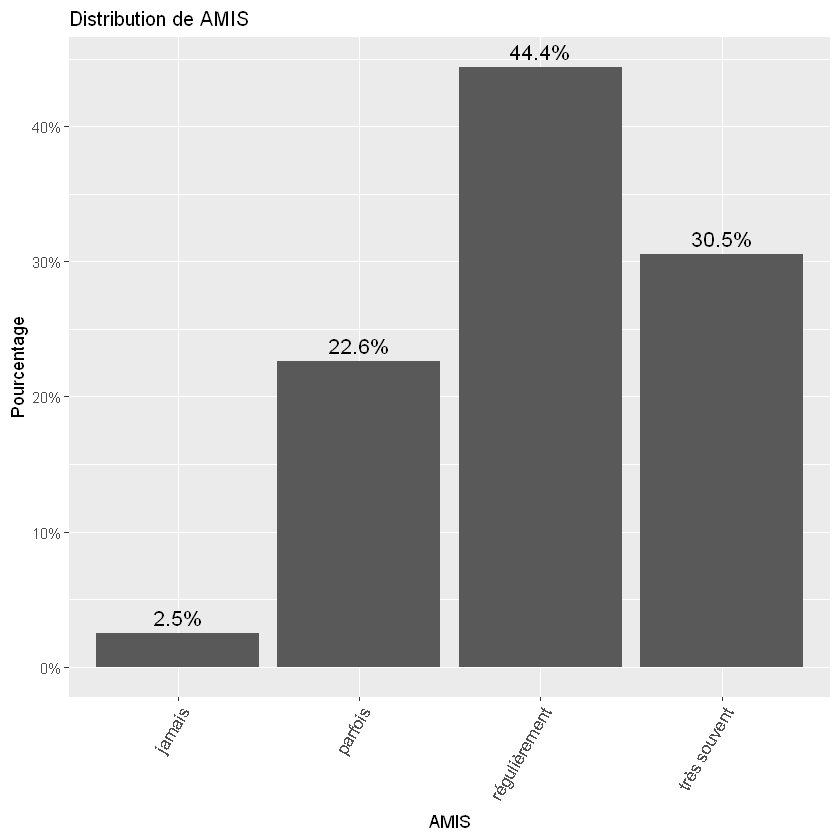

In [52]:
print(plot_distribution(insa_cleaned_1, "AMIS"))

Nous constatons que la majorité des étudiants bénéficient d'un bon environnement social, avec près de 75 % qui rencontrent leurs amis "régulièrement" ou "très souvent". Seuls 2,5 % des étudiants ont indiqué ne jamais rencontrer leurs amis, tandis que 22,6 % les voient "parfois".

### Variable FAMILLE

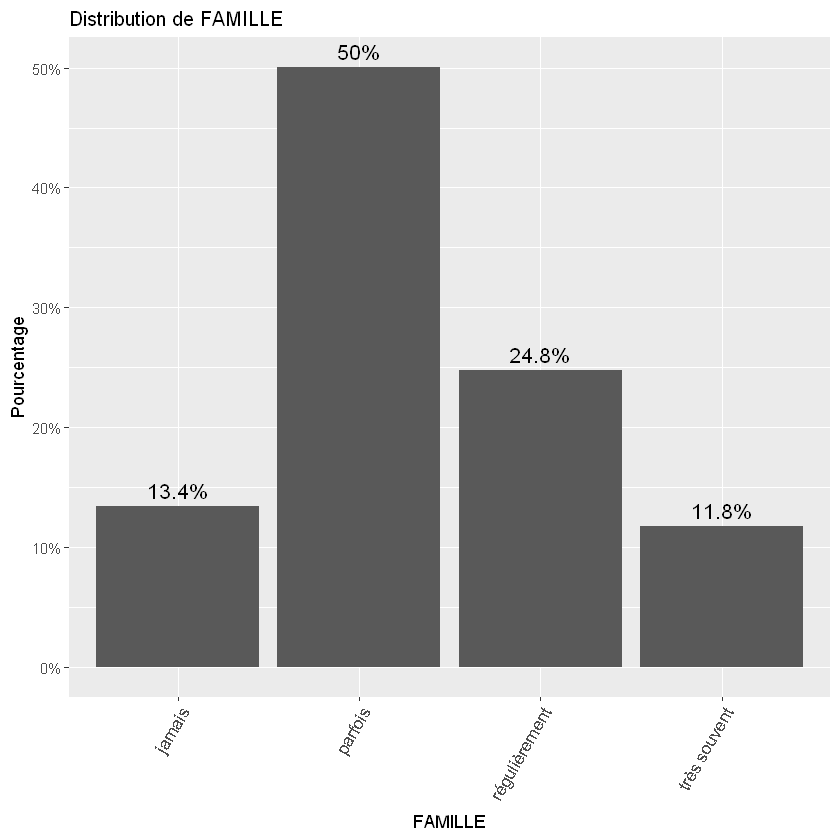

In [53]:
print(plot_distribution(insa_cleaned_1, "FAMILLE"))

Nous constatons que, du fait que les étudiants vivent souvent loin de chez eux à l'université, 50 % d'entre eux ne retrouvent leur famille que "parfois". Cependant, plus de 46 % des étudiants voient leur famille "régulièrement" ou "très souvent", tandis qu'une part non négligeable de 13,4 % n'ont jamais l'occasion de retrouver leur famille.

### Variable ISOLEMENT

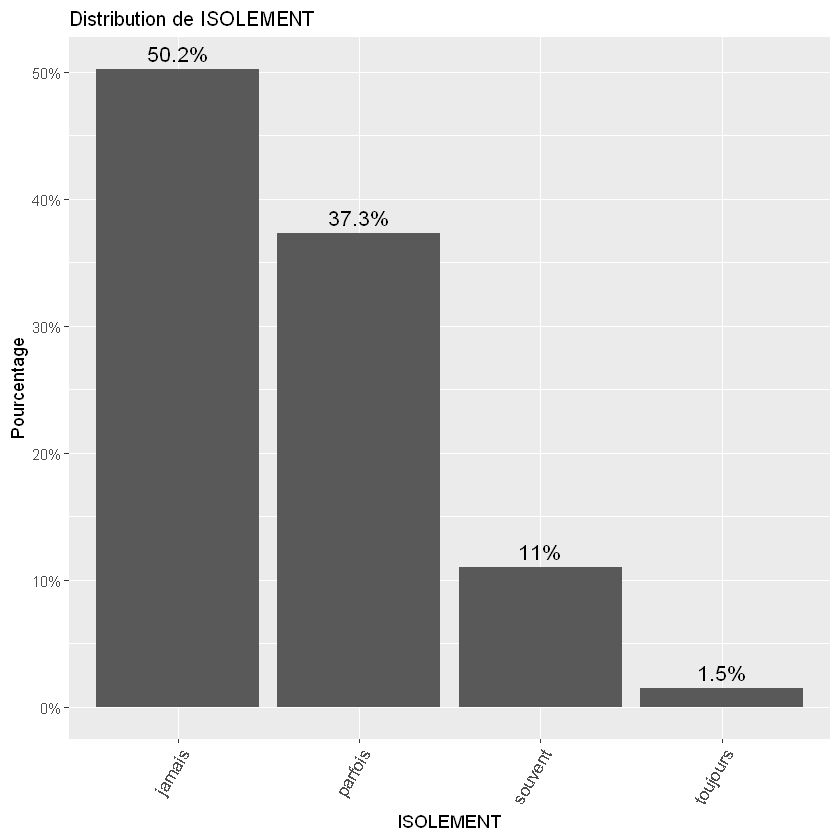

In [54]:
print(plot_distribution(insa_cleaned_1, "ISOLEMENT"))

Nous constatons que la majorité des étudiants ne ressentent l'isolement que "parfois" (87,5 %). Cependant, une part non négligeable de 12,5 % se sentent "souvent" ou "toujours" isolés.

### Variable ASSOCIATIF, ASSOCIATIF_POSITIF

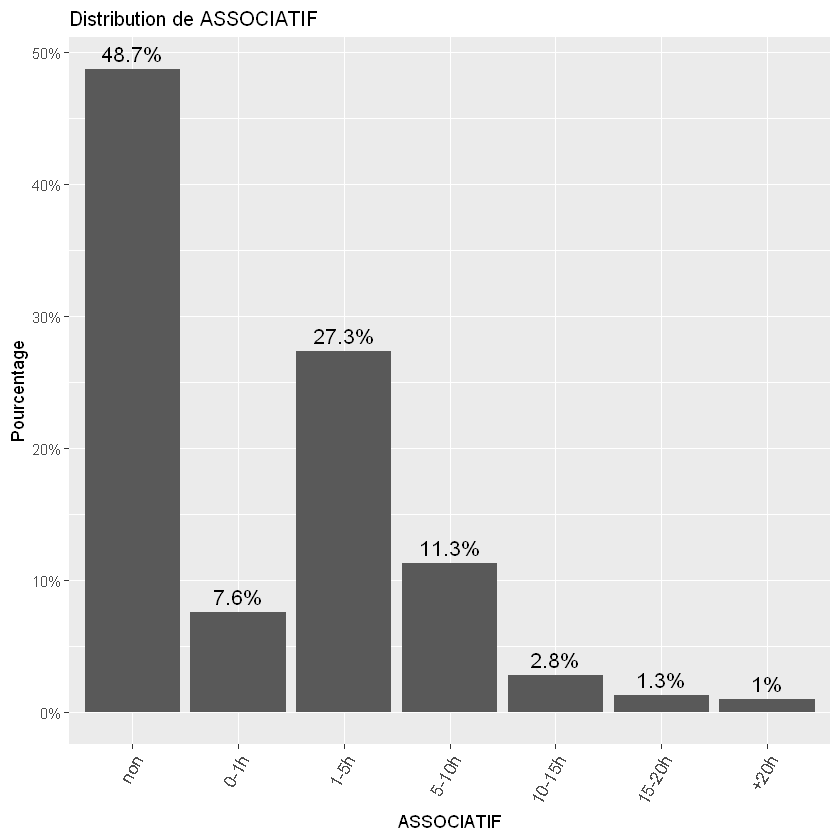

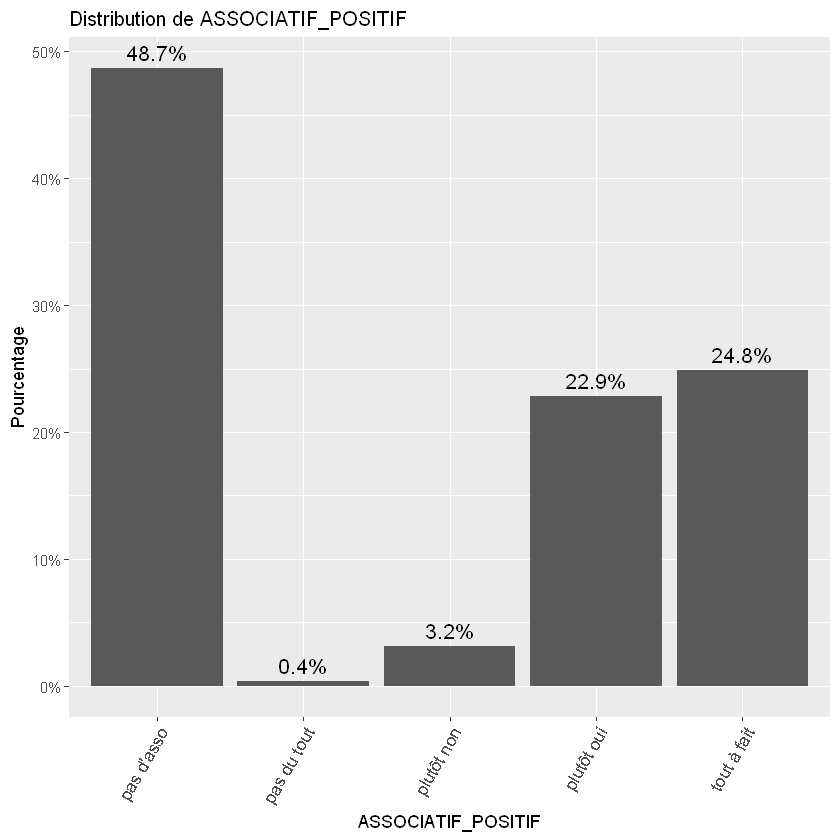

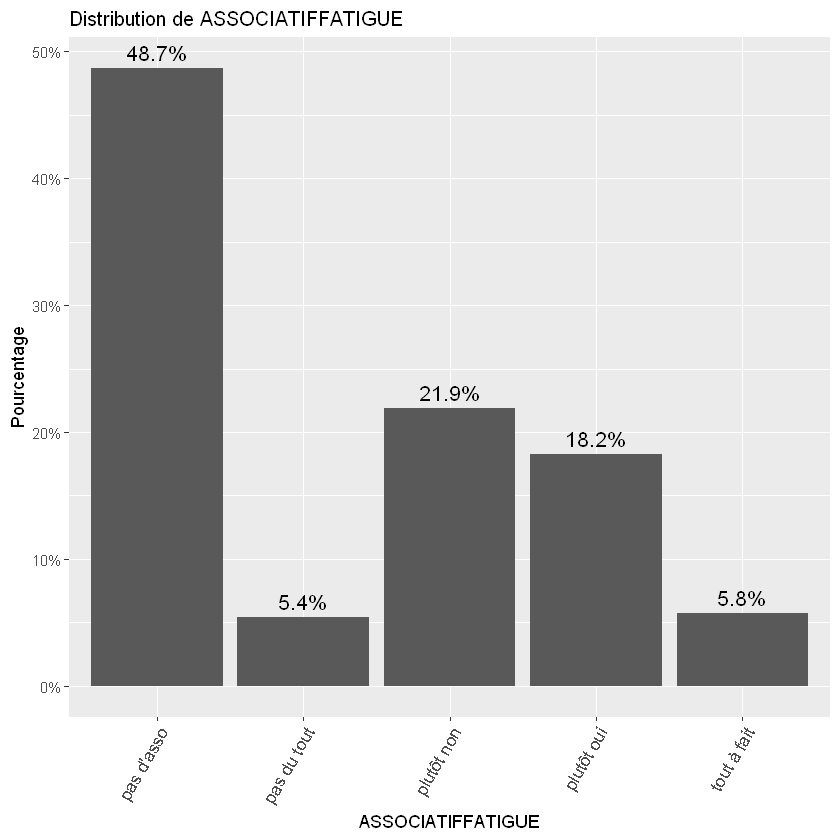

In [55]:
print(plot_distribution(insa_cleaned_1, "ASSOCIATIF"))
print(plot_distribution(insa_cleaned_1, "ASSOCIATIF_POSITIF"))
print(plot_distribution(insa_cleaned_1, "ASSOCIATIFFATIGUE"))

Nous constatons que près de la moitié (48,7 %) de nos étudiants ne participent pas aux activités associatives, un pourcentage relativement élevé. Cependant, parmi ceux qui sont impliqués dans des associations, 91,2 % (47,7/51,3) estiment que cette vie associative a un impact positif sur leur bien-être général. Cela montre que, globalement, la participation à des associations est bénéfique pour les étudiants. Par ailleurs, comme les trois variables sont liées, je ne conserverai qu'une seule variable, "ASSOCIATIF", afin d'éviter la redondance d'informations pour les étudiants non participants.

In [56]:
insa_cleaned_1 <- insa_cleaned_1 %>%
    select(-ASSOCIATIF_POSITIF, -ASSOCIATIFFATIGUE)

### Variable SPORTTEMPS

 Quel temps consacrez-vous au sport chaque semaine?

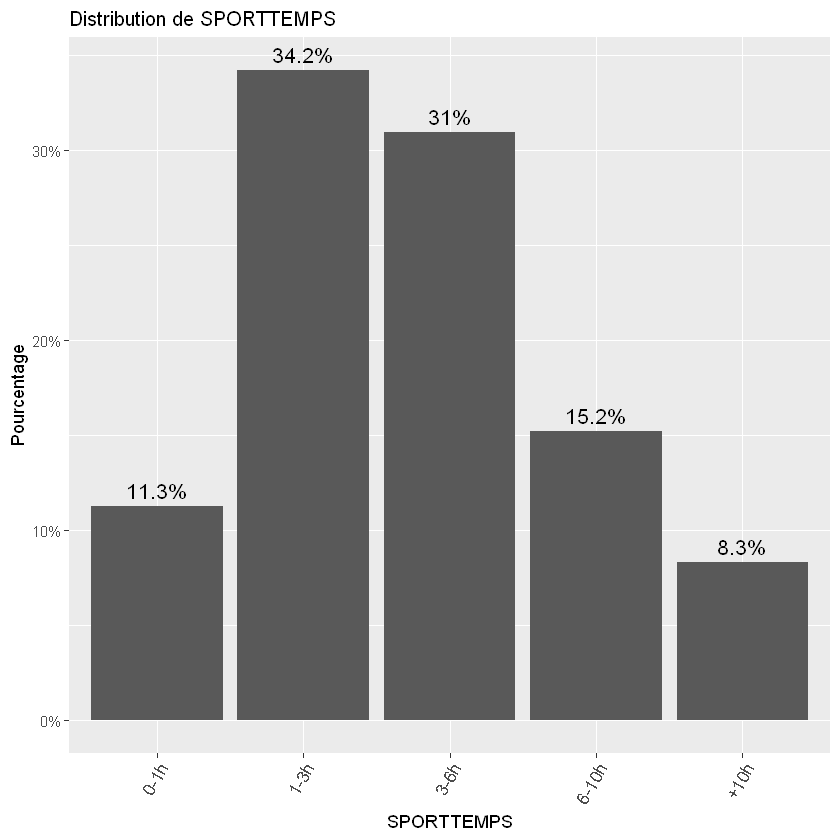

In [57]:
print(plot_distribution(insa_cleaned_1, "SPORTTEMPS"))

La majorité des étudiants (88,7 %) consacrent au moins une heure par semaine aux activités sportives, ce qui montre qu'une grande partie de nos étudiants participe à des activités physiques. Cependant, la modalité la plus représentée est celle des 1 à 3 heures par semaine, qui concerne 34,2 % des étudiants. Cela indique que, bien que la plupart des étudiants participent à des activités sportives, plus d'un tiers d'entre eux n'y consacre qu'un temps limité.

### Variable SPECTACLES, SPECTACLES_POSITIF

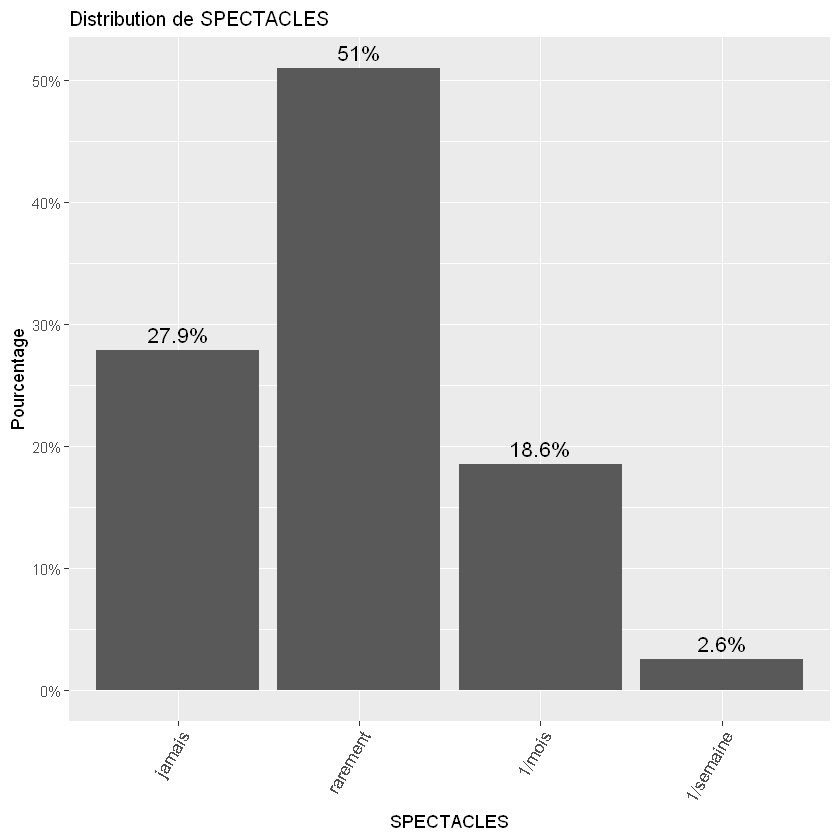

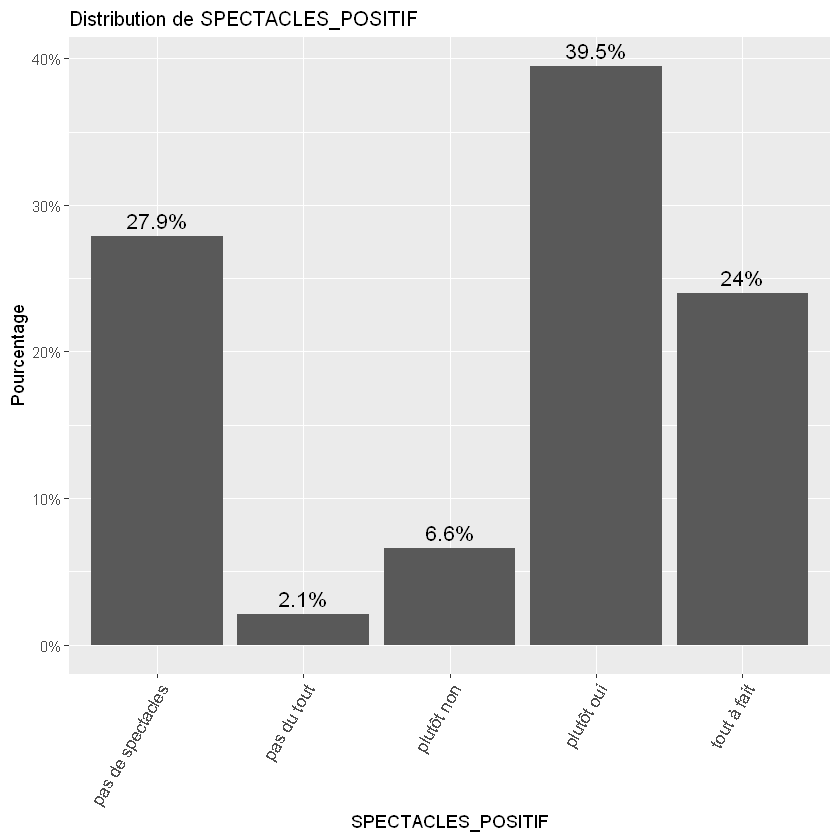

In [58]:
print(plot_distribution(insa_cleaned_1, "SPECTACLES"))
print(plot_distribution(insa_cleaned_1, "SPECTACLES_POSITIF"))

La majorité de nos étudiants (près de 80 %) n'assistent jamais ou rarement à des performances artistiques, ce qui suggère que les étudiants en ingénierie ne participent pas souvent à des activités artistiques. Par ailleurs, comme les deux variables présentent une redondance d'information, je ne conserverai que la variable "fréquence assistez-vous à des performances artistiques" afin d'éviter la répétition des données.

In [59]:
insa_cleaned_1 <- insa_cleaned_1 %>%
    select(-SPECTACLES_POSITIF)

### Variable SORTIEBAR

 A quelle fréquence sortez-vous en bar/boîte de nuit ?

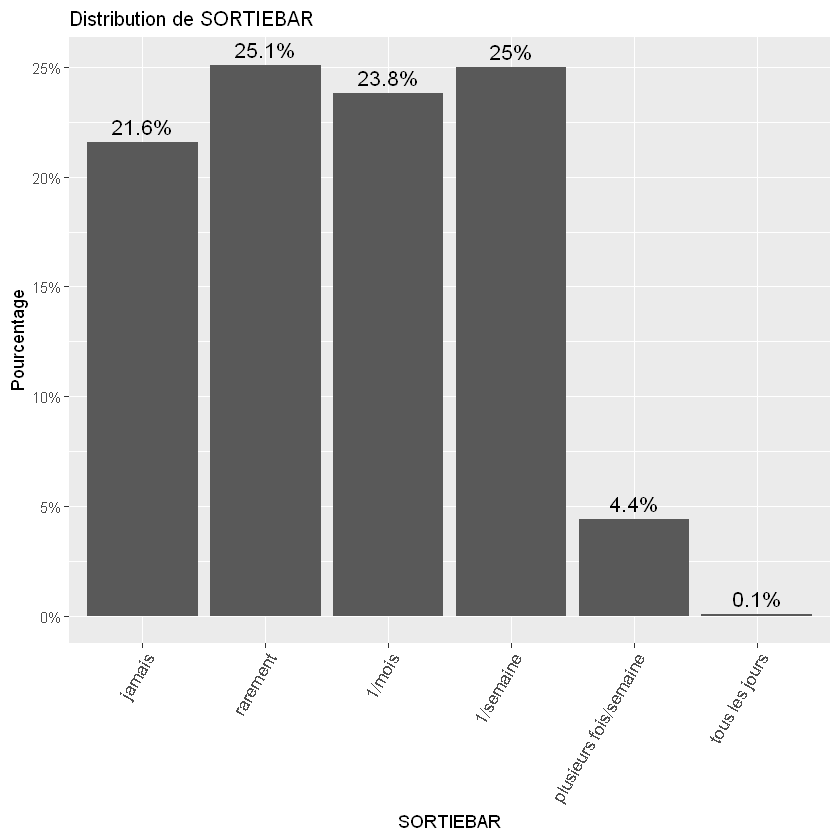

In [60]:
print(plot_distribution(insa_cleaned_1, "SORTIEBAR"))

La répartition de la fréquence à laquelle les étudiants sortent en bar ou en boîte de nuit est assez équilibrée : environ la moitié des étudiants ne sortent "jamais" ou "rarement", tandis que l'autre moitié sort "une fois par mois" ou "une fois par semaine". Parmi ces derniers, 4,5 % des étudiants sortent "plusieurs fois par semaine" ou "tous les jours".

### Variable DETENTE

 A quelle fréquence vous accordez-vous des temps de détente ?

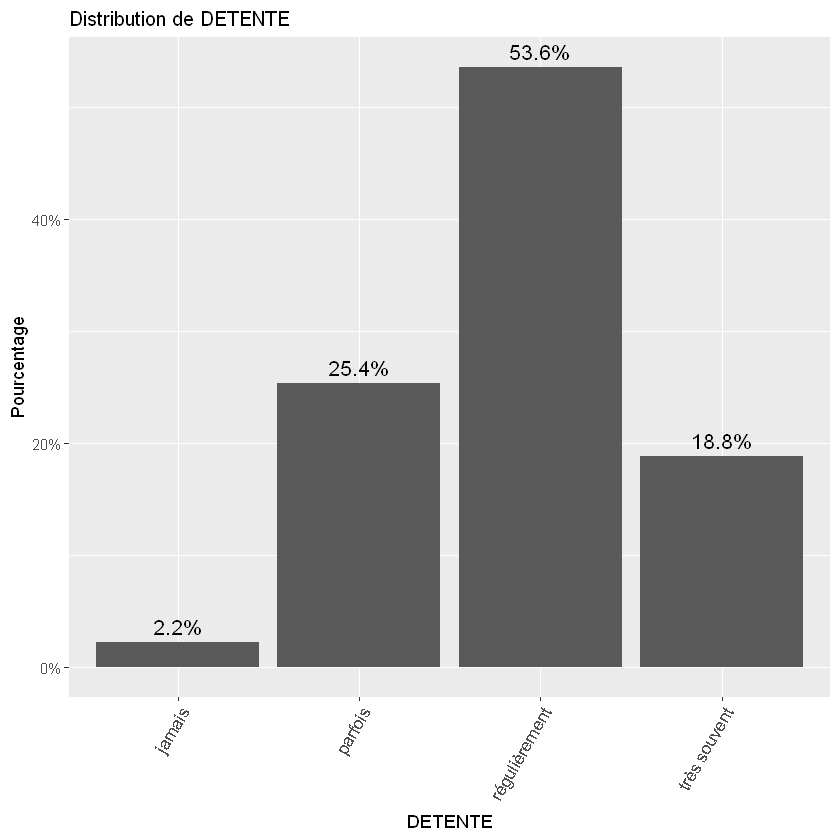

In [61]:
print(plot_distribution(insa_cleaned_1, "DETENTE"))

La majorité des étudiants (plus de 70 %) prennent régulièrement ou très souvent du temps pour se détendre. À l'inverse, une petite proportion de 2,2 % des étudiants ne se détendent jamais, tandis que le reste le fait occasionnellement.

### Variable ECRANS

 Combien de temps par jour passez-vous devant les écrans en dehors du cadre scolaire (réseaux sociaux, films, jeux vidéos..) ?

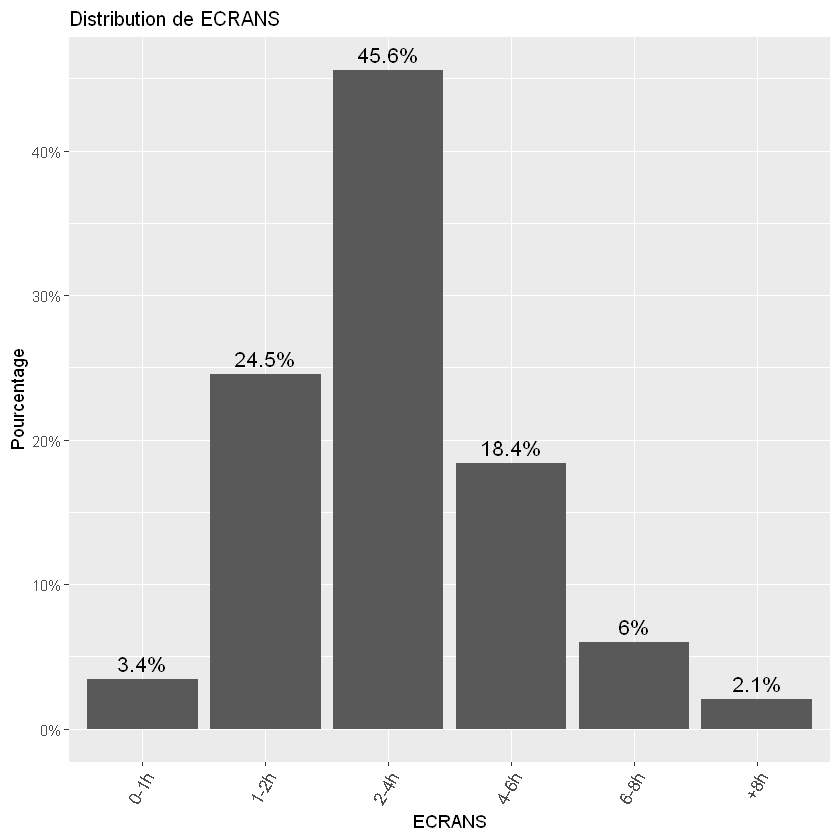

In [62]:
print(plot_distribution(insa_cleaned_1, "ECRANS"))

Près de la moitié des étudiants (45,6 %) passent entre 2 et 4 heures par jour devant un écran pour des activités non liées aux études, et une proportion assez importante (plus d'un quart) consacre plus de 4 heures par jour à ces activités. Cela pourrait être un signe à prendre en compte concernant la gestion efficace du temps entre les études et les loisirs.

### Variable SOMMEIL

 Comment évaluez-vous la qualité de votre sommeil ?


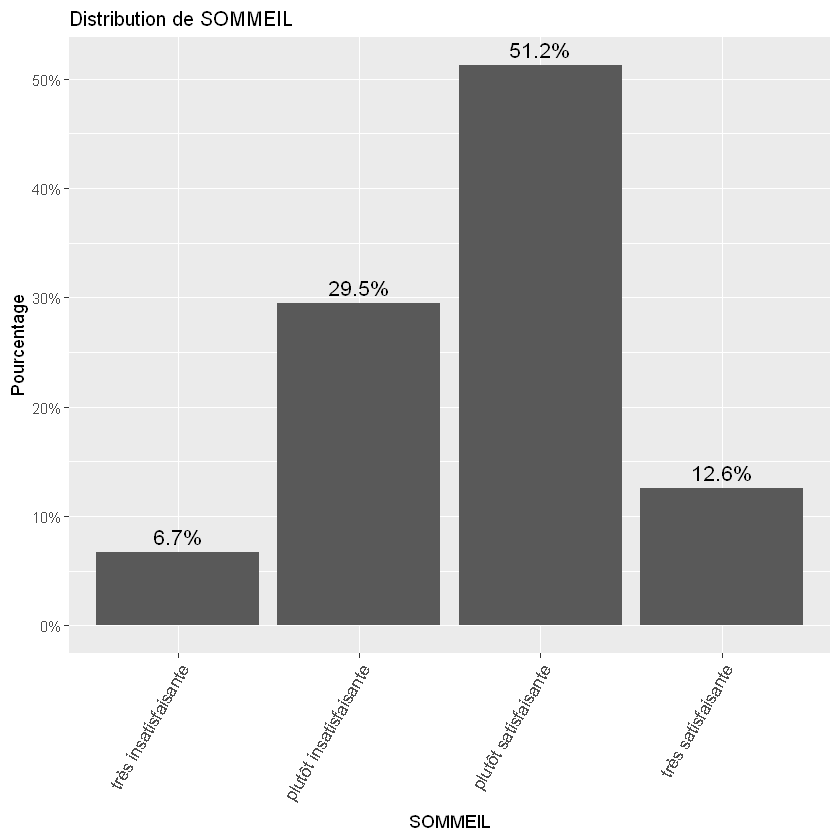

In [63]:
print(plot_distribution(insa_cleaned_1, "SOMMEIL"))

Nous constatons que la majorité des étudiants (63,7 %) sont satisfaits de la qualité de leur sommeil. Cependant, une proportion non négligeable (plus de 36 %) estime que la qualité de leur sommeil n'est pas très bonne.

### Variable ALIMENTATION

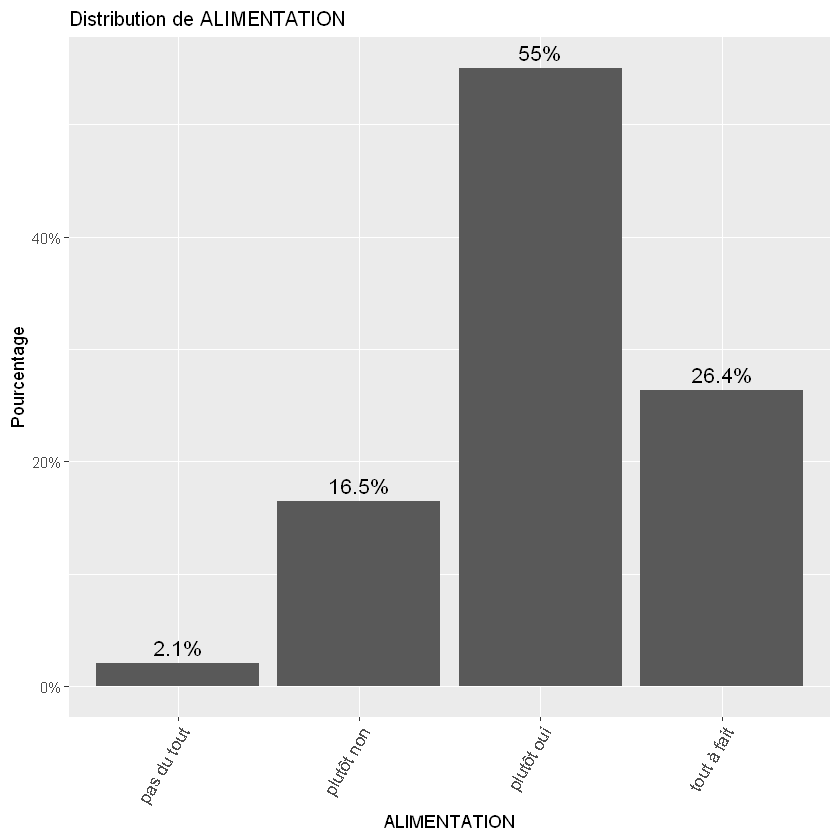

In [64]:
print(plot_distribution(insa_cleaned_1, "ALIMENTATION"))

### Variable MOTIVATION

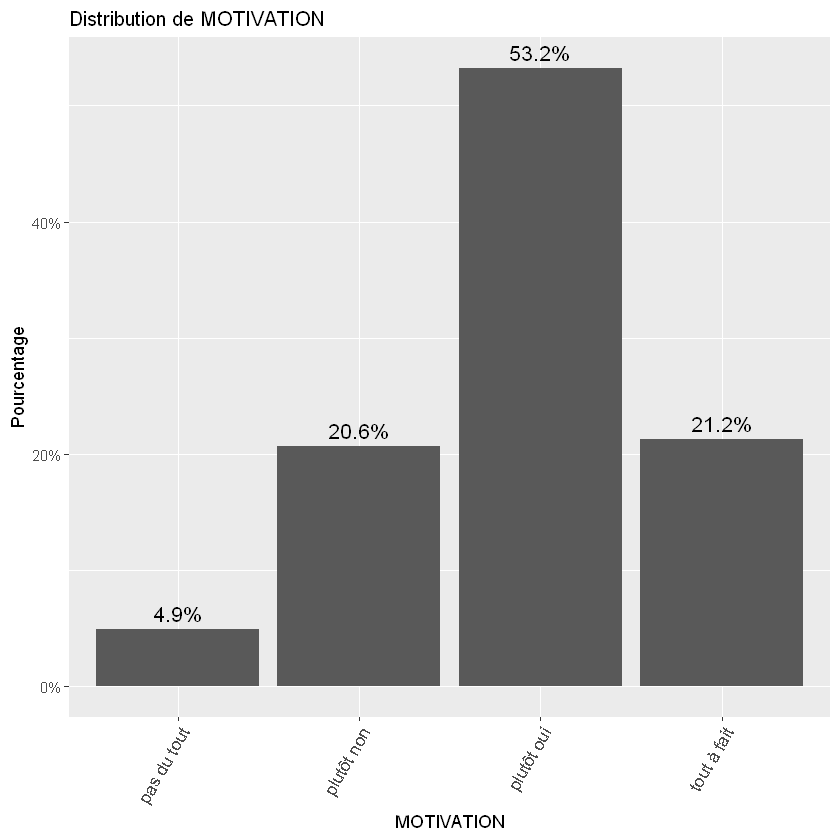

In [65]:
print(plot_distribution(insa_cleaned_1, "MOTIVATION"))

### Variable SENSATIONREUSSITE

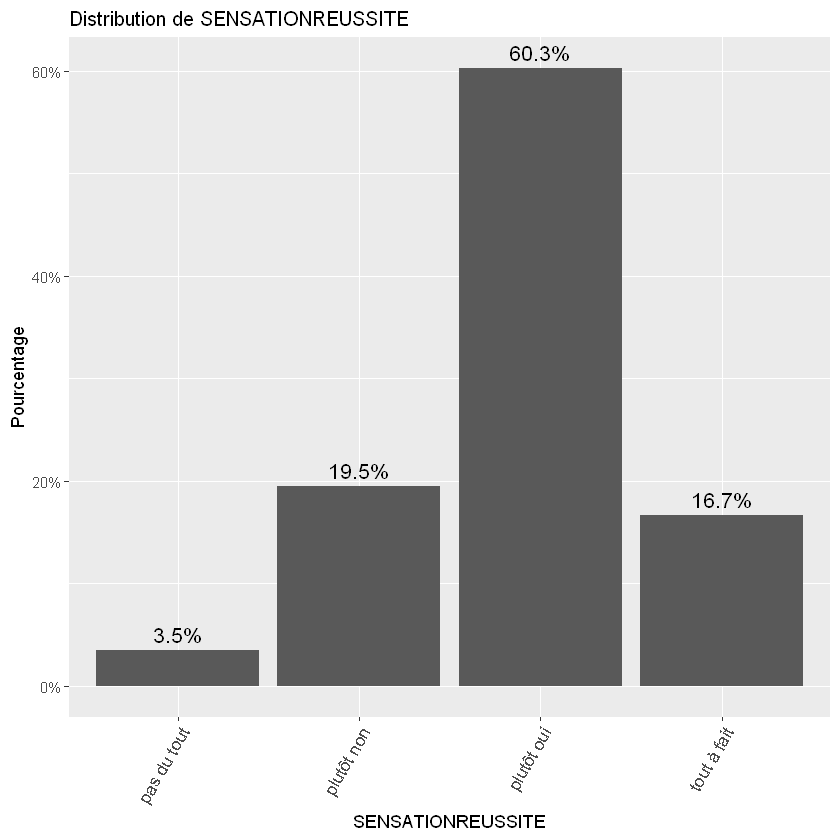

In [66]:
print(plot_distribution(insa_cleaned_1, "SENSATIONREUSSITE"))

### Variable ADEQUATION

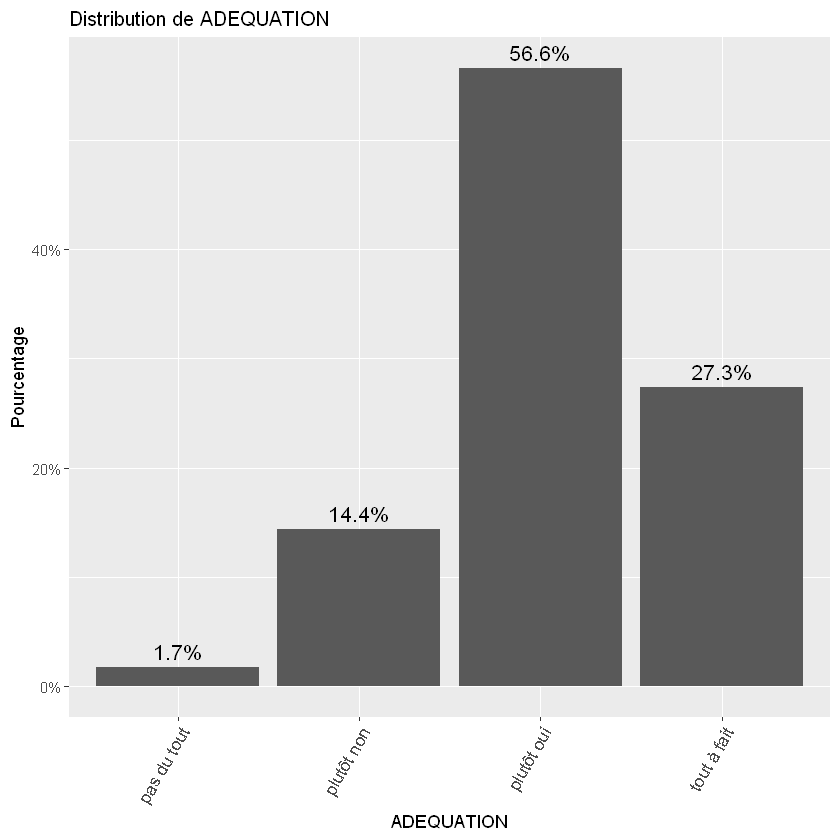

In [67]:
print(plot_distribution(insa_cleaned_1, "ADEQUATION"))

### Variable PREPMETIER

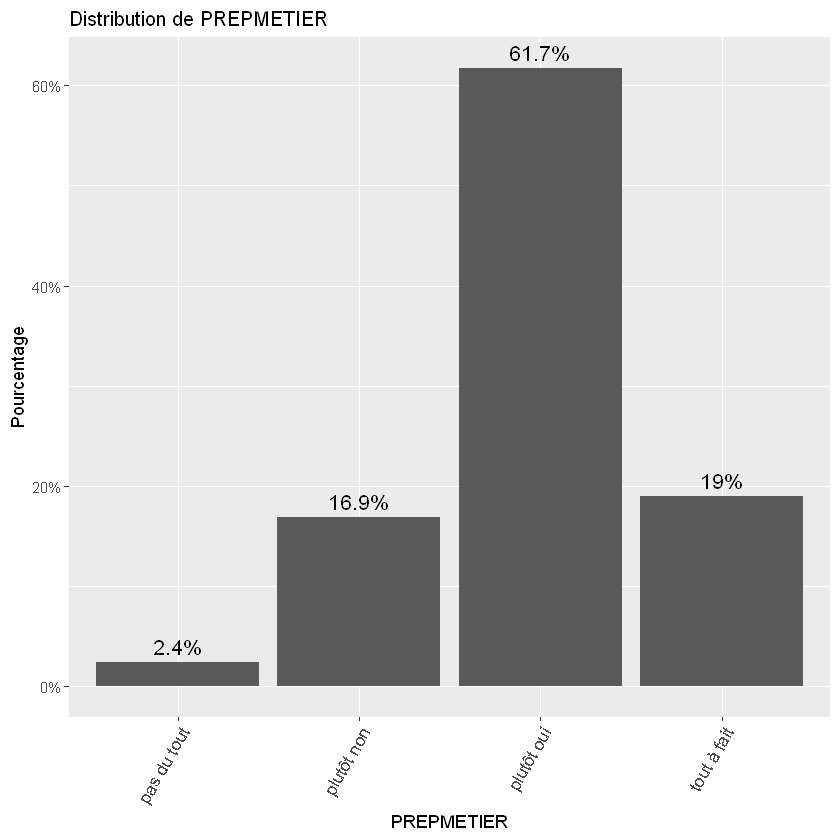

In [68]:
print(plot_distribution(insa_cleaned_1, "PREPMETIER"))

### Variable PROMO

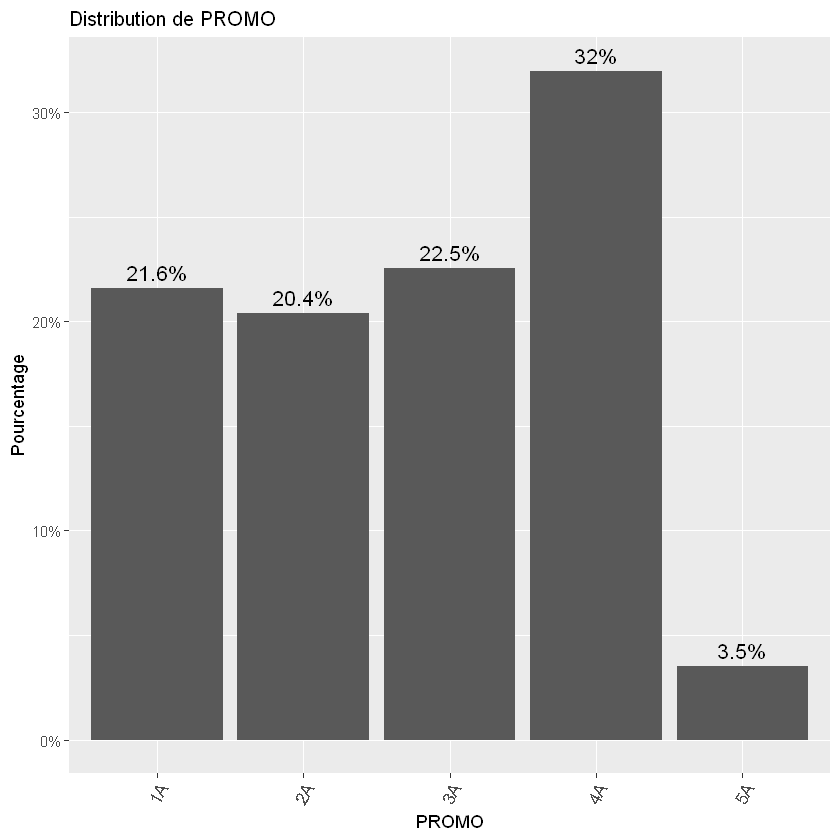

In [69]:
print(plot_distribution(insa_cleaned_1, "PROMO"))

### Variable SPECIALITE_PO

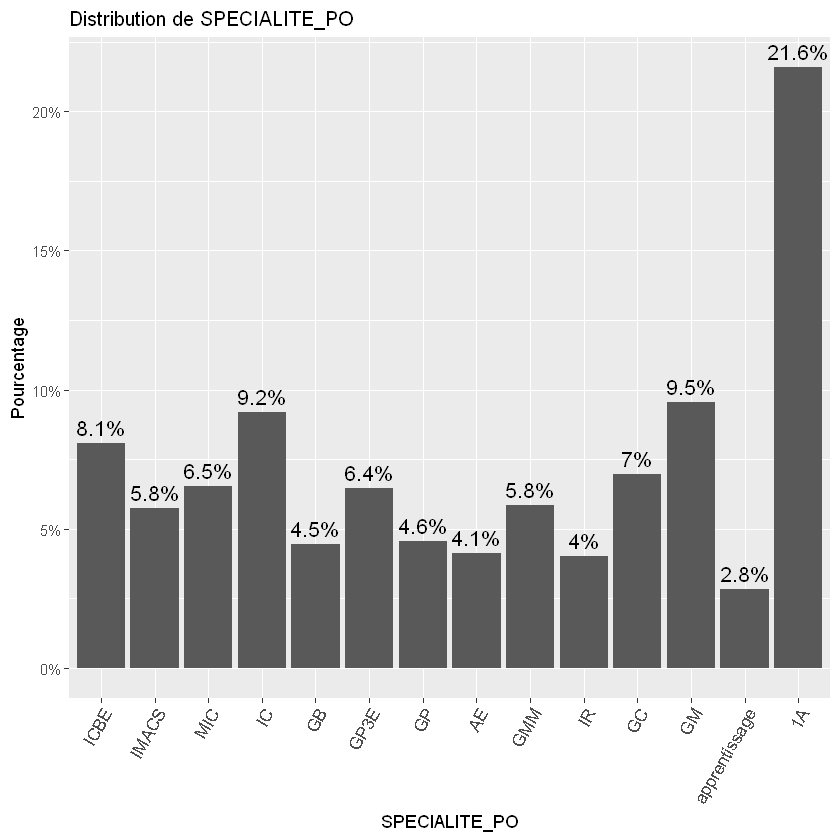

In [70]:
print(plot_distribution(insa_cleaned_1, "SPECIALITE_PO"))

### Variable COHORTE

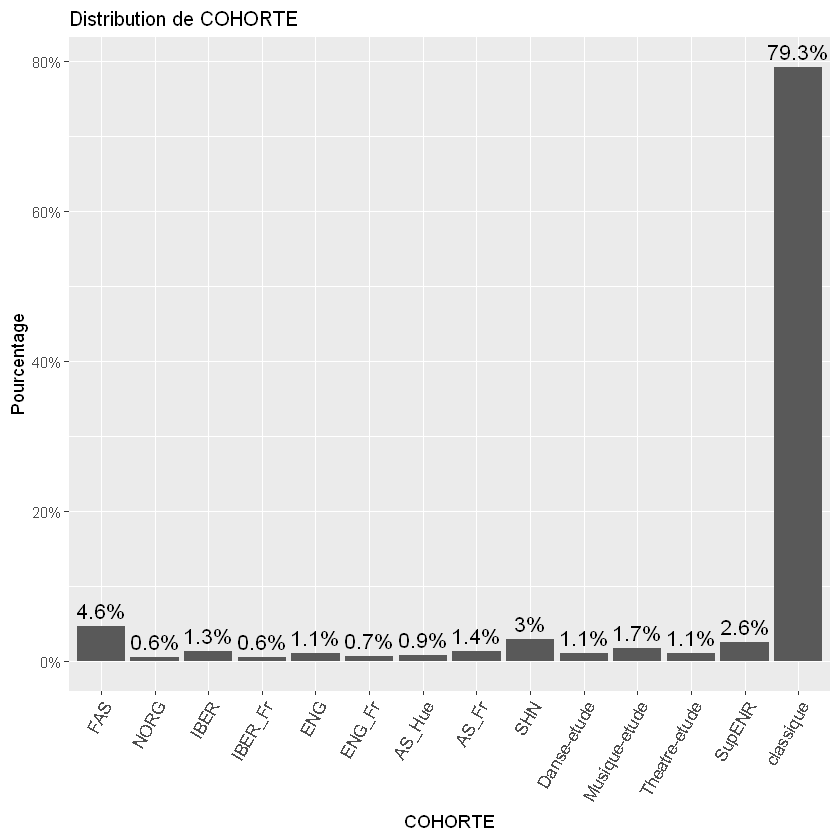

In [71]:
print(plot_distribution(insa_cleaned_1, "COHORTE"))

### Variable DOUBLEDIPLOME

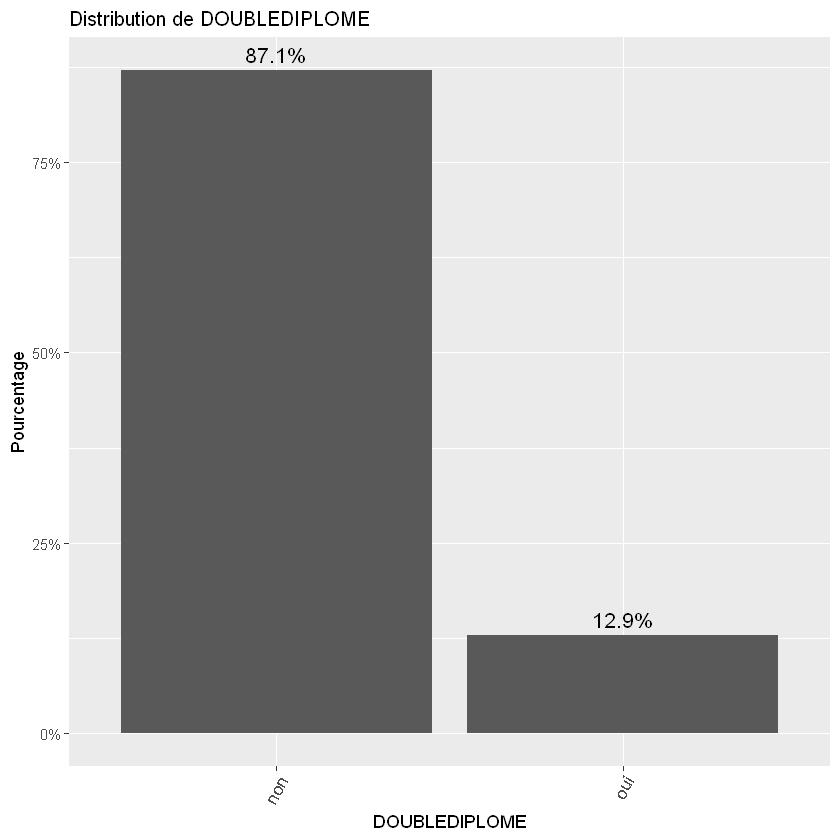

In [72]:
print(plot_distribution(insa_cleaned_1, "DOUBLEDIPLOME"))

### Variable INTEGRATION

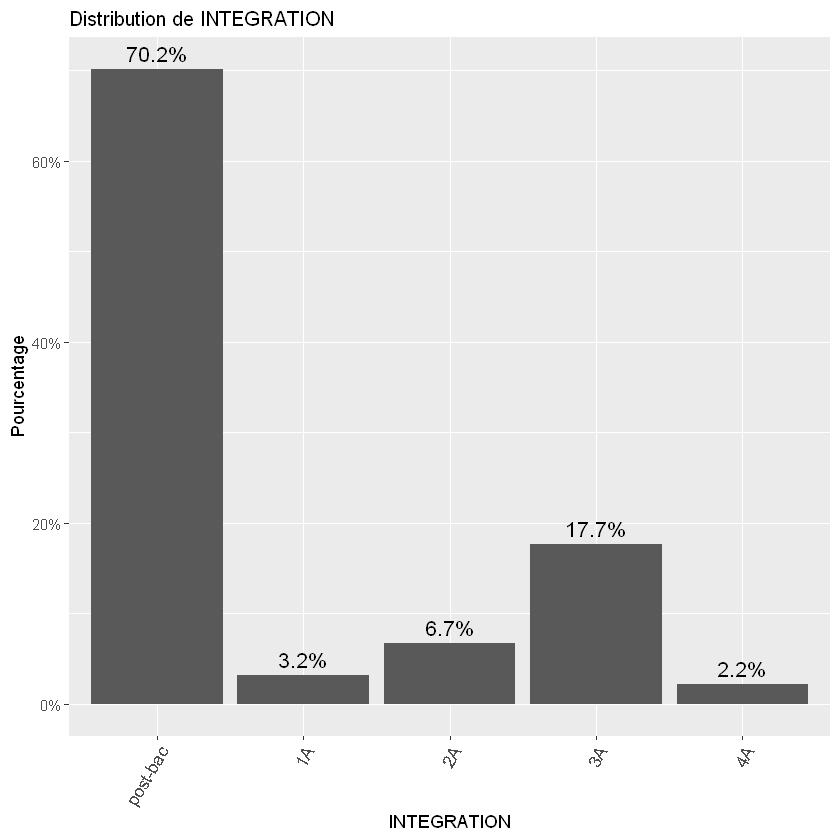

In [73]:
print(plot_distribution(insa_cleaned_1, "INTEGRATION"))

### Variable BACTYPE

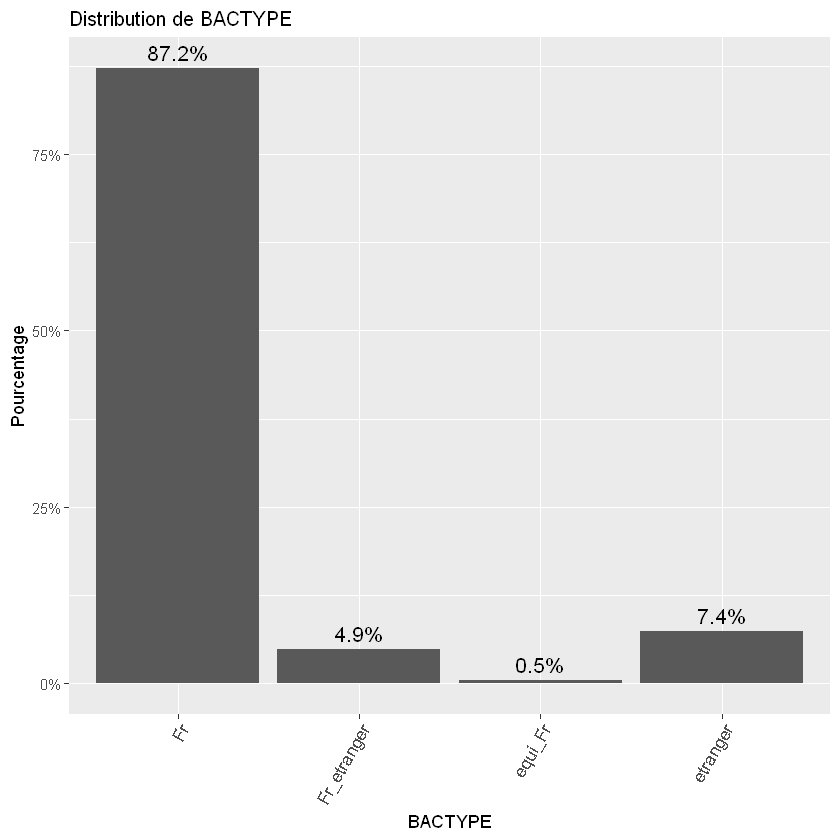

In [74]:
print(plot_distribution(insa_cleaned_1, "BACTYPE"))

## IV. Analyses statistiques inférentielles

Avant de construire un modèle, on voit un autre problème ici : nous avons des modalités avec des fréquences d'apparition très faibles, par exemple pour les variables LOGEMENTBIEN, ACT_PRO(TRAVAILTEMPS), COMCONSTRUCTIFS(NON), PRESENCE_TD,... Cela rend les estimations des paramètres de ces modalités très instables, entraînant du bruit et un surajustement du modèle. Par conséquent, la mise en commun augmente le nombre d'observations par groupe, aidant ainsi le modèle à apprendre des modèles de manière plus cohérente. De plus, regrouper les variables avec une fréquence faible mais des significations similaires aide à réduire la complexité du modèle, car chaque modalité dans une variable catégorielle crée une nouvelle dimension spatiale lorsqu’elle est codée à l’aide de la méthode de codage one-hot, entraînant une augmentation du nombre de paramètres à apprendre et un risque accru de surajustement.
Par exemple, si nous avons seulement un étudiant qui choisit SORTIEBAR_tous les jours, et que cet étudiant redouble, nous risquons un surajustement car les variables REDOUBLEMENT et SORTIEBAR_tous les jours seraient complètement corrélées.
Après avoir combiné les modalités à faible fréquence et de signification similaire, nos données seront entièrement propres et prêtes pour la construction du modèle.

In [75]:
insa_cleaned_2 <- insa_cleaned_1 %>%
  mutate(
    ACT_PRO = fct_collapse(ACT_PRO, "oui +5" = c("oui 5-10h", "oui 10-15h", "oui +15h")),
    COMMENTAIRE = fct_collapse(COMMENTAIRE, "souvent" = c("souvent", "toujours")),
    ETUDEWE = fct_collapse(ETUDEWE, "-1h" = c("0h", "0-1h")),
    ETUDEGROUPE = fct_collapse(ETUDEGROUPE, "souvent" = c("souvent", "toujours")),
    REVISIONSDEB = fct_collapse(REVISIONSDEB, "-4 jours avant" = c("3-4 jours avant", "la veille")),
    CONCENTRATIONPERSO = fct_collapse(CONCENTRATIONPERSO, "moyennement" = c("pas du tout", "moyennement")),
    CONDITIONSTRAVAIL = fct_collapse(CONDITIONSTRAVAIL, "moyennes" = c("mauvaises", "moyennes")),
    AMIS = fct_collapse(AMIS, "parfois" = c("jamais", "parfois")),
    ISOLEMENT = fct_collapse(ISOLEMENT, "souvent" = c("souvent", "toujours")),
    ASSOCIATIF = fct_collapse(ASSOCIATIF, "+10h" = c("10-15h", "15-20h", "+20h")),
    SPECTACLES = fct_collapse(SPECTACLES, "+1/mois" = c("1/mois", "1/semaine")),
    SORTIEBAR = fct_collapse(SORTIEBAR, "plusieurs fois/semaine" = c("plusieurs fois/semaine", "tous les jours")),
    DETENTE = fct_collapse(DETENTE, "parfois" = c("jamais", "parfois")),
    ECRANS = fct_collapse(ECRANS, "-2h" = c("0-1h", "1-2h"), "+6h" = c("6-8h", "+8h")),
    ALIMENTATION = fct_collapse(ALIMENTATION, "plutôt non" = c("pas du tout", "plutôt non")),
    #SENSATIONREUSSITE = fct_collapse(SENSATIONREUSSITE, "plutôt non" = c("pas du tout", "plutôt non")),  
    ADEQUATION = fct_collapse(ADEQUATION, "plutôt non" = c("pas du tout", "plutôt non")),
    PREPMETIER = fct_collapse(PREPMETIER, "plutôt non" = c("pas du tout", "plutôt non")),
    COHORTE = fct_collapse(COHORTE, "NORG-IBER-ENG-AS" = c("NORG", "IBER", "IBER_Fr", "ENG", "ENG_Fr", "AS_Hue", "AS_Fr"), "Arts_Etude" = c("Danse-etude", "Musique-etude", "Theatre-etude")),
    INTEGRATION = fct_collapse(INTEGRATION, "1A-2A" = c("1A", "2A"),"3A-4A" = c("3A", "4A")),
    BACTYPE = fct_collapse(BACTYPE, "Fr" = c("Fr", "equi_Fr")),
    IMPLICATION_CM = fct_collapse(IMPLICATION_CM, "Parfois" = c("Jamais", "Parfois"))
  )
insa_cleaned_2<- droplevels(insa_cleaned_2)

write_xlsx(insa_cleaned_2, "insa_cleaned_2.xlsx")

In [76]:
# Obtenir la liste des variables à partir des noms des colonnes de insa_clean
variables_to_plot <- names(insa_cleaned_2)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(insa_cleaned_2, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("distributions2.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

D'abord, je souhaite construire un modèle de forêt aléatoire pour tous les étudiants. Pour ce faire, je vais supprimer les variables RATTRAPAGES, REDOUBLEMENT, CLASSEMENTDERNIER, et CLASSEMENT1A, car les étudiants de première année ou les nouveaux entrants n'ont pas de valeurs pour ces variables. Nous allons utiliser la variable cible SENSATIONREUSSITE, car le sentiment de réussir vos études à l’INSA peut décrire la confiance et la certitude des étudiants quant à leurs performances académiques à l'INSA, et c'est une variable applicable à tous les étudiants sondés.

### IV.1 Analyse pour tous les étudiants

#### IV.1.1 Modèle Randomforest

In [77]:
# Supprimer les variables non nécessaires
insa_cleaned_3 <- insa_cleaned_2 %>%
  select(-RATTRAPAGES, -REDOUBLEMENT, -CLASSEMENTDERNIER, -CLASSEMENT1A)

# Vérifier les variables restantes
str(insa_cleaned_3)

insa_cleaned_3 <- droplevels(insa_cleaned_3)


write_xlsx(insa_cleaned_3, "insa_cleaned_3.xlsx")

tibble [1,163 × 38] (S3: tbl_df/tbl/data.frame)
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ ACT_PRO           : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 3 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ ETUDEWE           : Factor w/ 6 levels "-1h","1-2h","2-4h",..: 3 3 4 5 4 2 2 6 4 4 ...
 $ ETUDEGROUPE       : Factor w/ 3 levels "jamais","parfois",..: 1 1 2 2 2 1 1 2 2 3 ...
 $ ETUDEDEHORS       : Factor w/ 4 levels "jamais","parfois",..: 3 2 2 2 3 3 2 2 1 3 ...
 $ REVISIONSDEB      : Factor w/ 5 levels "semestre","1 mois avant",..: 3 3 2

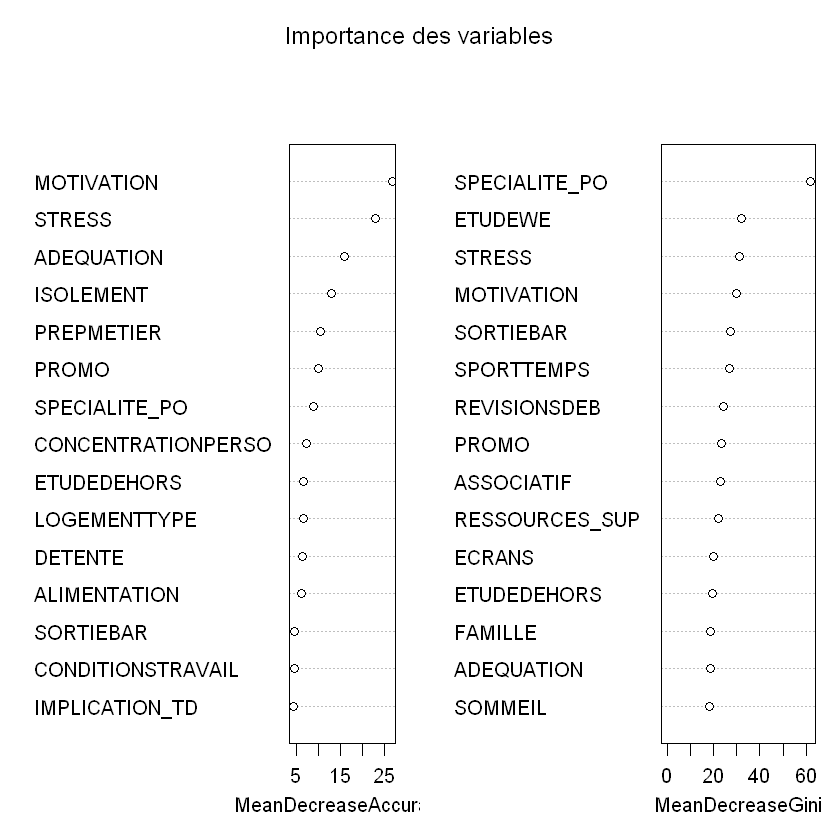

In [78]:
# Fixer le seed pour la reproductibilité
set.seed(151)

# Construire le modèle Random Forest en utilisant tout le jeu de données
rf_model_full <- randomForest(SENSATIONREUSSITE ~ ., data = insa_cleaned_3, mtry = 6,ntree = 1000, importance = TRUE)

# Évaluer l'importance des variables
importance_values <- importance(rf_model_full)

# Tracer l'importance des variables
varImpPlot(rf_model_full, 
           sort = TRUE, 
           n.var = 15,  # Affiche les 15 variables les plus importantes
           main = "Importance des variables")

MeanDecreaseAccuracy :
+ Cet indicateur mesure la diminution de la précision du modèle lorsque la variable concernée est supprimée. Une valeur élevée indique que la variable est cruciale pour la précision du modèle.
+ Par exemple, la variable STRESS avec une valeur de 15.87247744 indique que si cette variable est supprimée, la précision du modèle diminuera de manière significative, ce qui montre que c'est une variable très importante.

MeanDecreaseGini :
+ Cet indicateur mesure la réduction de l'impureté dans les arbres de décision lorsque la variable est utilisée pour diviser les données. Une valeur élevée suggère que la variable est très utile pour effectuer des divisions efficaces dans le modèle.
+ Par exemple, la variable SPECIALITE_PO avec une valeur de 33.783764 montre que cette variable est très importante pour la classification des données et pour la réduction de l'impureté dans le modèle.

Graphique de gauche : MeanDecreaseAccuracy :
+ Les variables telles que STRESS, MOTIVATION et ADEQUATION présentent les valeurs de MeanDecreaseAccuracy les plus élevées, indiquant qu'elles ont un impact important sur la précision du modèle.

Graphique de droite : MeanDecreaseGini :
+ Les variables telles que SPECIALITE_PO, STRESS et MOTIVATION ont des valeurs de MeanDecreaseGini élevées, ce qui signifie qu'elles jouent un rôle clé dans la division efficace des données.

Cas 1 : Variable avec MeanDecreaseAccuracy élevé mais MeanDecreaseGini faible
+ Si une variable a un MeanDecreaseAccuracy élevé mais un MeanDecreaseGini faible, cela signifie que cette variable est essentielle pour maintenir la précision du modèle, mais elle n'est pas fréquemment utilisée pour diviser les données dans les arbres de décision. Cela peut se produire si la variable a une corrélation élevée avec la variable cible, mais n'est utilisée que dans un petit nombre d'arbres de décision.

Cas 2 : Variable avec MeanDecreaseGini élevé mais MeanDecreaseAccuracy faible
+ À l'inverse, si une variable a un MeanDecreaseGini élevé mais un MeanDecreaseAccuracy faible, cela indique que cette variable est souvent utilisée pour effectuer des divisions efficaces dans le modèle, mais que sa suppression n'affecte pas de manière significative la précision globale du modèle. cela peut être dû à la multicolinéarité (une forte corrélation avec une ou plusieurs autres variables). Lorsqu'il existe plusieurs variables corrélées, le modèle peut ne pas dépendre d'une variable spécifique, car l'information qu'elle apporte est déjà fournie par d'autres variables.

**Conclusion:  
Nous allons prioriser les variables ayant des valeurs élevées dans les deux indices, puis nous concentrer principalement sur les variables ayant des valeurs élevées dans l'indice MeanDecreaseAccuracy, car elles ont une forte corrélation avec la variable cible. De plus, nous pourrons également ajouter les variables ayant des valeurs très élevées dans l'indice MeanDecreaseGini.**

In [79]:
# Définir une fonction pour le test Chi-deux et le graphique de barres empilées
chi_square_test_and_plot <- function(data, var1, var2) {
  
  # Créer un tableau de contingence
  table_var <- table(data[[var1]], data[[var2]])
  
  # Réaliser le test Chi-deux
  chi_test <- chisq.test(table_var)
  
  # Afficher le résultat du test Chi-deux
  cat("Résultat du test Chi-deux pour les variables :", var1, "et", var2, "\n")
  print(chi_test)
  
  # Créer un graphique de barres empilées pour visualiser la relation entre les deux variables
  plot <- ggplot(data, aes_string(x = var1, fill = var2)) +
    geom_bar(position = "fill") +
    labs(y = "Proportion", title = paste("Relation entre", var1, "et", var2)) +
    theme_minimal()
  
  # Afficher le graphique
  print(plot)
}

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : MOTIVATION et SENSATIONREUSSITE 

	Pearson's Chi-squared test

data:  table_var
X-squared = 255.22, df = 9, p-value < 2.2e-16



Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


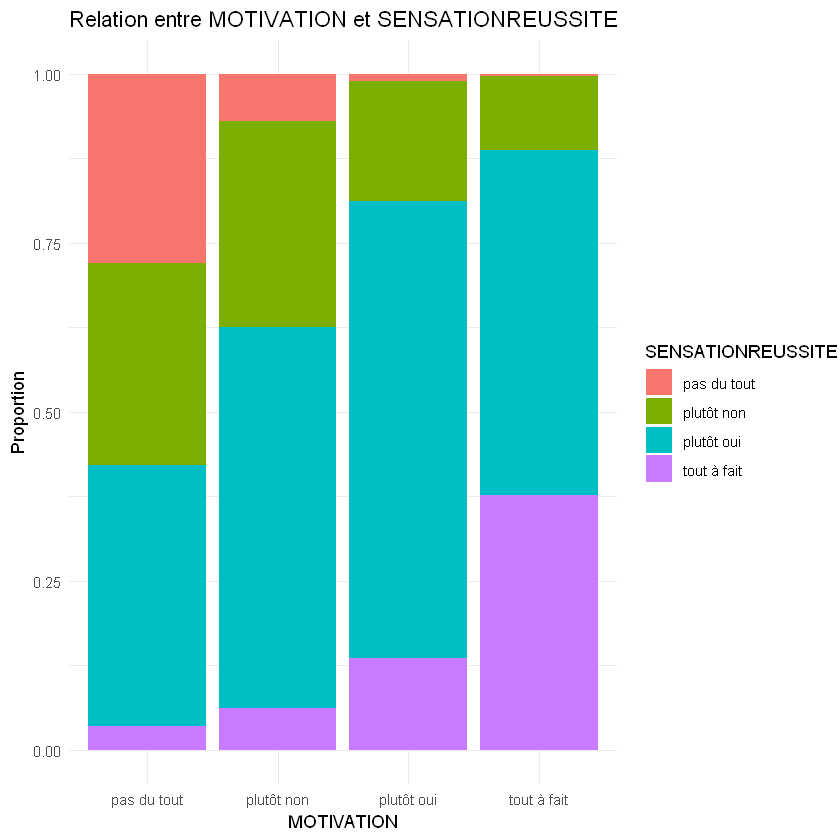

In [80]:
chi_square_test_and_plot(insa_cleaned_3, "MOTIVATION", "SENSATIONREUSSITE")


Nous pouvons voir que les étudiants ayant plus de motivation ont tendance à se sentir capables de réussir leurs études à l'INSA. Cela peut s'expliquer par le fait que, s'ils sont motivés, ils feront des efforts dans leurs études, ce qui peut leur permettre d'obtenir de bons résultats et de se sentir capables de réussir à l'INSA. À l'inverse, ceux qui ont une faible motivation ont tendance à se sentir moins capables de réussir leurs études à l'INSA.

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : STRESS et SENSATIONREUSSITE 

	Pearson's Chi-squared test

data:  table_var
X-squared = 180.71, df = 9, p-value < 2.2e-16



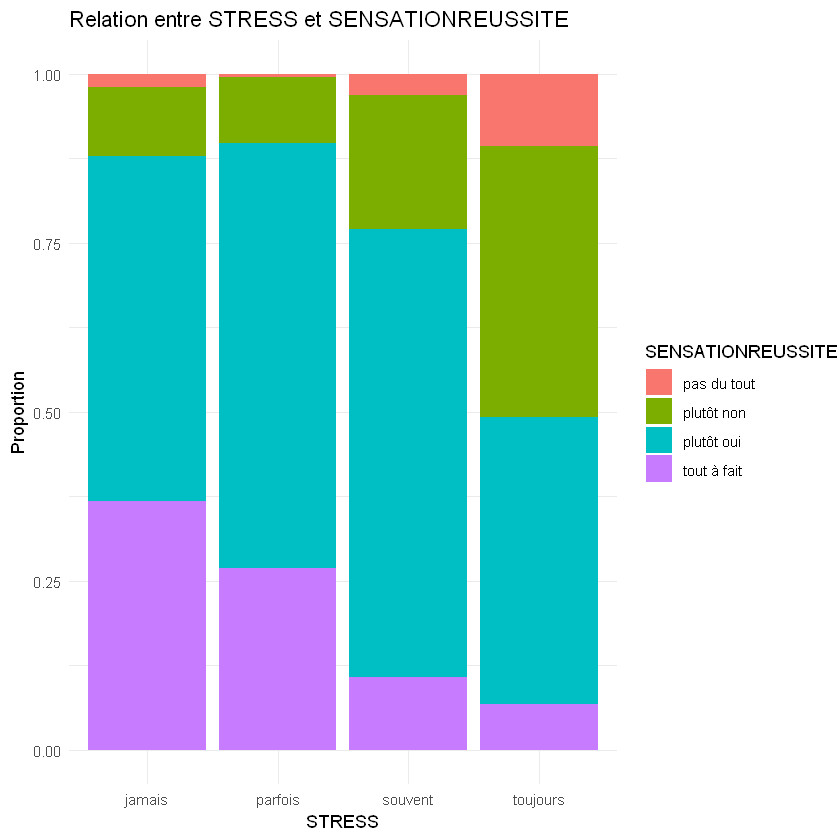

In [81]:
chi_square_test_and_plot(insa_cleaned_3, "STRESS", "SENSATIONREUSSITE")

Nous pouvons constater que le stress et le sentiment de pouvoir réussir les études à l’INSA sont inversement proportionnels. Ceux qui sont moins stressés ont tendance à se sentir plus capables de réussir leurs études à l’INSA, tandis que ceux qui sont fréquemment stressés ont un sentiment de réussite plus faible. Par conséquent, il est également nécessaire d'examiner quelles variables influencent le stress des étudiants afin de trouver des moyens de le réduire.

Résultat du test Chi-deux pour les variables : ADEQUATION et SENSATIONREUSSITE 

	Pearson's Chi-squared test

data:  table_var
X-squared = 125.7, df = 6, p-value < 2.2e-16



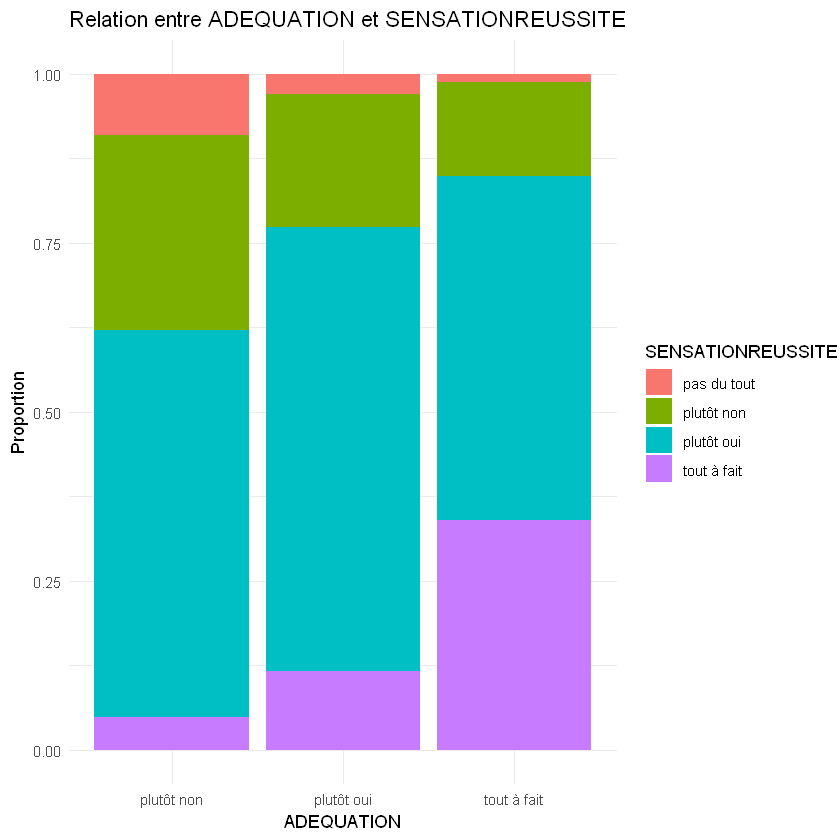

In [82]:
chi_square_test_and_plot(insa_cleaned_3, "ADEQUATION", "SENSATIONREUSSITE")

Résultat du test Chi-deux pour les variables : ISOLEMENT et SENSATIONREUSSITE 

	Pearson's Chi-squared test

data:  table_var
X-squared = 65.446, df = 6, p-value = 3.498e-12



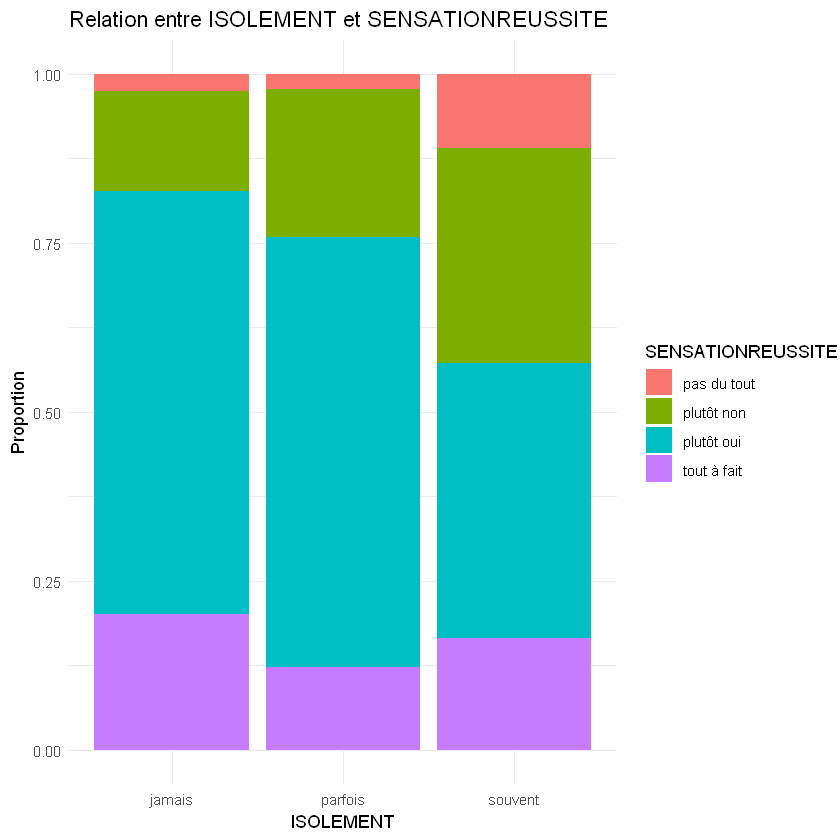

In [83]:
chi_square_test_and_plot(insa_cleaned_3, "ISOLEMENT", "SENSATIONREUSSITE")

Résultat du test Chi-deux pour les variables : ALIMENTATION et SENSATIONREUSSITE 

	Pearson's Chi-squared test

data:  table_var
X-squared = 57.748, df = 6, p-value = 1.289e-10



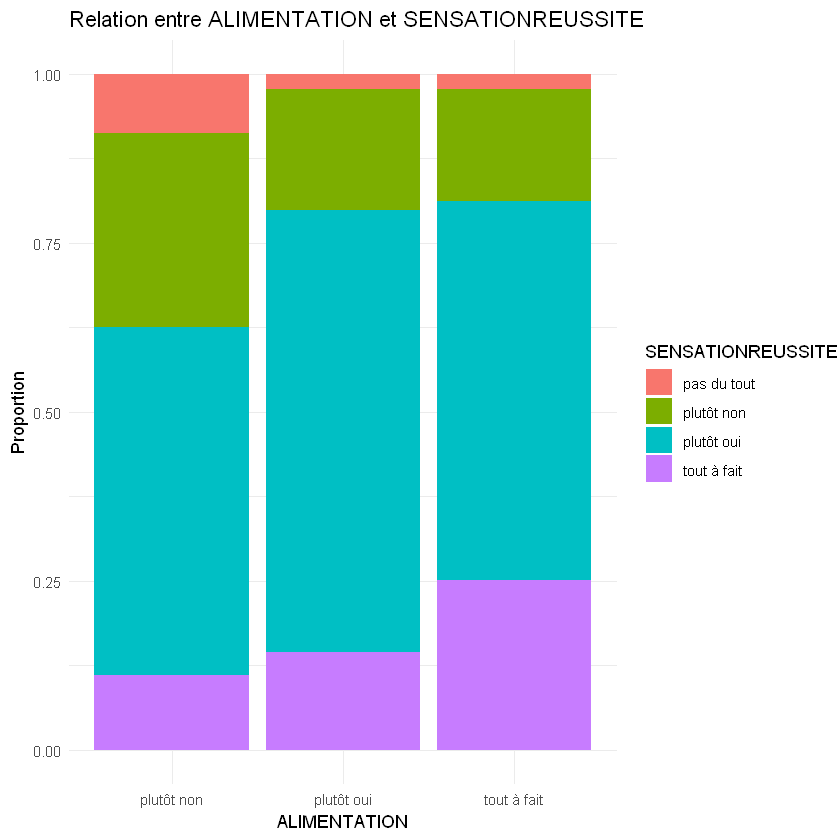

In [84]:
chi_square_test_and_plot(insa_cleaned_3, "ALIMENTATION", "SENSATIONREUSSITE")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : SPECIALITE_PO et SENSATIONREUSSITE 

	Pearson's Chi-squared test

data:  table_var
X-squared = 73.587, df = 39, p-value = 0.0006737



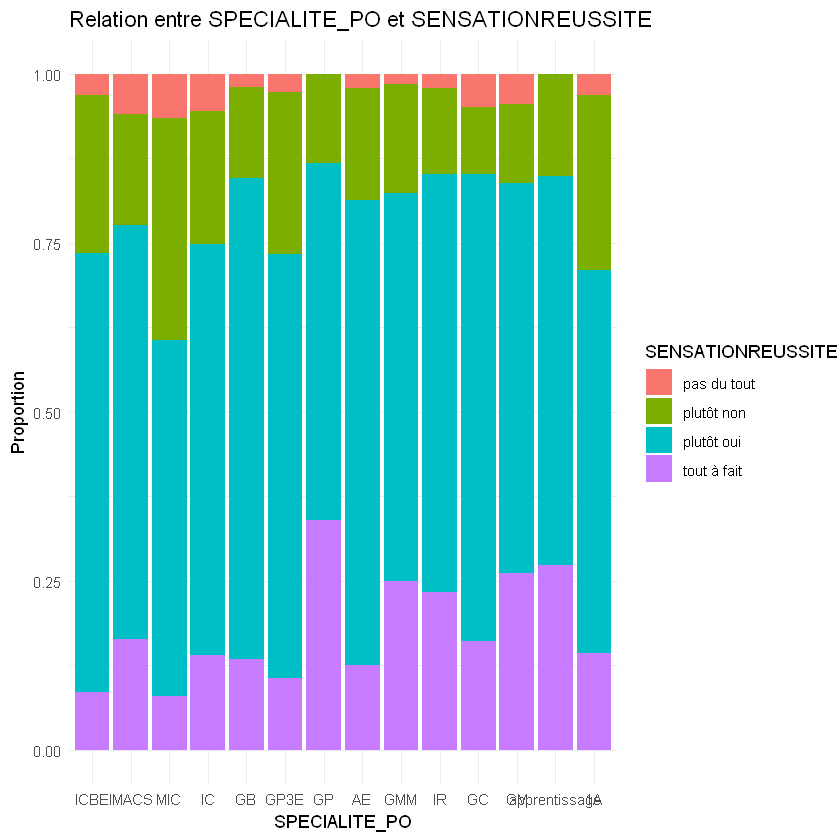

In [85]:
chi_square_test_and_plot(insa_cleaned_3, "SPECIALITE_PO", "SENSATIONREUSSITE")

Nous constatons que les étudiants de la filière MIC sont ceux qui ont le sentiment de réussite à l'INSA le plus faible (environ 40 % des étudiants ressentent plutôt non ou pas du tout). Cela peut s'expliquer par la charge de travail importante en deuxième et troisième années de MIC, qui comprend beaucoup de théories en mathématiques et en physique nécessitant des calculs complexes. Ensuite viennent les filières ICBE, GP3E et 1A. De plus, les groupes d'étudiants qui croient le plus en leur capacité à réussir leurs études à l'INSA sont ceux des filières GP, apprentissage et GC. 
Une observation particulière est que les étudiants de PO MIC se sentent les moins capables de réussir à l'INSA, alors que les étudiants de GMM et IR se sentent relativement confiants quant à leur réussite. Cela est logique, car après avoir surmonté les deux années difficiles de PO, ils se sentent plus assurés.

Nous constatons qu'il n'y a pas beaucoup de dépendance entre les deux variables ETUDEWE et SENSATIONREUSSITE.

**Nous constatons que l'analyse de la variable SENSATIONREUSSITE, qui est légèrement biaisée vers les sensations ou les perceptions subjectives des étudiants, dépend également de variables liées aux sentiments personnels, telles que MOTIVATION, STRESS, ADÉQUATION, ISOLEMENT et PRÉPMÉTIER.**

In [87]:
library(nnet)
library(MASS)

# Ajuster le modèle de régression logistique multinomiale complet avec toutes les variables explicatives
# Ici, on utilise SENSATIONREUSSITE comme variable cible et le dataframe insa_cleaned_3
modele_complet <- multinom(SENSATIONREUSSITE ~ ., data = insa_cleaned_3)

# Sélection du modèle avec stepAIC (méthode backward)
modele_selection <- stepAIC(modele_complet, direction = "both", trace = TRUE)

# Résumé du modèle sélectionné
summary(modele_selection)

# Extraire les coefficients et les variables importantes
coef(modele_selection)

# Évaluer les prédictions et la précision du modèle si nécessaire
predictions <- predict(modele_selection, newdata = insa_cleaned_3)
table(predictions, insa_cleaned_3$SENSATIONREUSSITE)

Warning message:
"package 'nnet' was built under R version 4.4.1"
Warning message:
"package 'MASS' was built under R version 4.4.1"

Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




# weights:  432 (321 variable)
initial  value 1612.260342 
iter  10 value 971.801100
iter  20 value 907.519106
iter  30 value 844.276333
iter  40 value 823.886206
iter  50 value 815.980053
iter  60 value 806.429632
iter  70 value 797.611771
iter  80 value 789.855065
iter  90 value 782.754536
iter 100 value 777.502615
final  value 777.502615 
stopped after 100 iterations
Start:  AIC=2191.01
SENSATIONREUSSITE ~ LOGEMENTTYPE + ACT_PRO + BOURSIER + HANDICAP + 
    TIERSTEMPS + STRESS + COMMENTAIRE + ETUDEWE + ETUDEGROUPE + 
    ETUDEDEHORS + REVISIONSDEB + CONCENTRATIONPERSO + CONDITIONSTRAVAIL + 
    RESSOURCES_SUP + AMIS + FAMILLE + ISOLEMENT + ASSOCIATIF + 
    SPORTTEMPS + SPECTACLES + SORTIEBAR + DETENTE + ECRANS + 
    SOMMEIL + ALIMENTATION + MOTIVATION + ADEQUATION + PREPMETIER + 
    PROMO + SPECIALITE_PO + COHORTE + DOUBLEDIPLOME + INTEGRATION + 
    BACTYPE + IMPLICATION_CM + IMPLICATION_TD + IMPLICATION_TP

# weights:  424 (315 variable)
initial  value 1612.260342 
iter  10 val

Call:
multinom(formula = SENSATIONREUSSITE ~ STRESS + COMMENTAIRE + 
    ETUDEGROUPE + ETUDEDEHORS + CONCENTRATIONPERSO + CONDITIONSTRAVAIL + 
    ISOLEMENT + MOTIVATION + ADEQUATION + PROMO, data = insa_cleaned_3)

Coefficients:
            (Intercept) STRESSparfois STRESSsouvent STRESStoujours
plutôt non    -1.990068     1.1250594   -0.01366693     -0.3841151
plutôt oui    -1.838401     1.3034099   -0.34209051     -1.6200350
tout à fait   -5.030971     0.6931556   -1.84365923     -3.0308594
            COMMENTAIREparfois COMMENTAIREsouvent ETUDEGROUPEparfois
plutôt non            1.679226           1.348725           1.553689
plutôt oui            1.507642           1.339427           1.369513
tout à fait           1.715335           1.737796           1.043577
            ETUDEGROUPEsouvent ETUDEDEHORSparfois ETUDEDEHORSsouvent
plutôt non            1.828387          -2.160670          -3.172614
plutôt oui            1.896481          -2.536402          -3.324620
tout à fait        

,(Intercept),STRESSparfois,STRESSsouvent,STRESStoujours,COMMENTAIREparfois,COMMENTAIREsouvent,ETUDEGROUPEparfois,ETUDEGROUPEsouvent,ETUDEDEHORSparfois,ETUDEDEHORSsouvent,⋯,ISOLEMENTsouvent,MOTIVATIONplutôt non,MOTIVATIONplutôt oui,MOTIVATIONtout à fait,ADEQUATIONplutôt oui,ADEQUATIONtout à fait,PROMO2A,PROMO3A,PROMO4A,PROMO5A
plutôt non,-1.990068,1.1250594,-0.01366693,-0.3841151,1.679226,1.348725,1.553689,1.828387,-2.160670,-3.172614,⋯,0.4389645,1.947456,3.119370,3.943257,0.1011477,-0.7547336,-0.6329185,0.7199207,0.1134425,11.48068
plutôt oui,-1.838401,1.3034099,-0.34209051,-1.6200350,1.507642,1.339427,1.369513,1.896481,-2.536402,-3.324620,⋯,-0.2893563,2.348444,4.309277,5.408827,0.0468674,-0.9768415,-0.3430455,1.3045648,1.1919663,12.27529
tout à fait,-5.030971,0.6931556,-1.84365923,-3.0308594,1.715335,1.737796,1.043577,1.485179,-2.678057,-3.706374,⋯,0.4773012,2.655395,4.997216,7.093859,0.4274948,0.3527037,-0.5245348,1.6138440,1.8795883,13.95892


             
predictions   pas du tout plutôt non plutôt oui tout à fait
  pas du tout          15          6          5           0
  plutôt non            9         47         36           4
  plutôt oui           16        168        621         121
  tout à fait           1          6         39          69

In [88]:
# Calculer l'importance des variables dans le modèle
var_importance <- varImp(modele_selection, scale = TRUE)

# Convertir les résultats en un dataframe pour faciliter la manipulation
importance_df <- as.data.frame(var_importance)

# Ajouter une colonne contenant les noms des variables
importance_df$Variable <- rownames(importance_df)

# Trier les variables par importance décroissante (de la plus importante à la moins importante)
importance_sorted <- importance_df[order(importance_df$Overall, decreasing = TRUE), ]

# Afficher le résultat trié avec les variables classées par importance
print(importance_sorted)

                                  Overall                       Variable
PROMO5A                        37.7148870                        PROMO5A
MOTIVATIONtout à fait          16.4459424          MOTIVATIONtout à fait
MOTIVATIONplutôt oui           12.4258636           MOTIVATIONplutôt oui
ETUDEDEHORSsouvent             10.2036076             ETUDEDEHORSsouvent
CONCENTRATIONPERSOtrès          8.1056421         CONCENTRATIONPERSOtrès
ETUDEDEHORSparfois              7.3751292             ETUDEDEHORSparfois
MOTIVATIONplutôt non            6.9512942           MOTIVATIONplutôt non
ETUDEDEHORStoujours             6.6450866            ETUDEDEHORStoujours
ETUDEGROUPEsouvent              5.2100467             ETUDEGROUPEsouvent
STRESStoujours                  5.0350095                 STRESStoujours
CONCENTRATIONPERSOplutôt oui    4.9852150   CONCENTRATIONPERSOplutôt oui
COMMENTAIREparfois              4.9022030             COMMENTAIREparfois
COMMENTAIREsouvent              4.4259483          

In [89]:
# Extraire les noms des variables de base (variables d'origine) du dataframe insa_cleaned_3
variable_roots <- colnames(insa_cleaned_3)

# Créer une nouvelle colonne dans importance_sorted pour stocker les noms des variables d'origine
importance_sorted$VariableRoot <- NA

# Associer les variables d'origine à chaque modalité (dummy)
for (root in variable_roots) {
  # Rechercher toutes les modalités (dummies) dont le nom commence par celui de la variable d'origine
  matched_indices <- grep(paste0("^", root), importance_sorted$Variable)
  
  # Assigner le nom de la variable d'origine aux modalités correspondantes
  importance_sorted$VariableRoot[matched_indices] <- root
}

# Calculer la moyenne de l'importance des modalités pour chaque variable d'origine
importance_by_root <- aggregate(Overall ~ VariableRoot, data = importance_sorted, FUN = mean)

# Trier les variables d'origine par ordre décroissant d'importance moyenne
importance_by_root_sorted <- importance_by_root[order(importance_by_root$Overall, decreasing = TRUE), ]

# Afficher le résultat trié, avec les variables classées par importance moyenne
print(importance_by_root_sorted)

         VariableRoot   Overall
8          MOTIVATION 11.941033
9               PROMO 11.509678
5         ETUDEDEHORS  8.074608
3  CONCENTRATIONPERSO  6.545429
2         COMMENTAIRE  4.664076
6         ETUDEGROUPE  4.588413
10             STRESS  3.452017
4   CONDITIONSTRAVAIL  2.896537
7           ISOLEMENT  2.581177
1          ADEQUATION  1.329894


### IV.2. Analyse pour les étudiants qui ne sont pas 1A ou nouveaux entrants (NE)

#### IV.2.1. Randomforest

In [91]:
# Filtrage des données pour exclure les étudiants de la 1A ou en intégration
group2 <- insa_cleaned_2 %>%
  filter(PROMO != "1A" & PROMO != "INTEGRATION")

group2 <- group2 %>%
  mutate( COHORTE = fct_collapse(COHORTE, "non-classic" = c("FAS", "SHN", "NORG-IBER-ENG-AS", "Arts_Etude","SupENR"))
  )

group2 <- droplevels(group2)


# Afficher les données filtrées
str(group2)

# Sauvegarder les données filtrées dans un fichier Excel
write_xlsx(group2, "group2.xlsx")

tibble [912 × 42] (S3: tbl_df/tbl/data.frame)
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ ACT_PRO           : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 3 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ ETUDEWE           : Factor w/ 6 levels "-1h","1-2h","2-4h",..: 3 3 4 5 4 2 2 6 4 4 ...
 $ ETUDEGROUPE       : Factor w/ 3 levels "jamais","parfois",..: 1 1 2 2 2 1 1 2 2 3 ...
 $ ETUDEDEHORS       : Factor w/ 4 levels "jamais","parfois",..: 3 2 2 2 3 3 2 2 1 3 ...
 $ REVISIONSDEB      : Factor w/ 5 levels "semestre","1 mois avant",..: 3 3 2 3

In [92]:
# Obtenir la liste des variables à partir des noms des colonnes de insa_clean
variables_to_plot <- names(group2)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(group2, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("group2.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

In [93]:
# Fixer le seed pour la reproductibilité
set.seed(151)

# Construire le modèle Random Forest en utilisant tout le jeu de données
rf_model_ne <- randomForest(RATTRAPAGES ~ ., data = group2, mtry = 16,ntree = 1000, importance = TRUE)


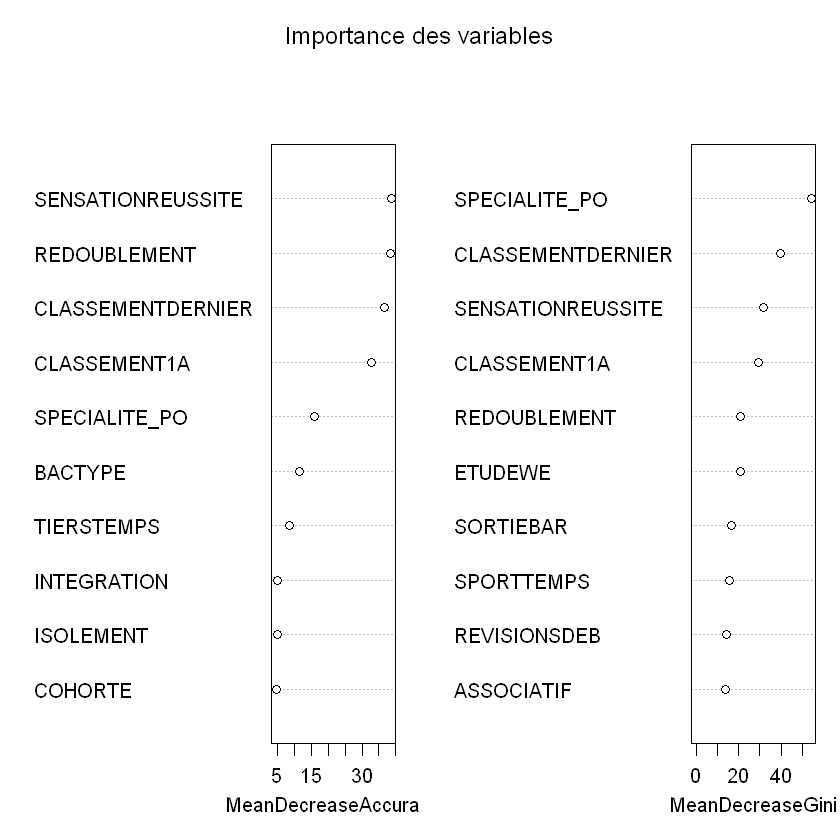

In [94]:
# Tracer l'importance des variables
varImpPlot(rf_model_ne, 
           sort = TRUE, 
           n.var = 10,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables")

Le graphique ci-dessus montre que les variables SENSATIONREUSSITE et RATTRAPAGES sont étroitement liées. Par conséquent, il est logique d'utiliser la variable SENSATIONREUSSITE pour étudier tous les étudiants lorsqu'il n'est pas possible d'utiliser la variable RATTRAPAGES.

De plus, nous constatons que les variables RATTRAPAGES, SENSATIONREUSSITE, REDOUBLEMENT, CLASSEMENT1A et CLASSEMENTDERNIER sont fortement corrélées, au point de pouvoir être considérées comme décrivant le même phénomène. Pour cette raison, je vais supprimer les variables SENSATIONREUSSITE, REDOUBLEMENT, CLASSEMENT1A et CLASSEMENTDERNIER avant d'analyser RATTRAPAGES, afin de pouvoir identifier d'autres variables qui influencent la réussite des étudiants.

In [110]:
# Test du chi carré entre RATTRAPAGES et SENSATIONREUSSITE
chi_sq_sensation <- chisq.test(table(group2$RATTRAPAGES, group2$SENSATIONREUSSITE))
print(chi_sq_sensation)

# Test du chi carré entre RATTRAPAGES et REDOUBLEMENT
chi_sq_redoublement <- chisq.test(table(group2$RATTRAPAGES, group2$REDOUBLEMENT))
print(chi_sq_redoublement)

# Test du chi carré entre RATTRAPAGES et CLASSEMENT1A
chi_sq_classement1a <- chisq.test(table(group2$RATTRAPAGES, group2$CLASSEMENT1A))
print(chi_sq_classement1a)

# Test du chi carré entre RATTRAPAGES et CLASSEMENTDERNIER
chi_sq_classementdernier <- chisq.test(table(group2$RATTRAPAGES, group2$CLASSEMENTDERNIER))
print(chi_sq_classementdernier)

Warning message in chisq.test(table(group2$RATTRAPAGES, group2$SENSATIONREUSSITE)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$RATTRAPAGES, group2$SENSATIONREUSSITE)
X-squared = 203.55, df = 9, p-value < 2.2e-16



Warning message in chisq.test(table(group2$RATTRAPAGES, group2$REDOUBLEMENT)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$RATTRAPAGES, group2$REDOUBLEMENT)
X-squared = 132.73, df = 3, p-value < 2.2e-16



Warning message in chisq.test(table(group2$RATTRAPAGES, group2$CLASSEMENT1A)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$RATTRAPAGES, group2$CLASSEMENT1A)
X-squared = 179.13, df = 21, p-value < 2.2e-16



Warning message in chisq.test(table(group2$RATTRAPAGES, group2$CLASSEMENTDERNIER)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(group2$RATTRAPAGES, group2$CLASSEMENTDERNIER)
X-squared = 204.33, df = 15, p-value < 2.2e-16



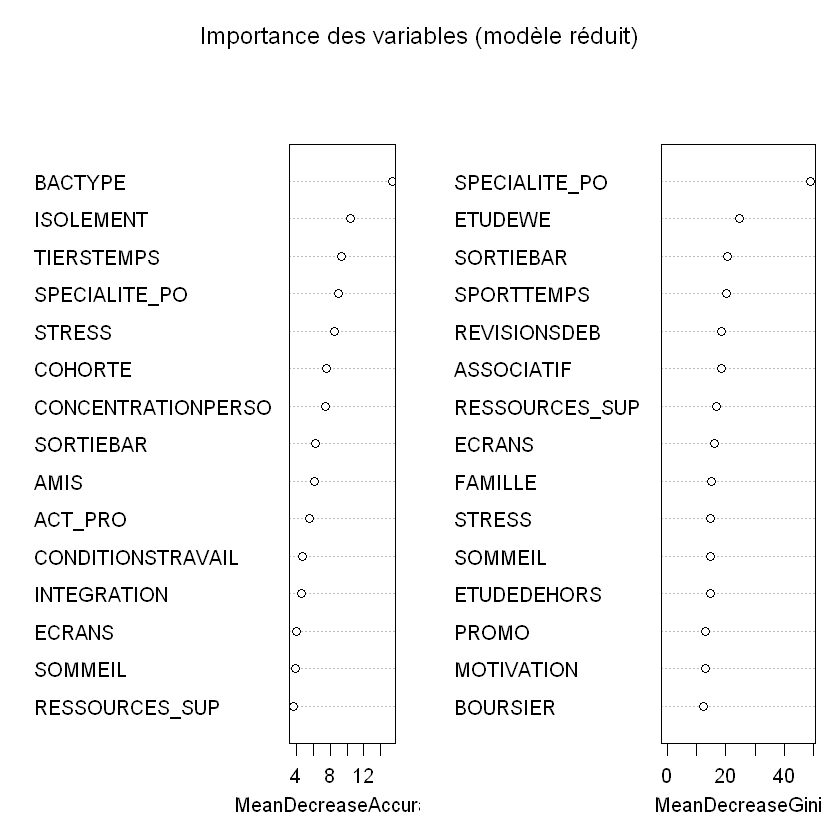

In [95]:
# Suppression des variables ayant une influence trop forte
group2_reduced <- group2 %>%
  dplyr::select(-SENSATIONREUSSITE, -REDOUBLEMENT, -CLASSEMENT1A, -CLASSEMENTDERNIER)

# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_ne_reduced <- randomForest(RATTRAPAGES ~ ., data = group2_reduced, mtry = 6,ntree = 1000, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_ne_reduced)

# Tracer l'importance des variables
varImpPlot(rf_model_ne_reduced, 
           sort = TRUE, 
           n.var = 15,  # Affiche les 15 variables les plus importantes
           main = "Importance des variables (modèle réduit)")

In [ ]:
# Ici, on utilise RATTRAPAGES comme variable cible et le dataframe group2_reduced
modele_complet <- multinom(RATTRAPAGES ~ ., data = group2_reduced)

# Sélection du modèle avec stepAIC (méthode backward)
modele_selection <- stepAIC(modele_complet, direction = "both", trace = TRUE)

# Résumé du modèle sélectionné
summary(modele_selection)

# Extraire les coefficients et les variables importantes
coef(modele_selection)

# Évaluer les prédictions et la précision du modèle si nécessaire
predictions <- predict(modele_selection, newdata = group2_reduced)
table(predictions, group2_reduced$RATTRAPAGES)

# weights:  408 (303 variable)
initial  value 1264.300457 
iter  10 value 684.082629
iter  20 value 636.707060
iter  30 value 622.476435
iter  40 value 612.269931
iter  50 value 605.677722
iter  60 value 602.169585
iter  70 value 601.058527
iter  80 value 600.303313
iter  90 value 600.021411
iter 100 value 599.867001
final  value 599.867001 
stopped after 100 iterations
Start:  AIC=1805.73
RATTRAPAGES ~ LOGEMENTTYPE + ACT_PRO + BOURSIER + HANDICAP + 
    TIERSTEMPS + STRESS + COMMENTAIRE + ETUDEWE + ETUDEGROUPE + 
    ETUDEDEHORS + REVISIONSDEB + CONCENTRATIONPERSO + CONDITIONSTRAVAIL + 
    RESSOURCES_SUP + AMIS + FAMILLE + ISOLEMENT + ASSOCIATIF + 
    SPORTTEMPS + SPECTACLES + SORTIEBAR + DETENTE + ECRANS + 
    SOMMEIL + ALIMENTATION + MOTIVATION + ADEQUATION + PREPMETIER + 
    PROMO + SPECIALITE_PO + COHORTE + DOUBLEDIPLOME + INTEGRATION + 
    BACTYPE + IMPLICATION_CM + IMPLICATION_TD + IMPLICATION_TP

# weights:  400 (297 variable)
initial  value 1264.300457 
iter  10 value 683

In [123]:
# Calculer l'importance des variables dans le modèle
var_importance <- varImp(modele_selection, scale = TRUE)

# Convertir les résultats en un dataframe pour faciliter la manipulation
importance_df <- as.data.frame(var_importance)

# Ajouter une colonne contenant les noms des variables
importance_df$Variable <- rownames(importance_df)

# Trier les variables par importance décroissante (de la plus importante à la moins importante)
importance_sorted <- importance_df[order(importance_df$Overall, decreasing = TRUE), ]

# Afficher le résultat trié avec les variables classées par importance
print(importance_sorted)

                                  Overall                       Variable
PROMO5A                        1209.00068                        PROMO5A
CONCENTRATIONPERSOtrès          679.50801         CONCENTRATIONPERSOtrès
ETUDEWE+8h                      632.19612                     ETUDEWE+8h
ACT_PROoui +5                   508.05112                  ACT_PROoui +5
BACTYPEFr_etranger              414.77755             BACTYPEFr_etranger
HANDICAPoui                     382.28567                    HANDICAPoui
ETUDEGROUPEsouvent              328.24095             ETUDEGROUPEsouvent
IMPLICATION_TDToujours          305.29671         IMPLICATION_TDToujours
ETUDEDEHORSparfois              303.90901             ETUDEDEHORSparfois
ADEQUATIONplutôt oui            279.67283           ADEQUATIONplutôt oui
STRESStoujours                  259.96503                 STRESStoujours
INTEGRATION3A-4A                258.82552               INTEGRATION3A-4A
AMIStrès souvent                250.61590          

In [124]:
# Extraire les noms des variables de base (variables d'origine) du dataframe group2_reduced
variable_roots <- colnames(group2_reduced)

# Créer une nouvelle colonne dans importance_sorted pour stocker les noms des variables d'origine
importance_sorted$VariableRoot <- NA

# Associer les variables d'origine à chaque modalité (dummy)
for (root in variable_roots) {
  # Rechercher toutes les modalités (dummies) dont le nom commence par celui de la variable d'origine
  matched_indices <- grep(paste0("^", root), importance_sorted$Variable)
  
  # Assigner le nom de la variable d'origine aux modalités correspondantes
  importance_sorted$VariableRoot[matched_indices] <- root
}

# Calculer la moyenne de l'importance des modalités pour chaque variable d'origine
importance_by_root <- aggregate(Overall ~ VariableRoot, data = importance_sorted, FUN = mean)

# Trier les variables d'origine par ordre décroissant d'importance moyenne
importance_by_root_sorted <- importance_by_root[order(importance_by_root$Overall, decreasing = TRUE), ]

# Afficher le résultat trié, avec les variables classées par importance moyenne
print(importance_by_root_sorted)

         VariableRoot   Overall
19              PROMO 547.93915
8  CONCENTRATIONPERSO 397.56646
14           HANDICAP 382.28567
1             ACT_PRO 282.15946
12        ETUDEGROUPE 270.72898
6             BACTYPE 261.42684
11        ETUDEDEHORS 241.18890
16     IMPLICATION_TD 219.90582
2          ADEQUATION 219.26749
4                AMIS 206.59708
15     IMPLICATION_CM 198.27131
17        INTEGRATION 197.22214
18          ISOLEMENT 194.03309
13            ETUDEWE 189.83056
3        ALIMENTATION 128.74411
20             STRESS 123.04705
5          ASSOCIATIF  95.96077
9   CONDITIONSTRAVAIL  46.73539
10             ECRANS  42.59400
7             COHORTE  14.37251


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : BACTYPE et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 39.215, df = 6, p-value = 6.495e-07



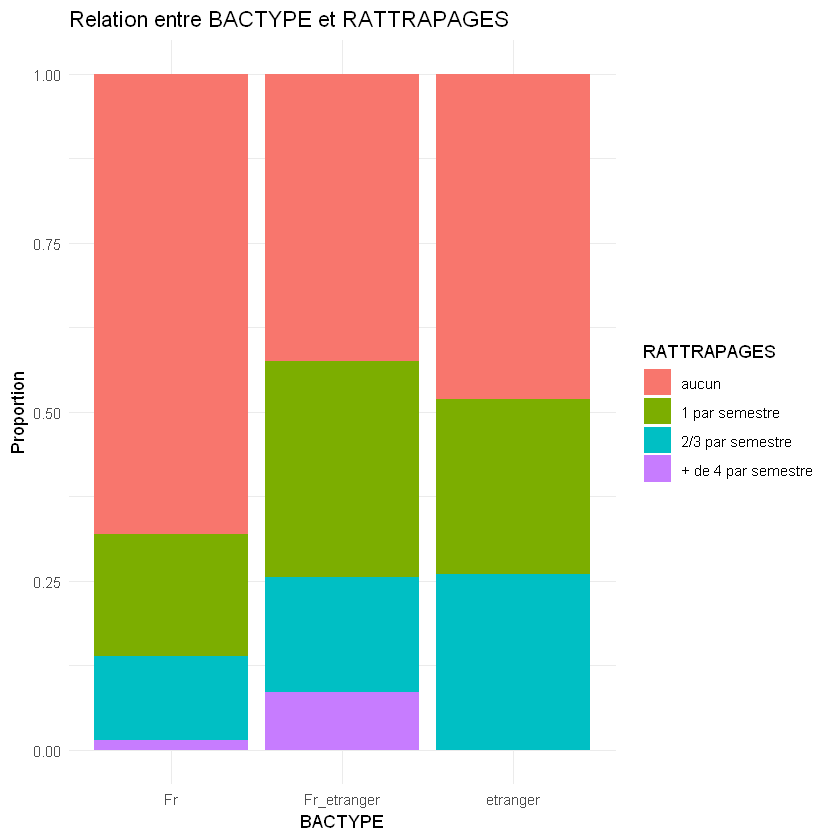

In [102]:
chi_square_test_and_plot(group2_reduced, "BACTYPE", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : TIERSTEMPS et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 8.4878, df = 3, p-value = 0.03694



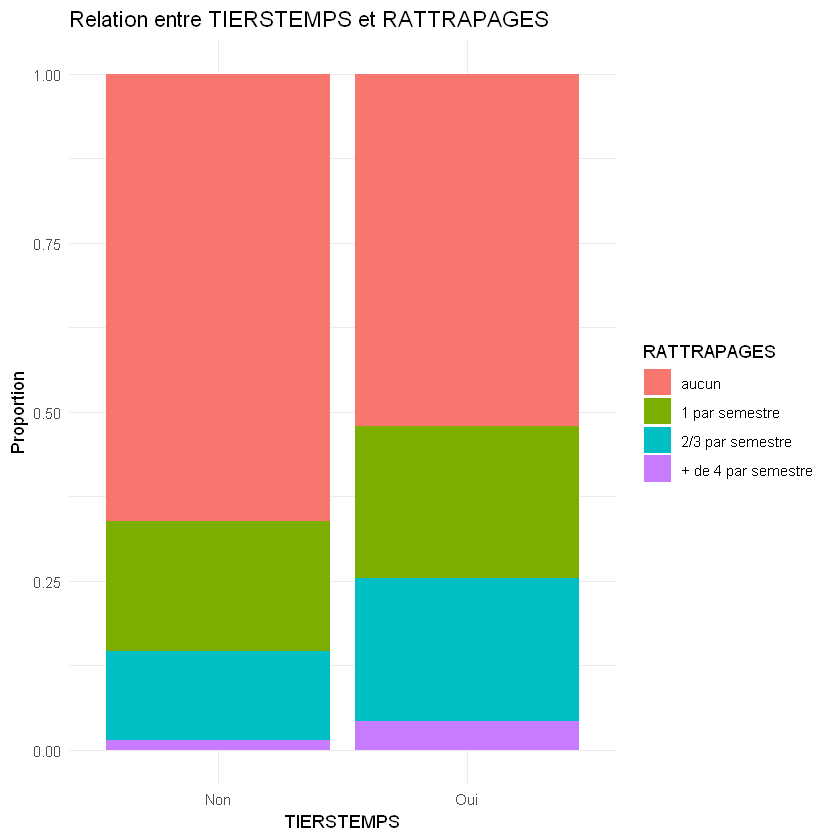

In [103]:
chi_square_test_and_plot(group2_reduced, "TIERSTEMPS", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : SPECIALITE_PO et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 90.545, df = 36, p-value = 1.357e-06



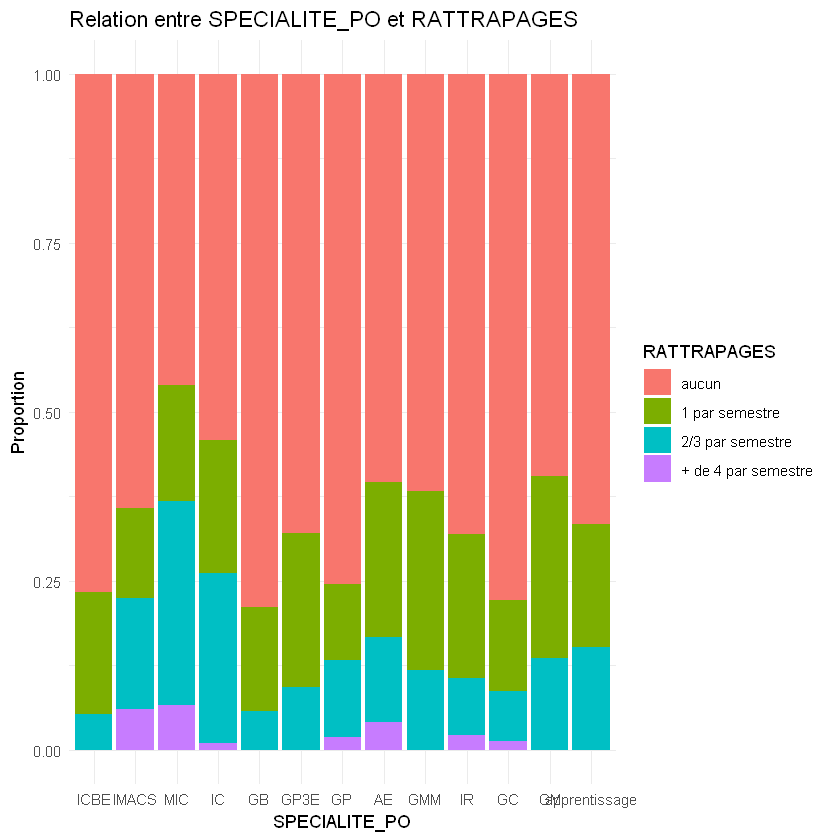

In [104]:
chi_square_test_and_plot(group2_reduced, "SPECIALITE_PO", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : ISOLEMENT et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 30.007, df = 6, p-value = 3.919e-05



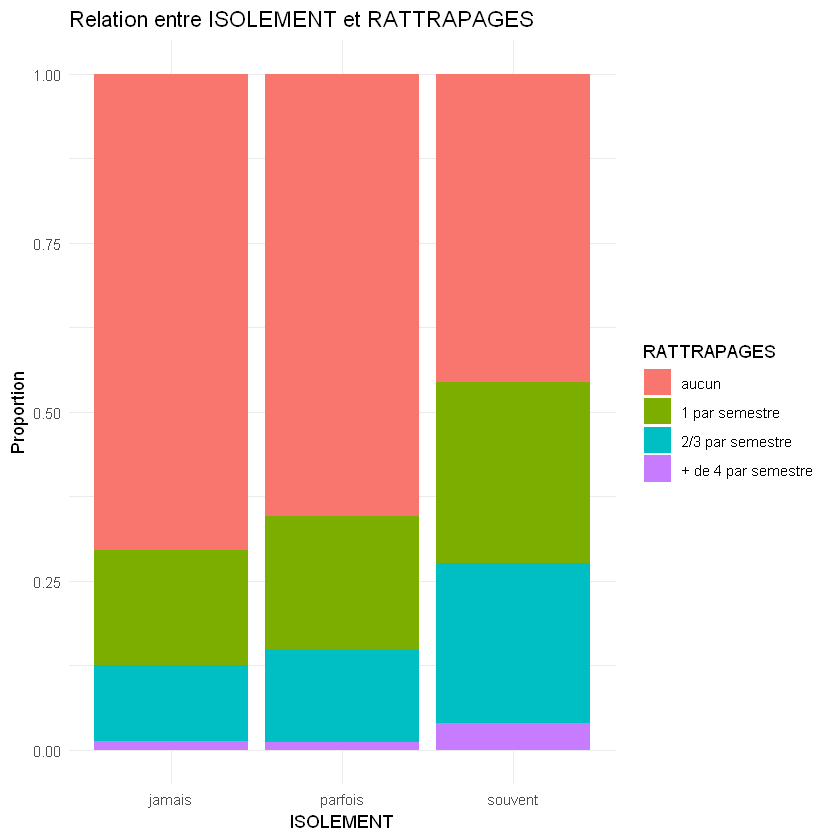

In [105]:
chi_square_test_and_plot(group2_reduced, "ISOLEMENT", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : STRESS et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 27.712, df = 9, p-value = 0.001065



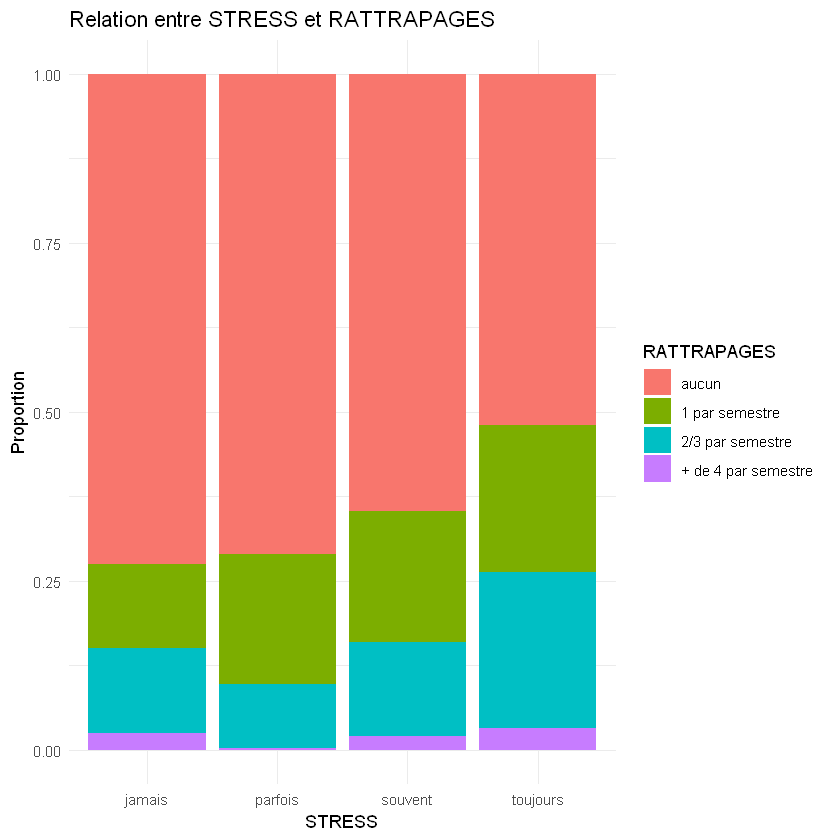

In [106]:
chi_square_test_and_plot(group2_reduced, "STRESS", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : CONCENTRATIONPERSO et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 24.67, df = 6, p-value = 0.000393



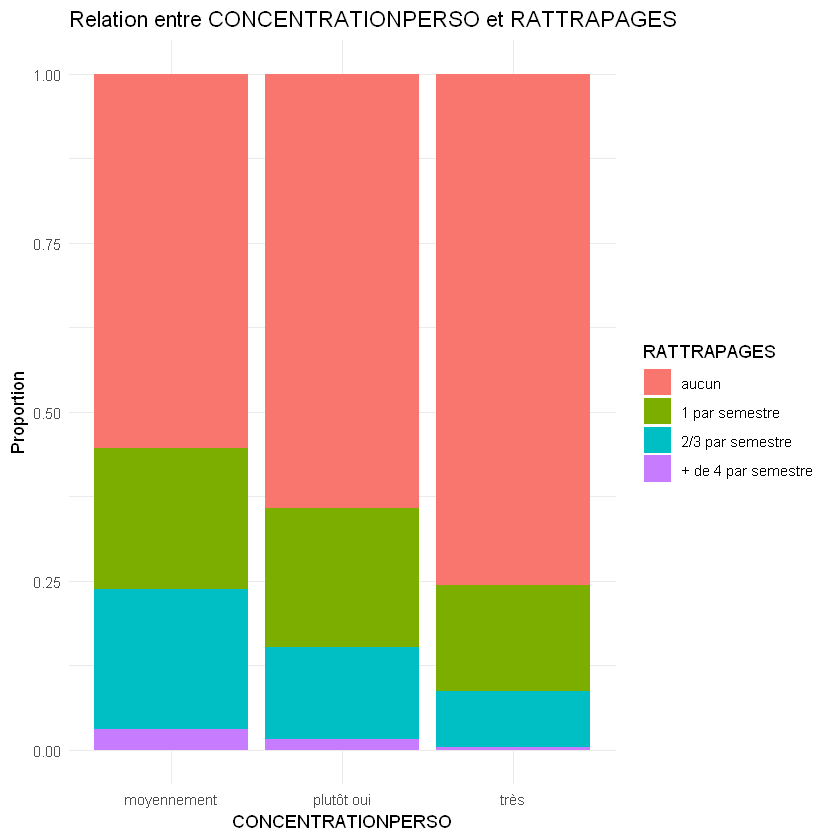

In [110]:
chi_square_test_and_plot(group2_reduced, "CONCENTRATIONPERSO", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : INTEGRATION et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 15.298, df = 6, p-value = 0.01806



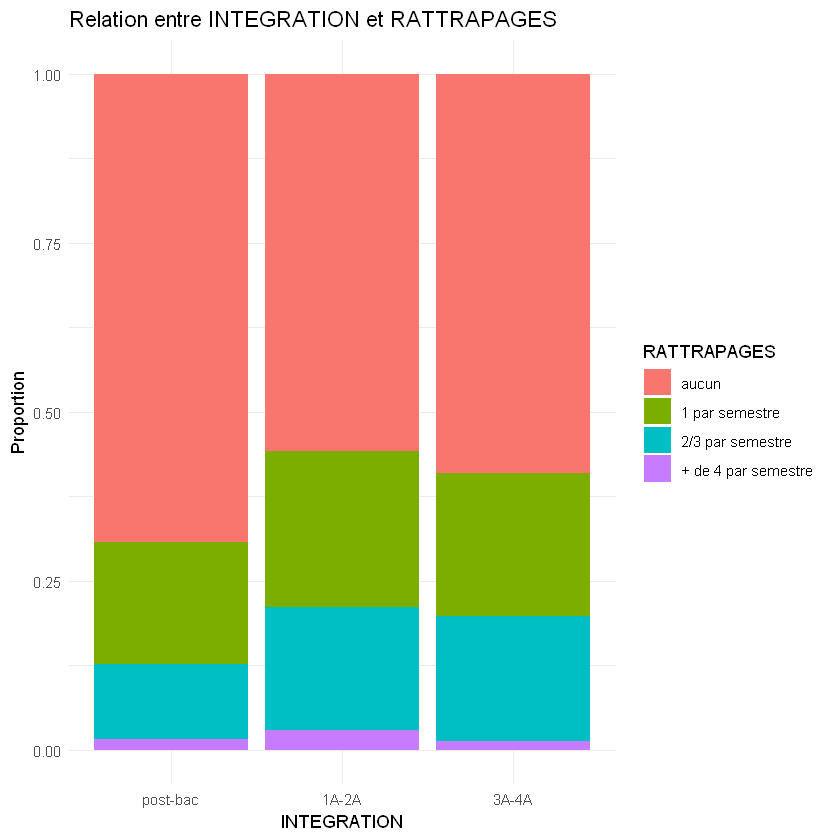

In [111]:
chi_square_test_and_plot(group2_reduced, "INTEGRATION", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : AMIS et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 29.006, df = 6, p-value = 6.068e-05



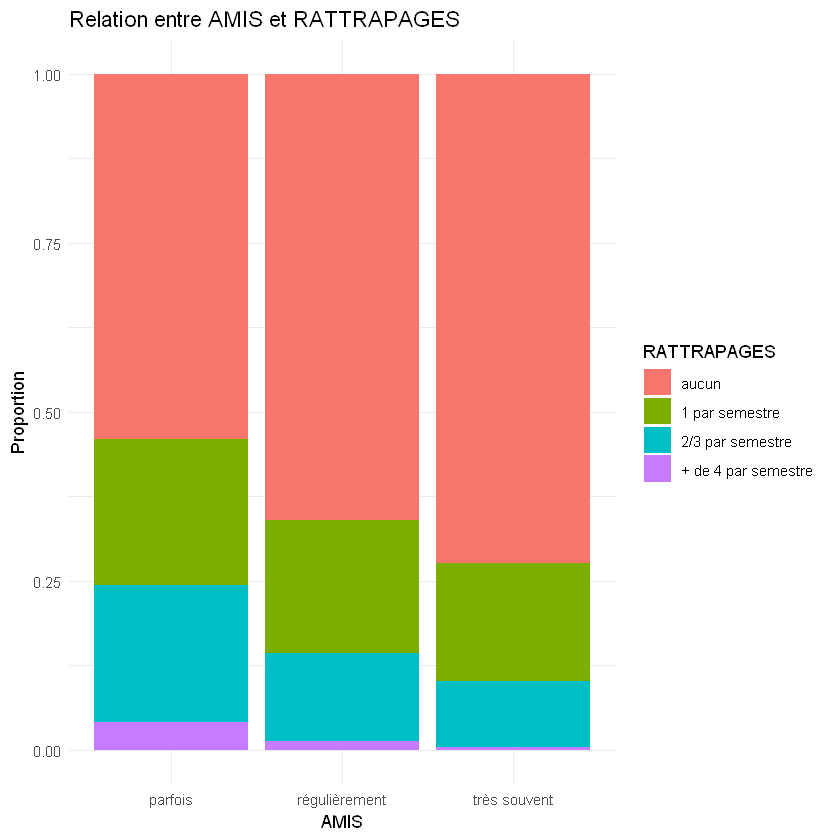

In [112]:
chi_square_test_and_plot(group2_reduced, "AMIS", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : RESSOURCES_SUP et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 18.571, df = 9, p-value = 0.02909



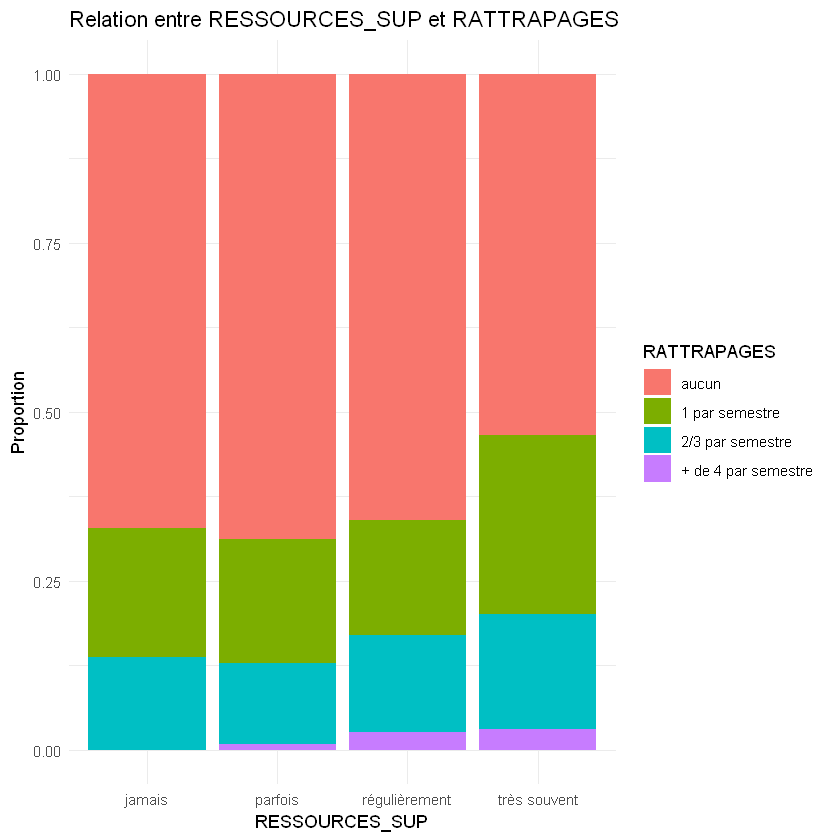

In [113]:
chi_square_test_and_plot(group2_reduced, "RESSOURCES_SUP", "RATTRAPAGES")

**Nous constatons que les étudiants ayant un taux plus élevé de rattrapages sont ceux qui : 
 +Sont étudiants étrangers, 
 +Bénéficient d'un tiers-temps (étudiants en situation de handicap ou ceux qui ne maîtrisent pas encore parfaitement le français), 
 +Appartiennent à la cohorte FAS (cursus adapté aux étudiants titulaires d'un BAC STI2D), 
 +Ressentent fréquemment un isolement, 
 +Sont inscrits en PO MIC ou IC ou en spécialité AE, GMM, GM, 
 +Ceux qui ne vont jamais ou rarement au bar (variable corrélée à l'isolement), 
 +Ceux ayant une faible concentration lorsqu'ils travaillent individuellement.**

In [148]:
# Étape 1 : Supprimer les observations où 'CLASSEMENTDERNIER' est égal à 'jsp'
group2_cleaned <- group2[group2$CLASSEMENTDERNIER != "jsp", ]

# Étape 2 : Convertir les valeurs de 'CLASSEMENTDERNIER' en scores
classement_mapping <- c('0-10%' = 5, '10-25%' = 4, '25-50%' = 3, '50-75%' = 2, '75-100%' = 1)
group2_cleaned$CLASSEMENTDERNIER_SCORE <- classement_mapping[group2_cleaned$CLASSEMENTDERNIER]

# Étape 3 : Convertir les valeurs de 'REDOUBLEMENT' en scores
redoublement_mapping <- c('Non' = 3, 'Oui' = 1)
group2_cleaned$REDOUBLEMENT_SCORE <- redoublement_mapping[group2_cleaned$REDOUBLEMENT]

# Étape 4 : Convertir les valeurs de 'RATTRAPAGES' en scores
rattrapages_mapping <- c('aucun' = 4, '1 par semestre' = 3, '2/3 par semestre' = 2, '+ de 4 par semestre' = 1)
group2_cleaned$RATTRAPAGES_SCORE <- rattrapages_mapping[group2_cleaned$RATTRAPAGES]

# Étape 5 : Convertir les valeurs de 'SENSATIONREUSSITE' en scores
sensation_mapping <- c('tout à fait' = 4, 'plutôt oui' = 3, 'plutôt non' = 2, 'pas du tout' = 1)
group2_cleaned$SENSATIONREUSSITE_SCORE <- sensation_mapping[group2_cleaned$SENSATIONREUSSITE]

# Étape 6 : Créer la variable 'RESULTAT' en additionnant tous les scores
group2_cleaned$RESULTAT <- group2_cleaned$CLASSEMENTDERNIER_SCORE + 
                           group2_cleaned$REDOUBLEMENT_SCORE + 
                           group2_cleaned$RATTRAPAGES_SCORE + 
                           group2_cleaned$SENSATIONREUSSITE_SCORE

# Afficher le résultat final
str(group2_cleaned)


tibble [734 × 45] (S3: tbl_df/tbl/data.frame)
 $ LOGEMENTTYPE           : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 1 1 1 1 2 ...
 $ ACT_PRO                : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 3 1 1 1 2 ...
 $ BOURSIER               : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 2 1 3 1 ...
 $ HANDICAP               : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 2 1 1 ...
 $ TIERSTEMPS             : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 2 1 1 ...
 $ STRESS                 : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 3 3 3 3 3 ...
 $ COMMENTAIRE            : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 3 2 2 ...
 $ ETUDEWE                : Factor w/ 6 levels "-1h","1-2h","2-4h",..: 3 3 4 5 4 6 4 4 3 3 ...
 $ ETUDEGROUPE            : Factor w/ 3 levels "jamais","parfois",..: 1 1 2 2 2 2 2 3 3 3 ...
 $ ETUDEDEHORS            : Factor w/ 4 levels "jamais","parfois",..: 3 2 2 2 3 2 1 3 3 4 ...
 $ REVISIONSDEB           : F

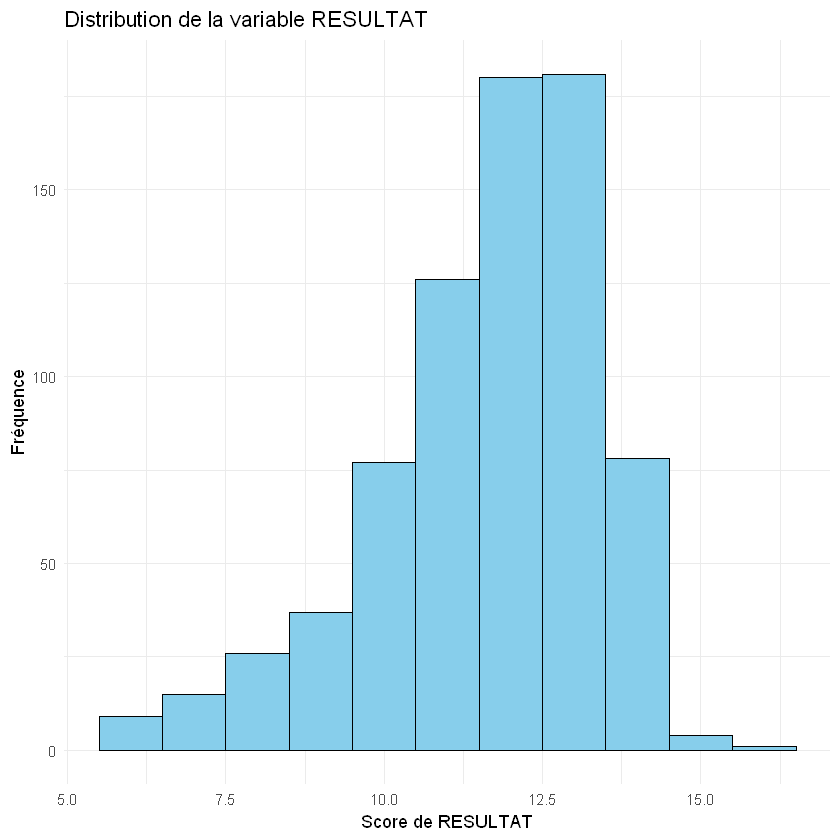

In [149]:
# Créer un graphique de distribution pour la variable RESULTAT
ggplot(group2_cleaned, aes(x = RESULTAT)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution de la variable RESULTAT",
       x = "Score de RESULTAT",
       y = "Fréquence") +
  theme_minimal()

In [150]:
# Supprimer les colonnes utilisées pour créer RESULTAT
group2_cleaned <- group2_cleaned %>%
  select(-CLASSEMENTDERNIER_SCORE, -REDOUBLEMENT_SCORE, -RATTRAPAGES_SCORE, -SENSATIONREUSSITE_SCORE,-CLASSEMENTDERNIER, -REDOUBLEMENT, -RATTRAPAGES, -SENSATIONREUSSITE,-CLASSEMENT1A)

In [151]:
str(group2_cleaned)

tibble [734 × 36] (S3: tbl_df/tbl/data.frame)
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 1 1 1 1 2 ...
 $ ACT_PRO           : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 3 1 1 1 2 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 2 1 3 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 2 1 1 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 2 1 1 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 3 3 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 3 2 2 ...
 $ ETUDEWE           : Factor w/ 6 levels "-1h","1-2h","2-4h",..: 3 3 4 5 4 6 4 4 3 3 ...
 $ ETUDEGROUPE       : Factor w/ 3 levels "jamais","parfois",..: 1 1 2 2 2 2 2 3 3 3 ...
 $ ETUDEDEHORS       : Factor w/ 4 levels "jamais","parfois",..: 3 2 2 2 3 2 1 3 3 4 ...
 $ REVISIONSDEB      : Factor w/ 5 levels "semestre","1 mois avant",..: 3 3 2 3

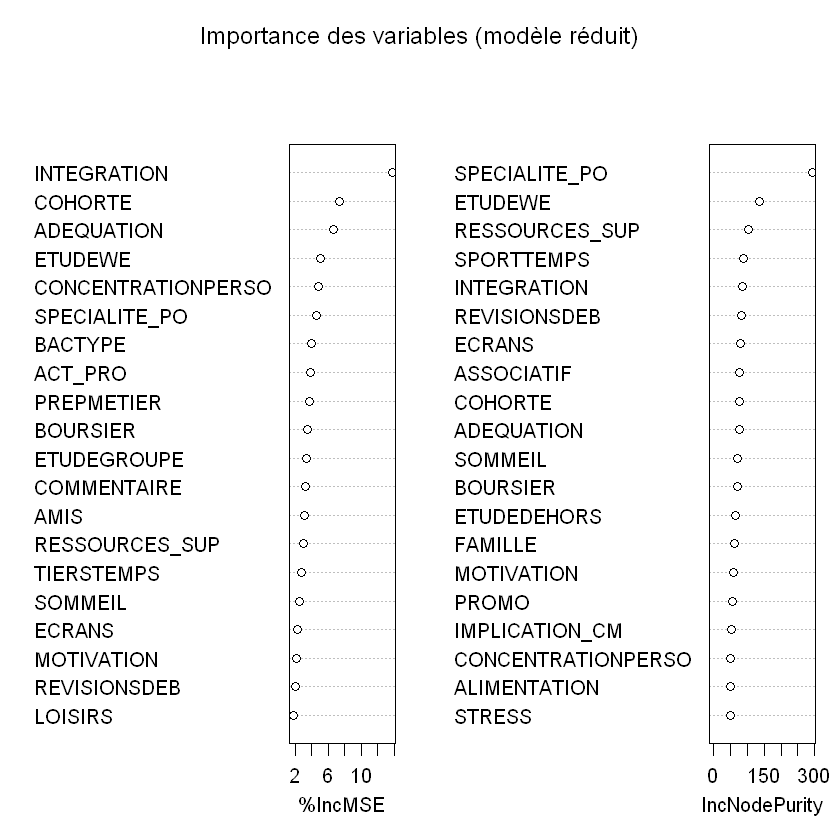

In [152]:
# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_ne_redoublement <- randomForest(RESULTAT ~ ., data = group2_cleaned, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_ne_redoublement)

# Tracer l'importance des variables
varImpPlot(rf_model_ne_redoublement, 
           sort = TRUE, 
           n.var = 20,  # Affiche les 20 variables les plus importantes
           main = "Importance des variables (modèle réduit)")

In [153]:
# Définir la fonction pour créer un boxplot en utilisant l'évaluation ordonnée (tidy evaluation)
plot_boxplot_relation <- function(data, qualitative_var, quantitative_var) {
  
  # Utiliser rlang::sym pour capturer les noms des colonnes
  qualitative_var_sym <- rlang::sym(qualitative_var)
  quantitative_var_sym <- rlang::sym(quantitative_var)
  
  # Créer le boxplot avec ggplot2
  ggplot(data, aes(x = !!qualitative_var_sym, y = !!quantitative_var_sym)) +
    geom_boxplot(fill = "steelblue") +
    labs(title = paste("Relation entre", qualitative_var, "et", quantitative_var),
         x = qualitative_var,
         y = quantitative_var) +
    theme_minimal()
}

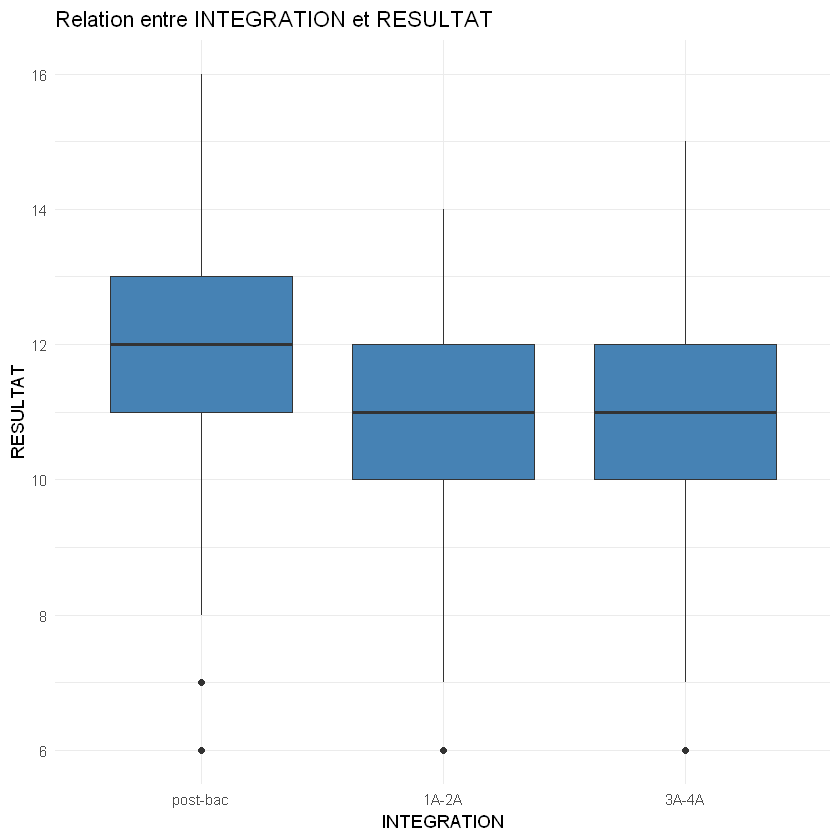

In [154]:
plot_boxplot_relation(group2_cleaned, "INTEGRATION", "RESULTAT")

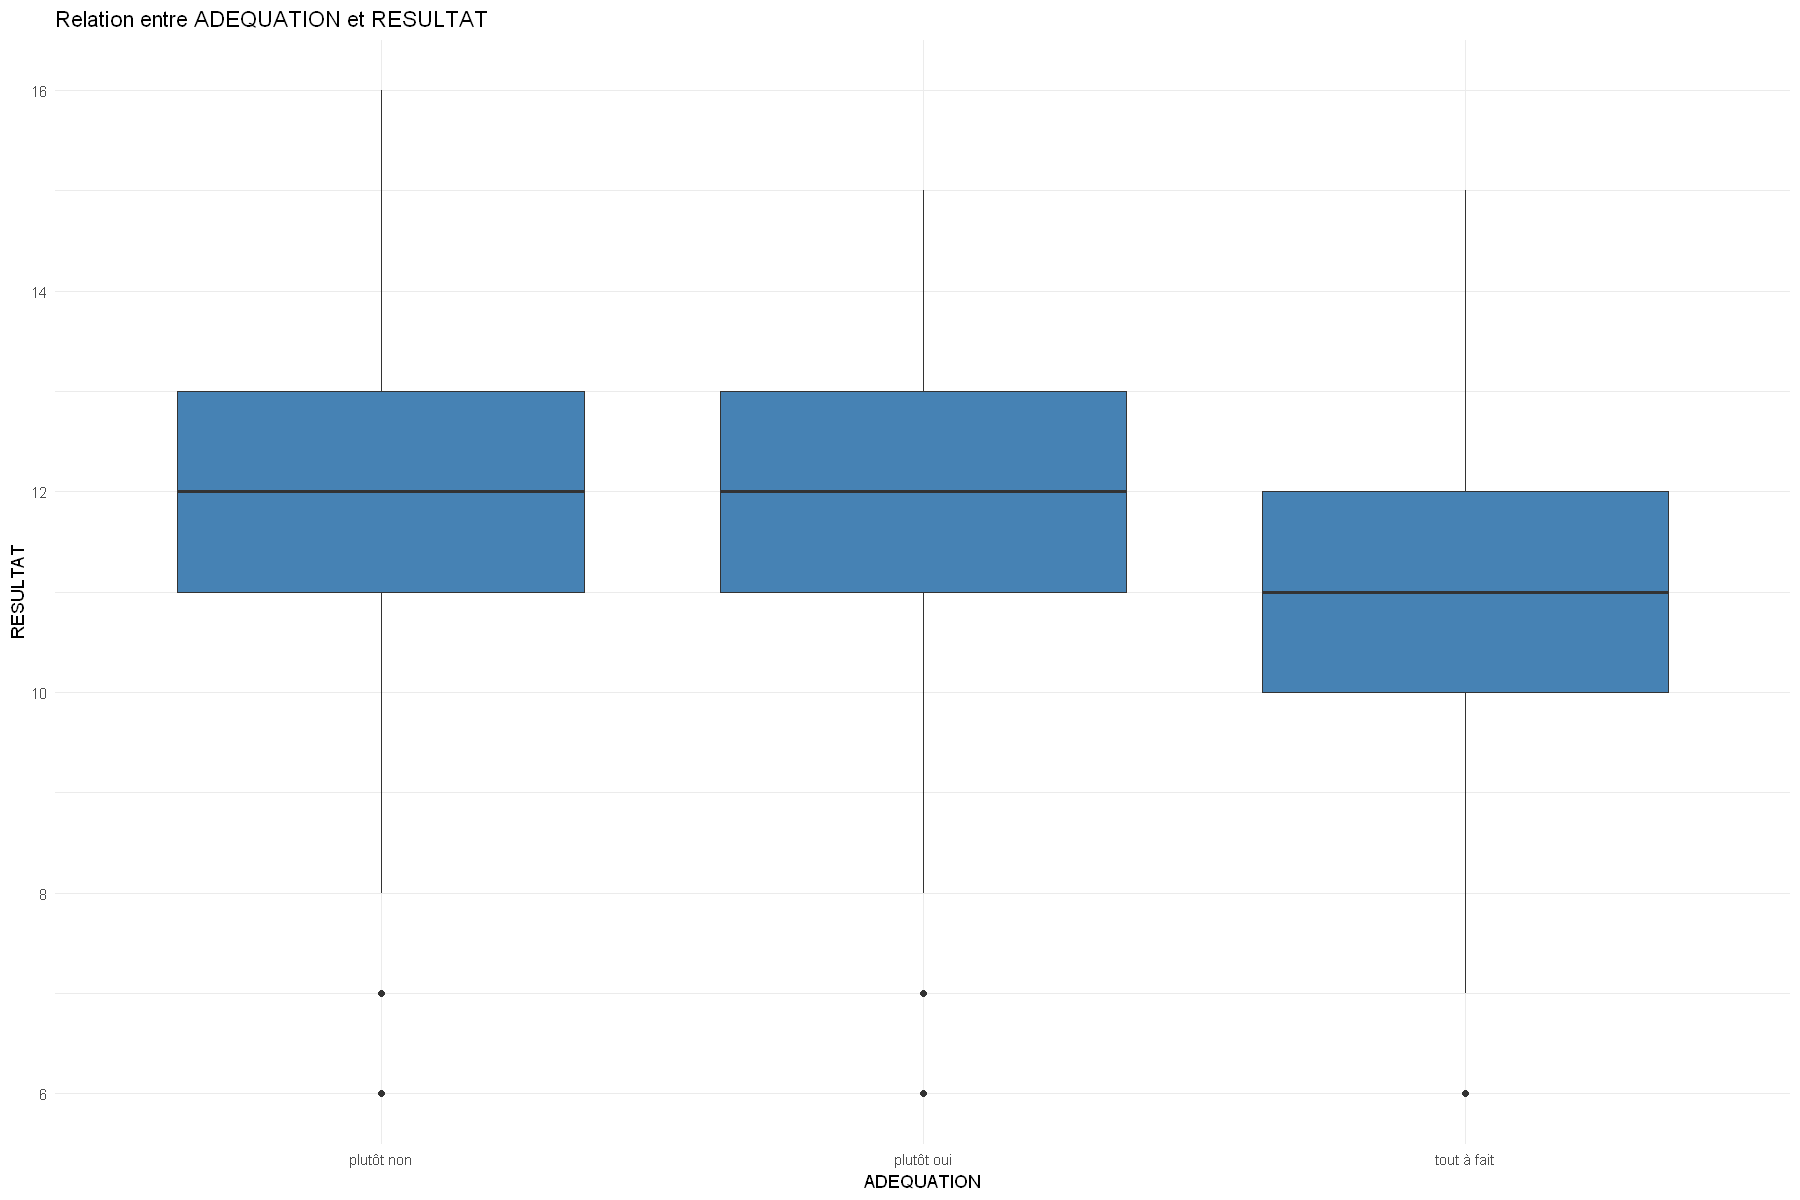

In [184]:
plot_boxplot_relation(group2_cleaned, "ADEQUATION", "RESULTAT")

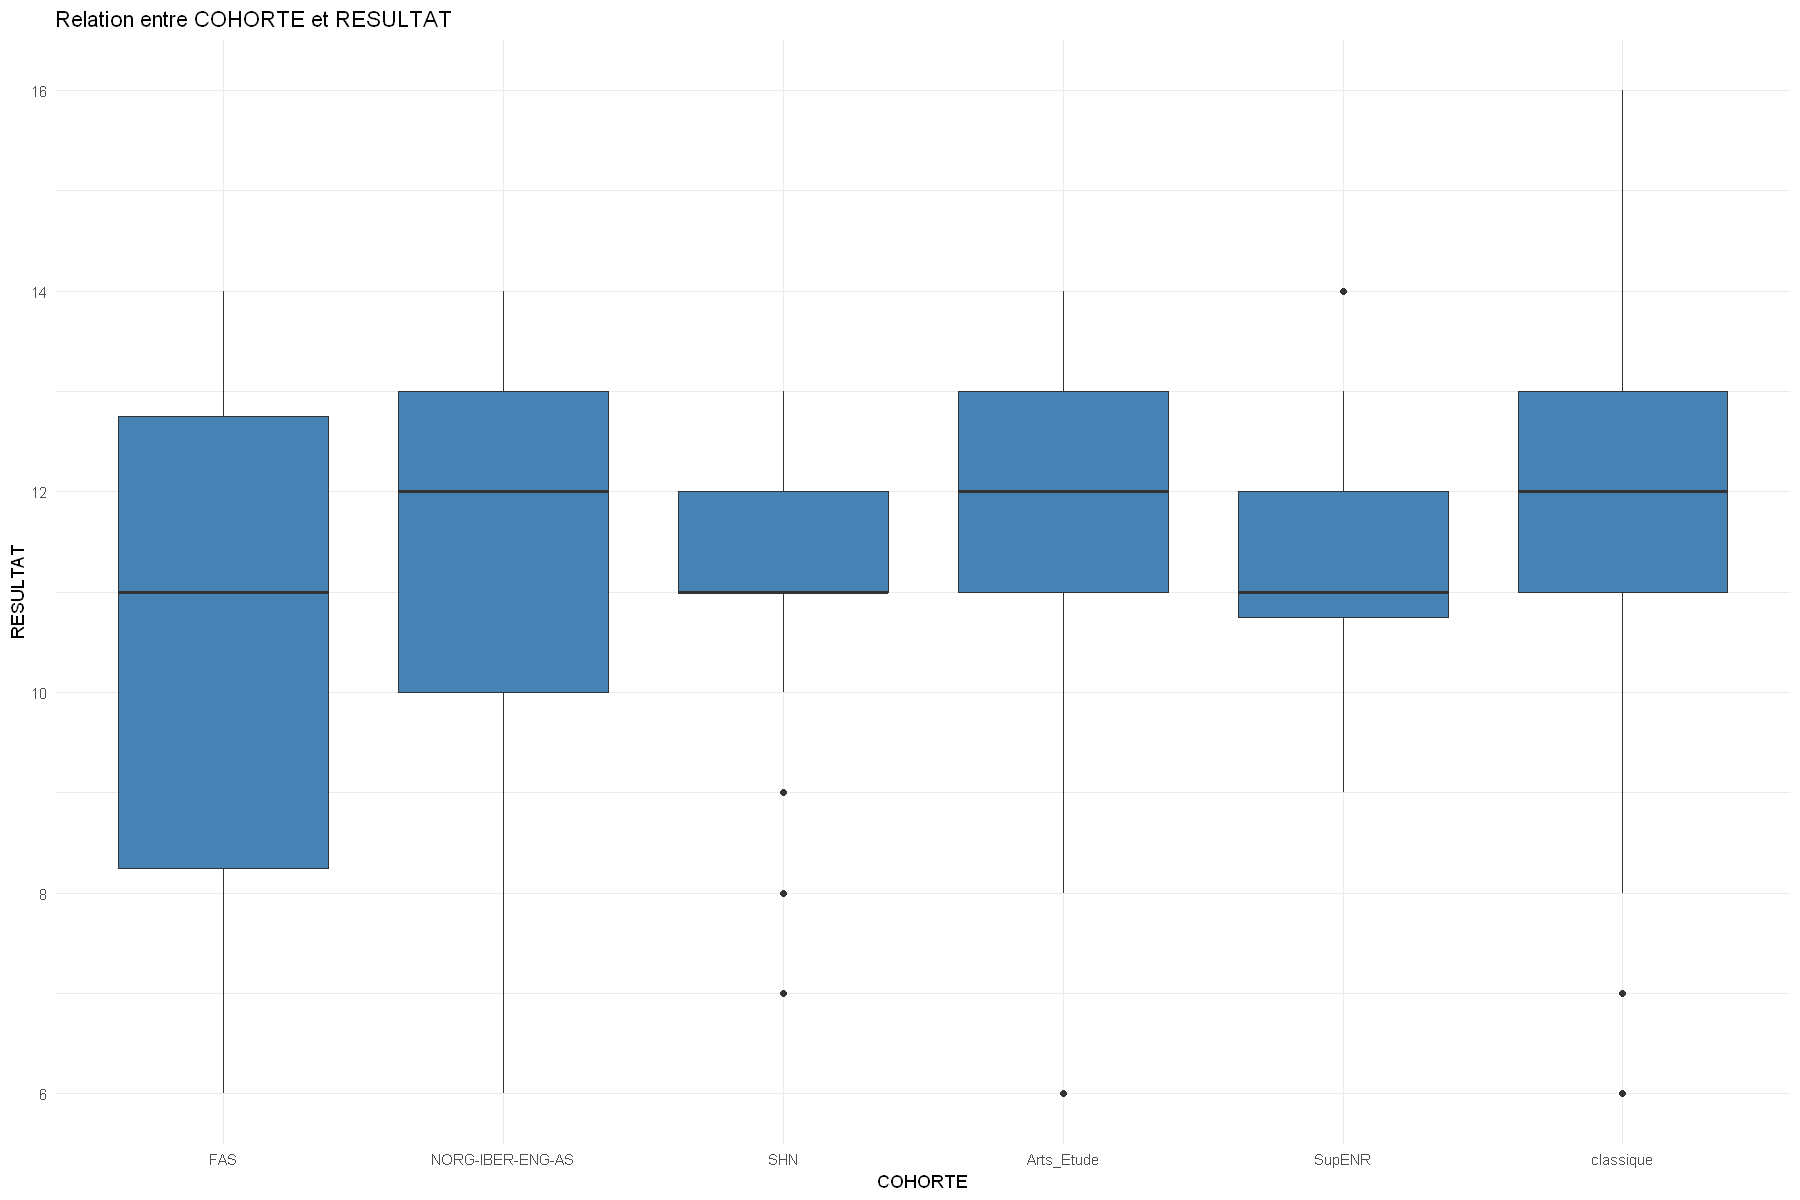

In [185]:
plot_boxplot_relation(group2_cleaned, "COHORTE", "RESULTAT")

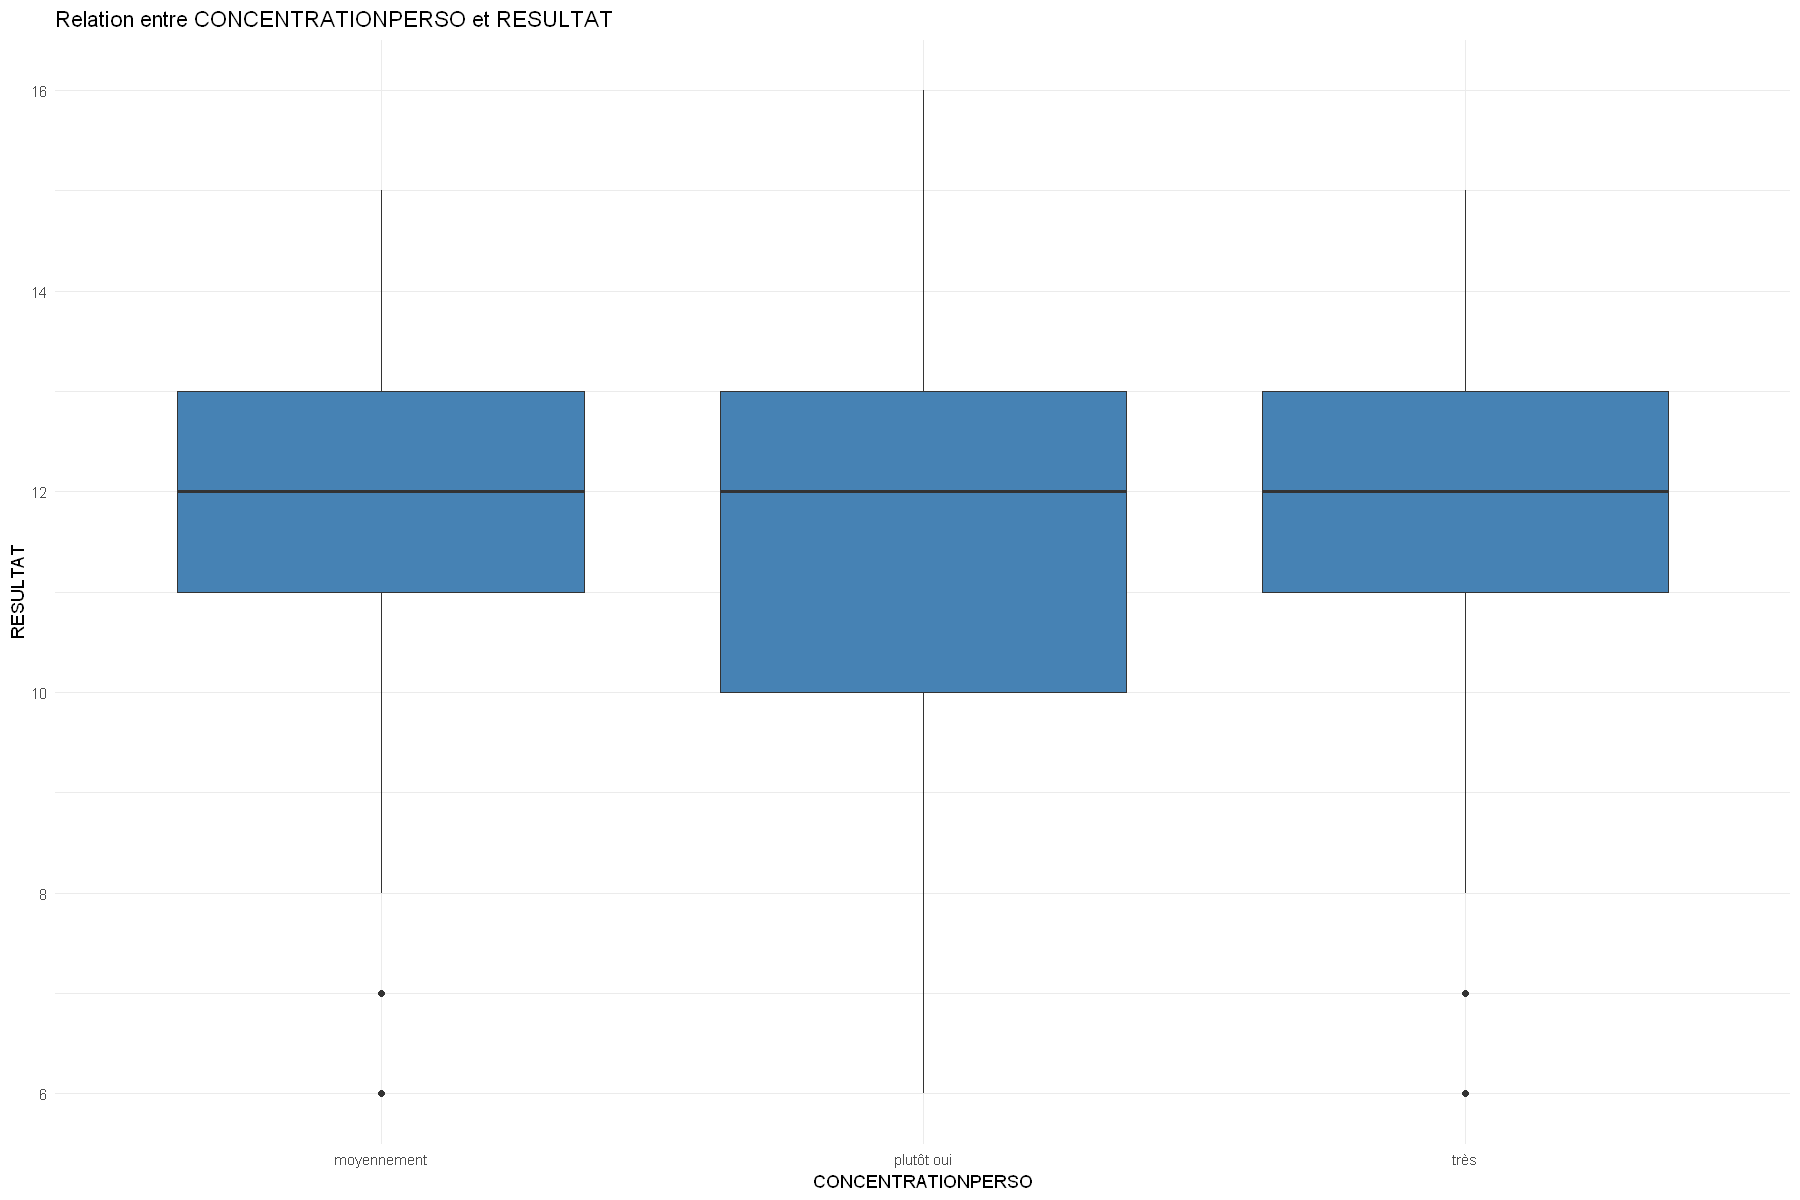

In [186]:
plot_boxplot_relation(group2_cleaned, "CONCENTRATIONPERSO", "RESULTAT")

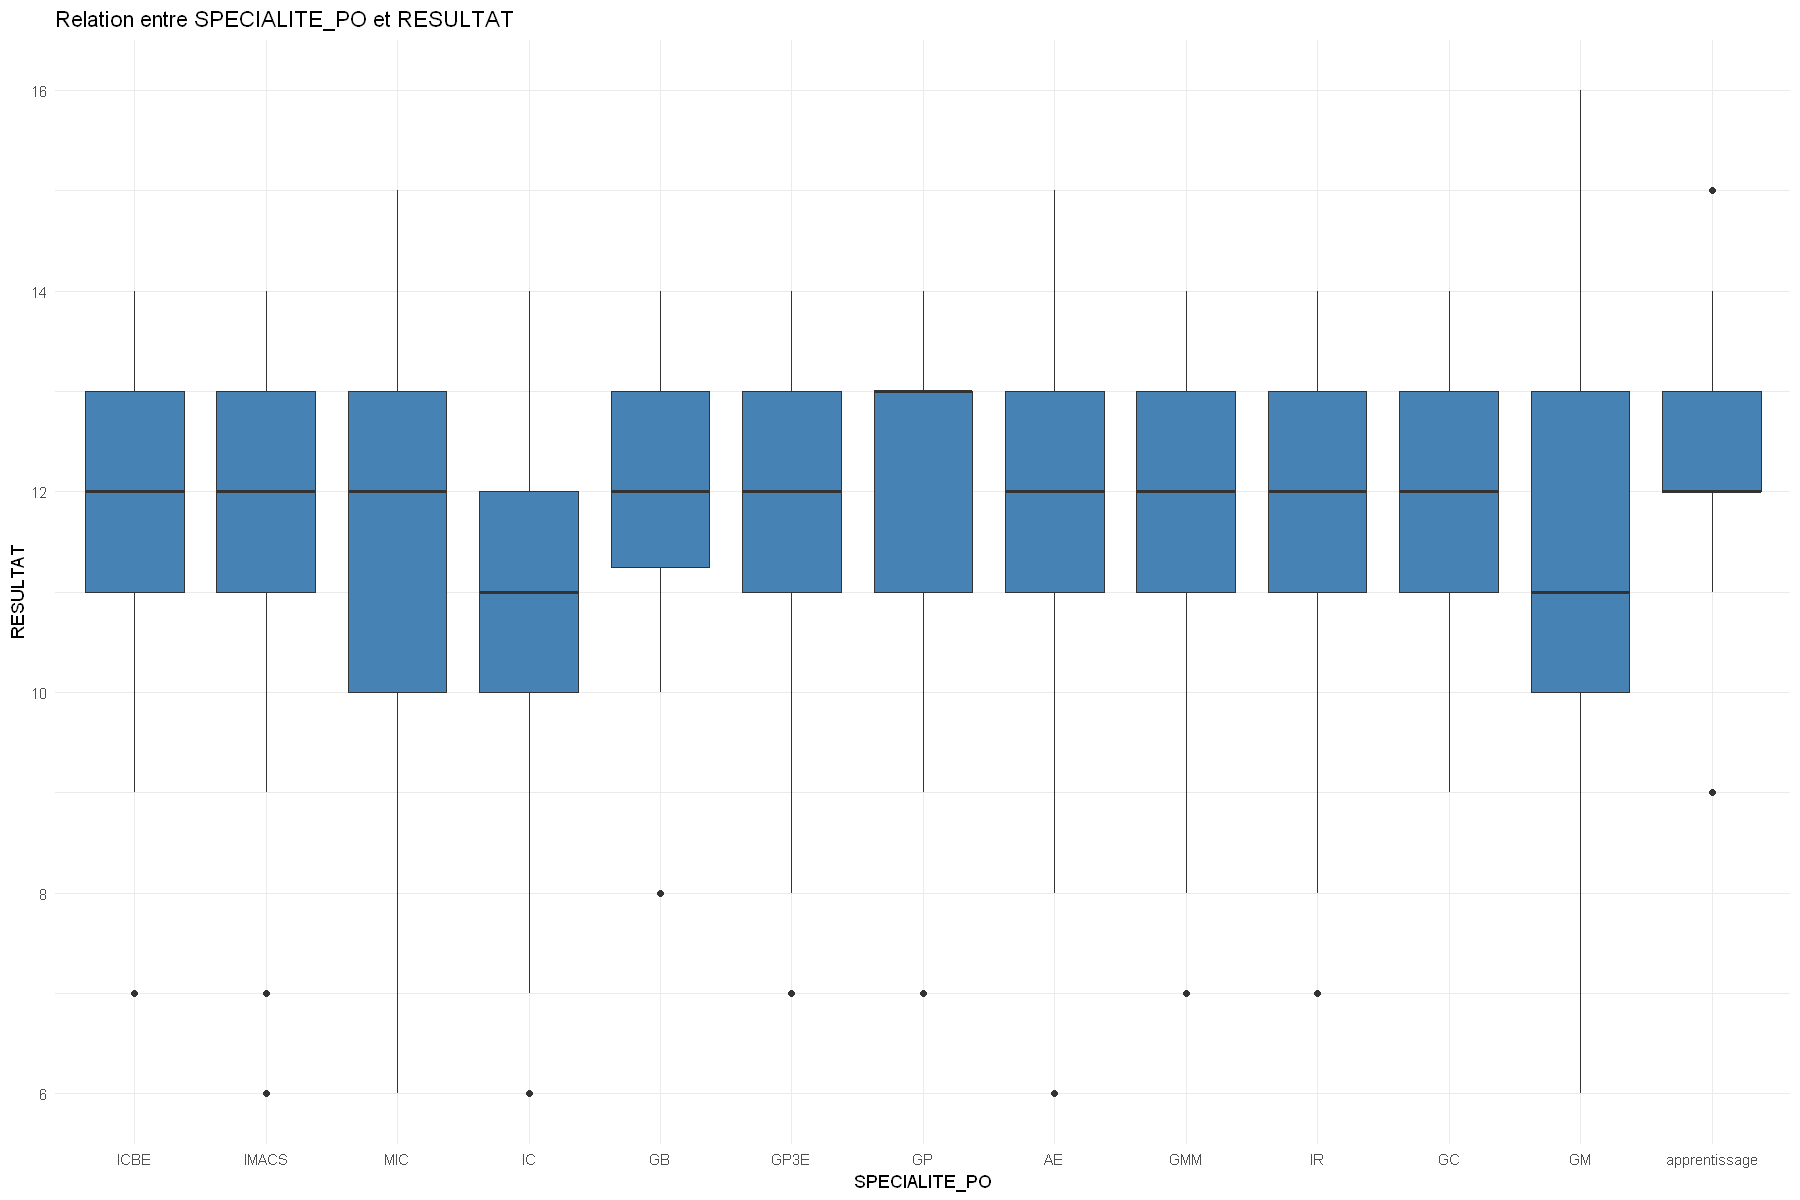

In [187]:
plot_boxplot_relation(group2_cleaned, "SPECIALITE_PO", "RESULTAT")

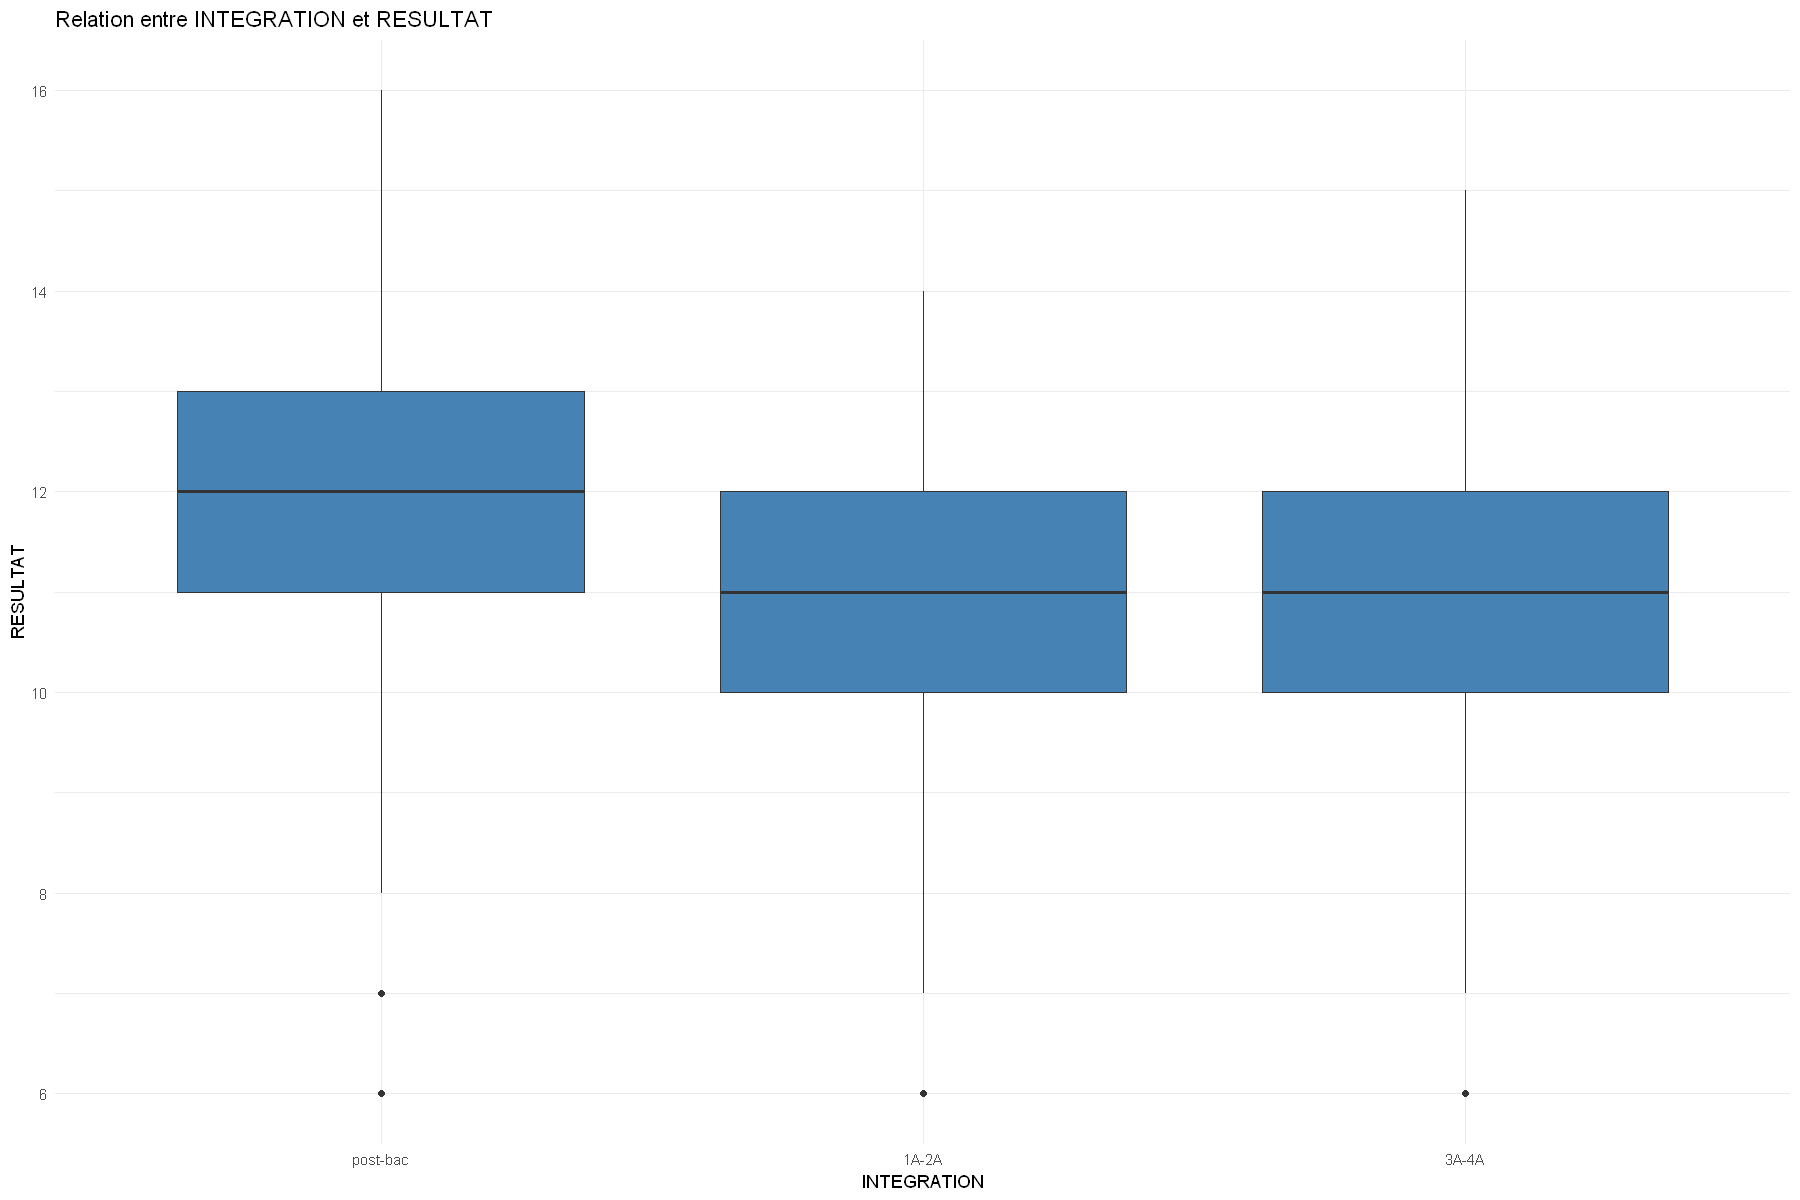

In [183]:
plot_boxplot_relation(group2_cleaned, "INTEGRATION", "RESULTAT")

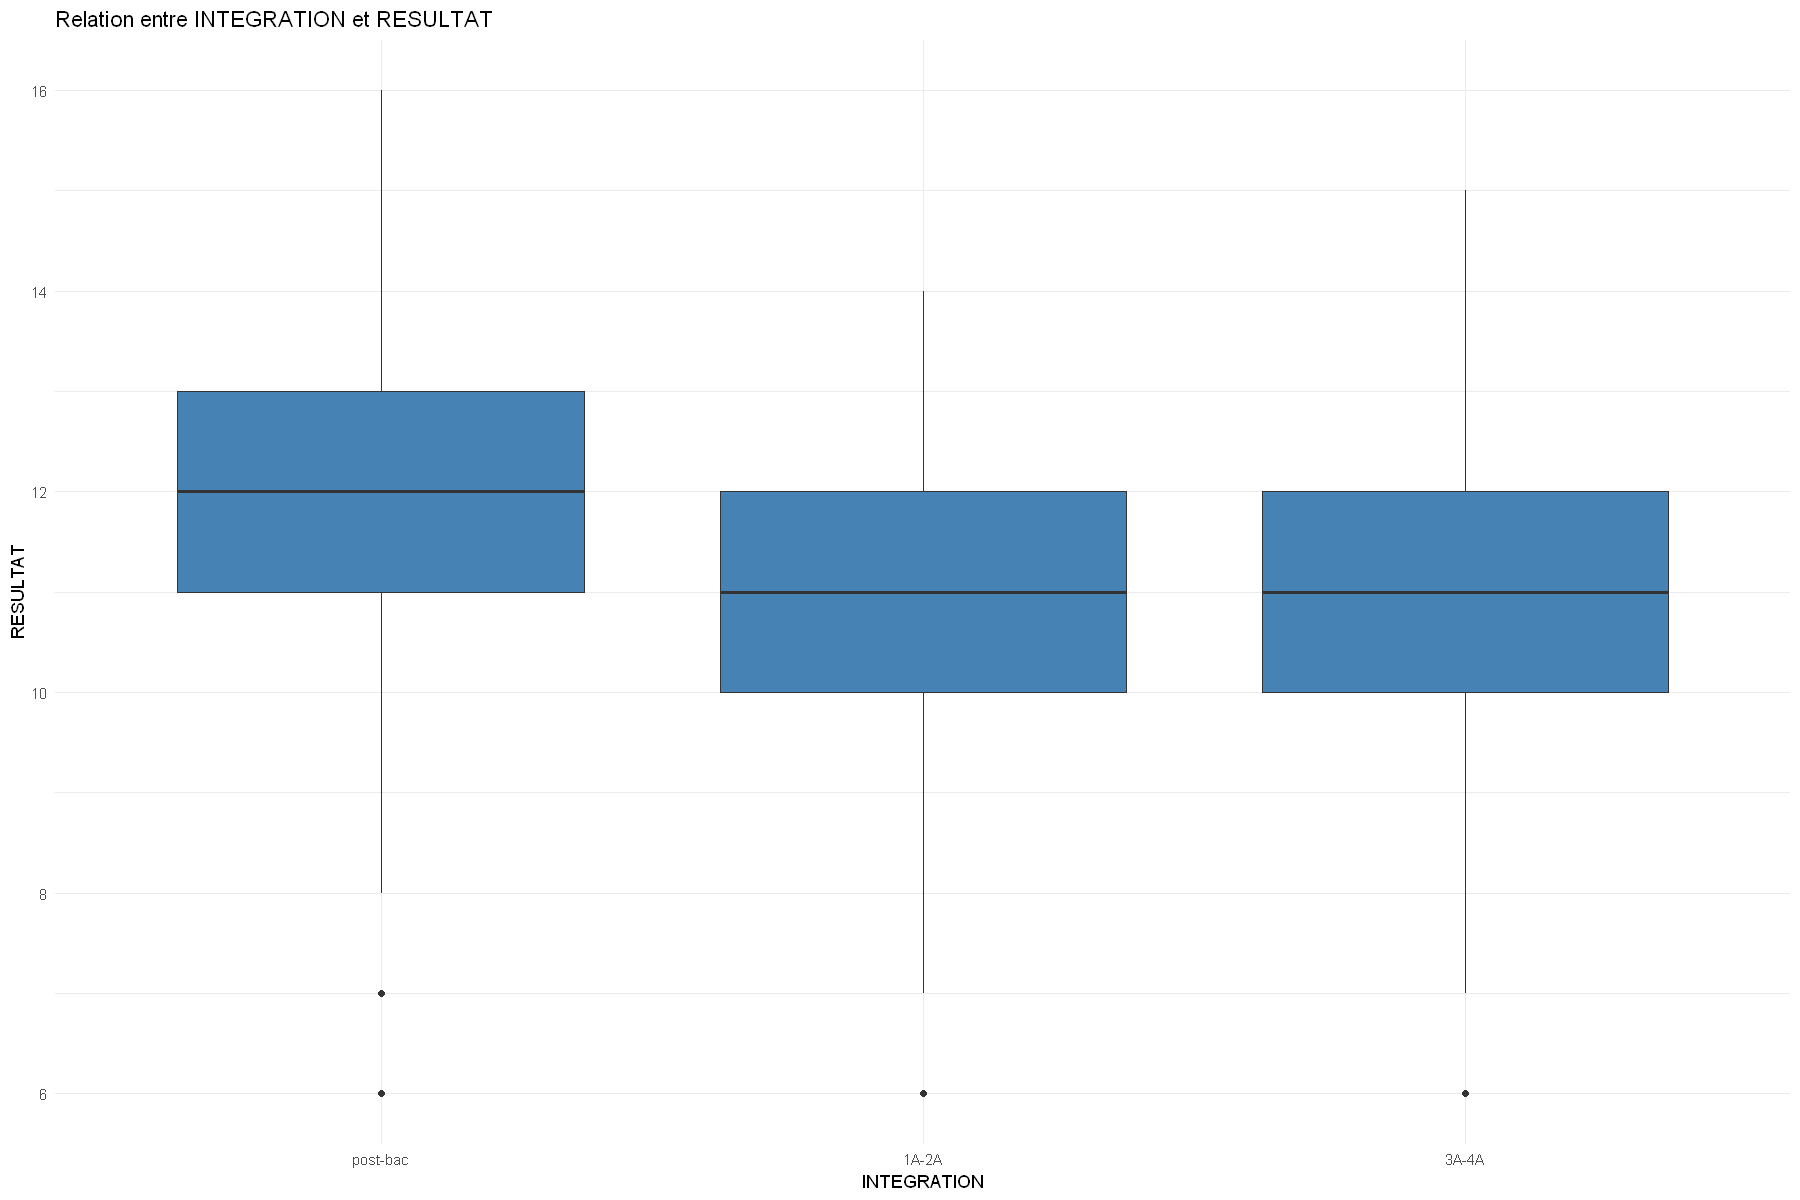

In [183]:
plot_boxplot_relation(group2_cleaned, "INTEGRATION", "RESULTAT")

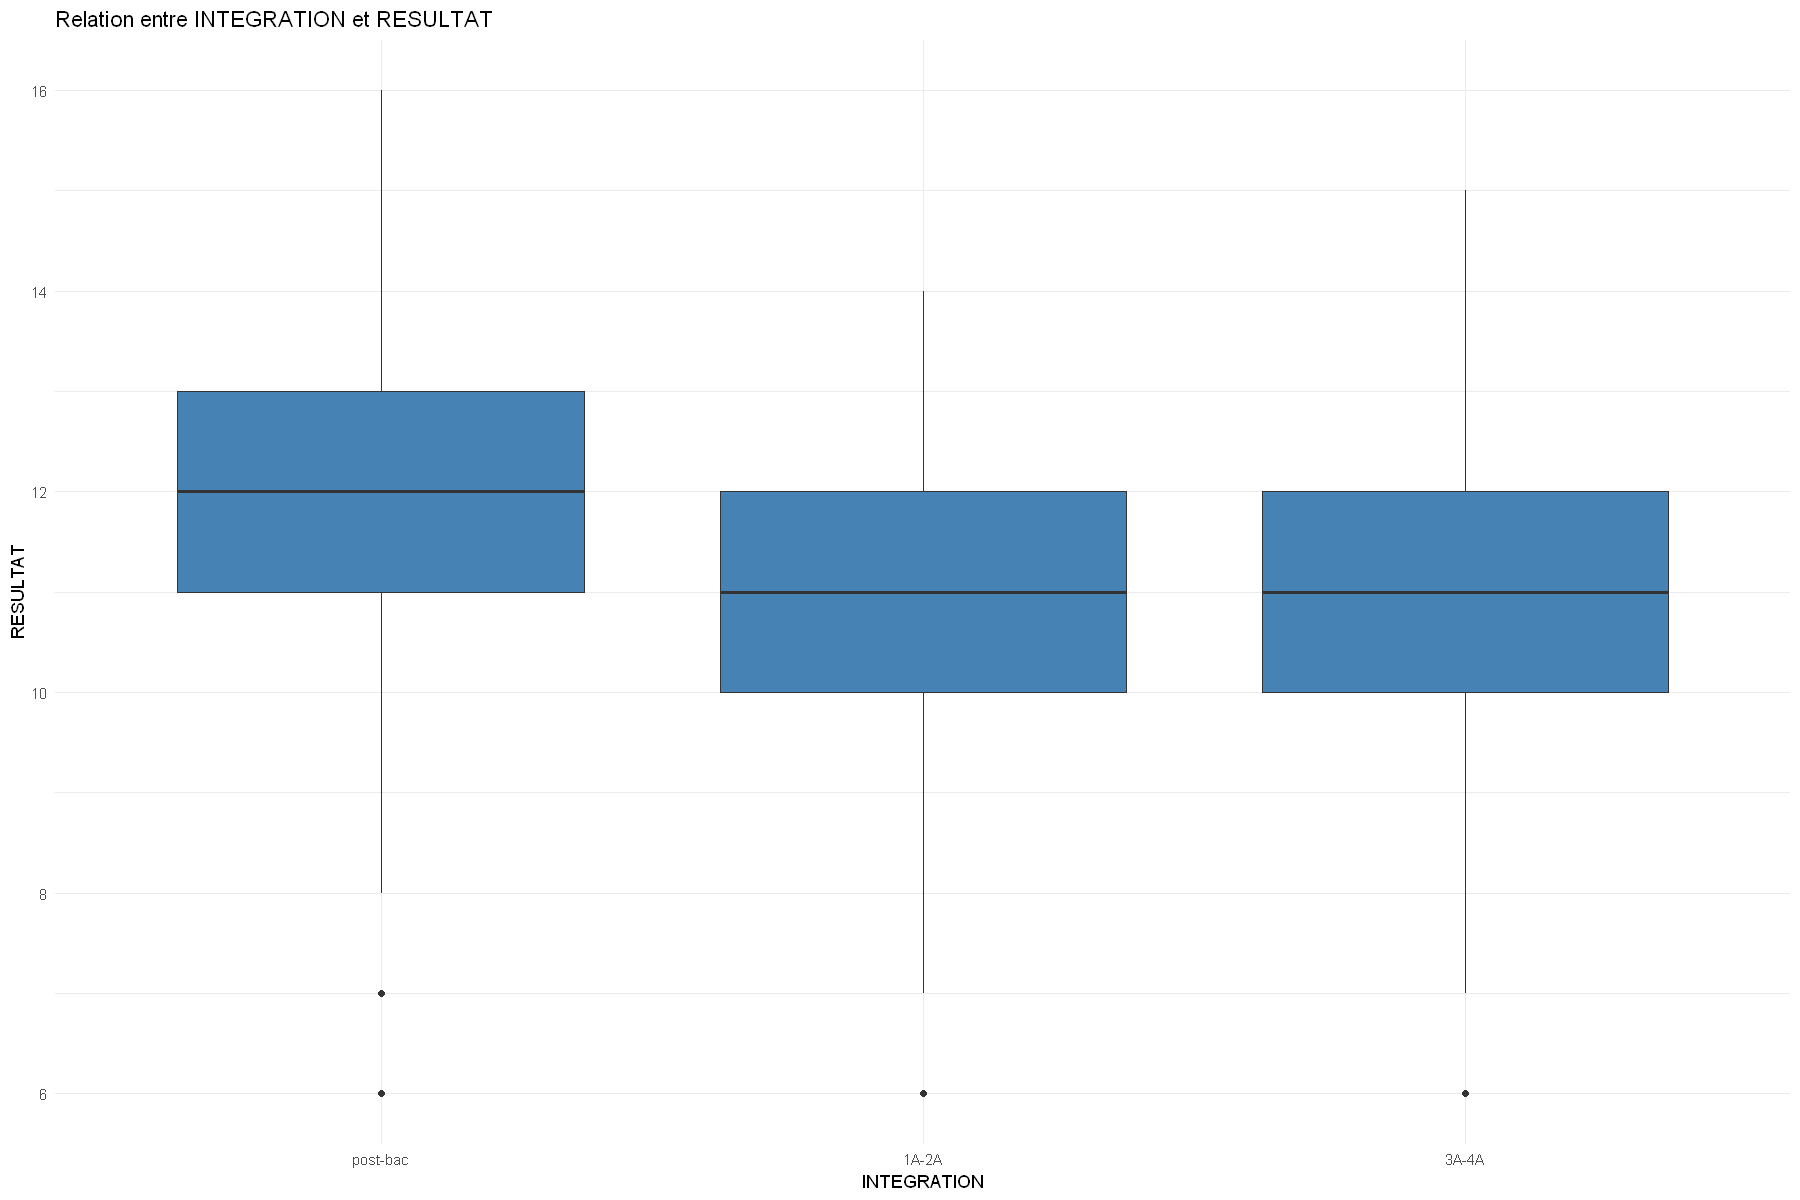

In [183]:
plot_boxplot_relation(group2_cleaned, "INTEGRATION", "RESULTAT")

#### IV.1.3. Analyse pour les étudiants 4A 

In [125]:
# Filtrer les données pour obtenir uniquement les étudiants de la promotion 4A
etudiants_4A <- subset(group2, PROMO == "4A")

# Supprimer la colonne PROMO car elle n'est plus nécessaire
etudiants_4A <- etudiants_4A[ , !(names(etudiants_4A) %in% c("PROMO"))]

etudiants_4A <- etudiants_4A  %>%
  filter(!(SPECIALITE_PO %in% c("ICBE", "IMACS", "MIC", "IC")))

etudiants_4A <- droplevels(etudiants_4A)


# Sauvegarder les données filtrées dans un fichier Excel
write_xlsx(etudiants_4A, "etudiants_4A.xlsx")

In [126]:
# Obtenir la liste des variables à partir des noms des colonnes de insa_clean
variables_to_plot <- names(etudiants_4A)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(etudiants_4A, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("etudiants_4A.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

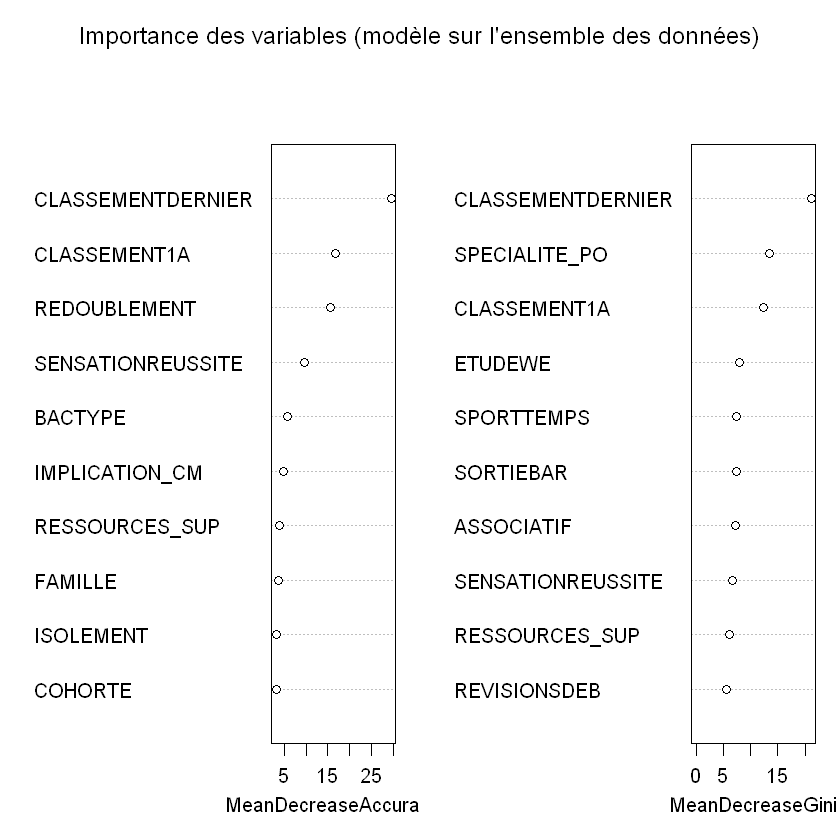

In [127]:
# Fixer le seed pour garantir la reproductibilité
set.seed(151)

# Construire le modèle Random Forest sur les données filtrées
rf_model_full <- randomForest(RATTRAPAGES ~ ., data = etudiants_4A, mtry = 8,ntree = 1000, importance = TRUE)

# Extraire l'importance des variables
var_importance_full <- importance(rf_model_full)

# Tracer l'importance des variables
varImpPlot(rf_model_full, 
           sort = TRUE, 
           n.var = 10,  # Afficher les 10 variables les plus importantes
           main = "Importance des variables (modèle sur l'ensemble des données)")


In [128]:
etudiants_4A_reduced <- etudiants_4A %>%
  dplyr::select(-SENSATIONREUSSITE, -REDOUBLEMENT, -CLASSEMENT1A, -CLASSEMENTDERNIER)

In [129]:
str(etudiants_4A_reduced)

tibble [367 × 37] (S3: tbl_df/tbl/data.frame)
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 2 2 ...
 $ ACT_PRO           : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 1 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 2 2 3 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 1 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 1 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 3 2 2 2 ...
 $ COMMENTAIRE       : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 1 ...
 $ ETUDEWE           : Factor w/ 6 levels "-1h","1-2h","2-4h",..: 3 3 4 5 4 2 4 5 3 2 ...
 $ ETUDEGROUPE       : Factor w/ 3 levels "jamais","parfois",..: 1 1 2 2 2 1 2 2 3 3 ...
 $ ETUDEDEHORS       : Factor w/ 4 levels "jamais","parfois",..: 3 2 2 2 3 3 3 1 4 2 ...
 $ REVISIONSDEB      : Factor w/ 5 levels "semestre","1 mois avant",..: 3 3 2 3

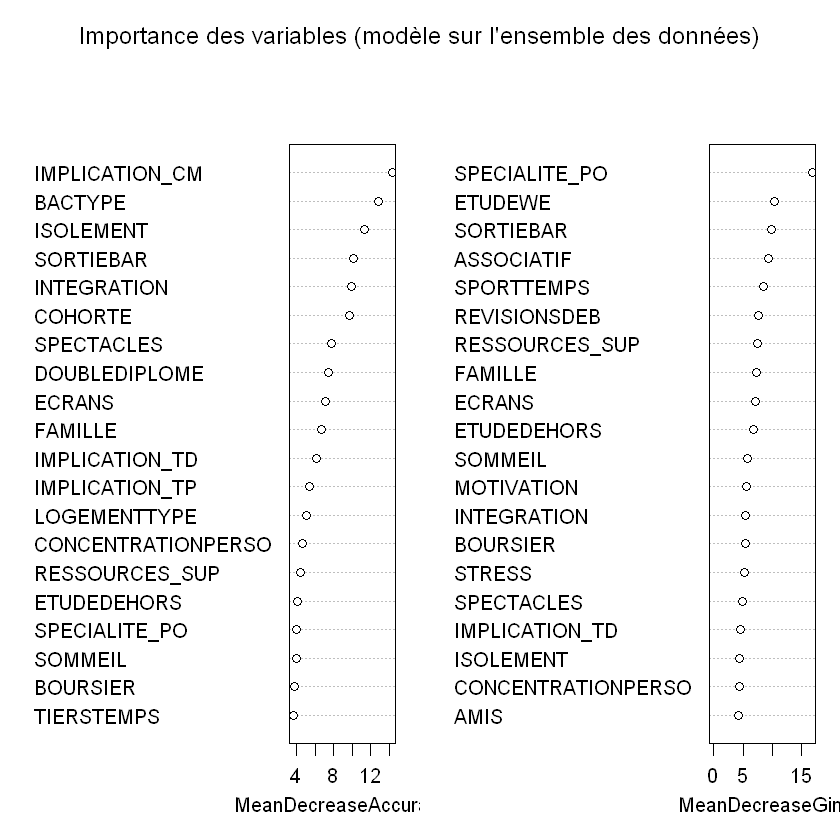

In [133]:
# Fixer le seed pour garantir la reproductibilité
set.seed(1234)

# Construire le modèle Random Forest sur les données filtrées
rf_model_full <- randomForest(RATTRAPAGES ~ ., data = etudiants_4A_reduced, mtry = 8,ntree = 7000, importance = TRUE)

# Extraire l'importance des variables
var_importance_full <- importance(rf_model_full)

# Tracer l'importance des variables
varImpPlot(rf_model_full, 
           sort = TRUE, 
           n.var = 20,  # Afficher les 20 variables les plus importantes
           main = "Importance des variables (modèle sur l'ensemble des données)")


Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : IMPLICATION_CM et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 15.76, df = 9, p-value = 0.07207



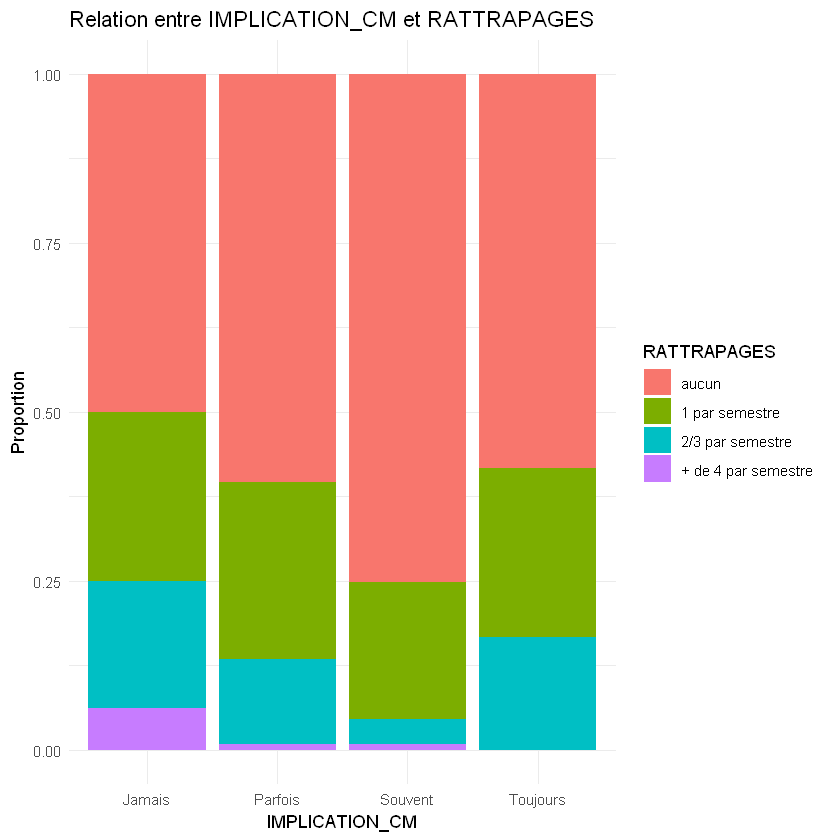

In [153]:
chi_square_test_and_plot(etudiants_4A_reduced, "IMPLICATION_CM", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : BACTYPE et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 20.131, df = 6, p-value = 0.002625



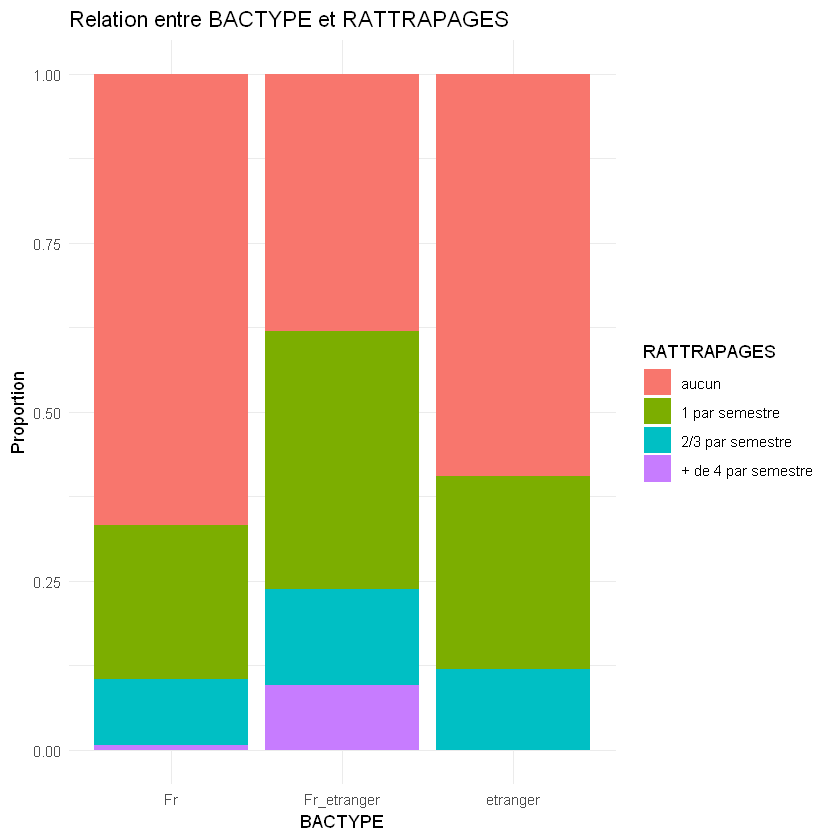

In [138]:
chi_square_test_and_plot(etudiants_4A_reduced, "BACTYPE", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : LOGEMENTTYPE et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 5.3912, df = 6, p-value = 0.4947



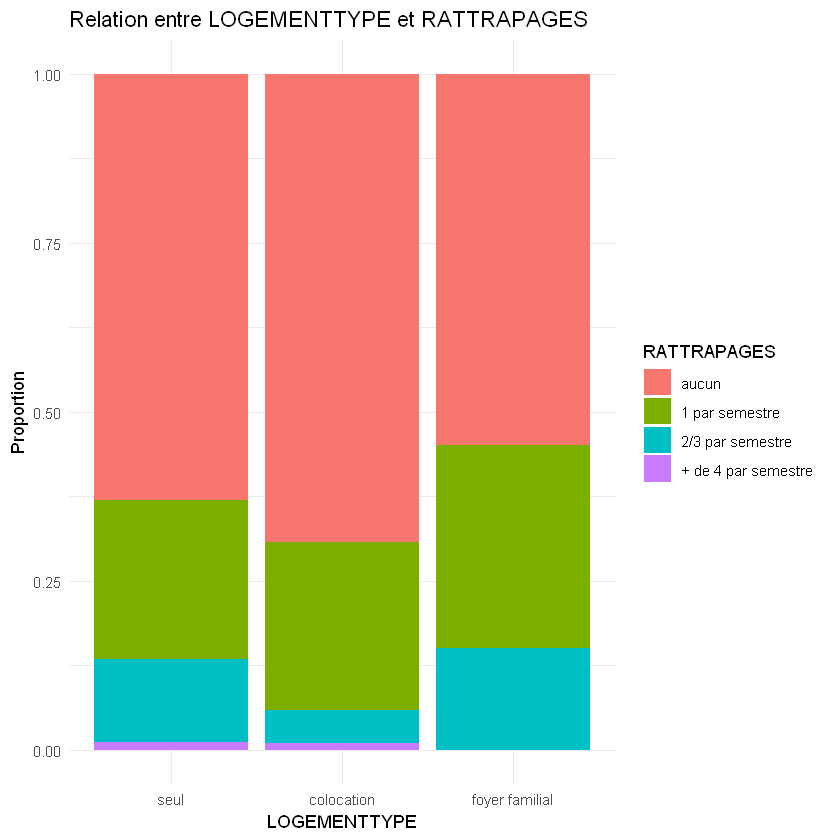

In [139]:
chi_square_test_and_plot(etudiants_4A_reduced, "LOGEMENTTYPE", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : DOUBLEDIPLOME et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 2.8416, df = 3, p-value = 0.4167



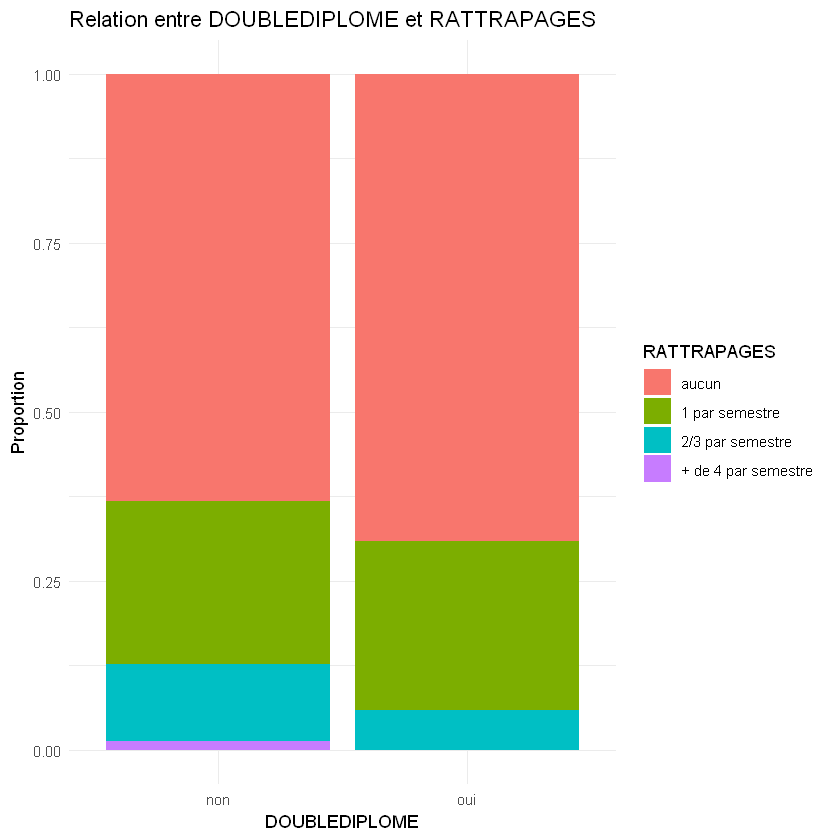

In [140]:
chi_square_test_and_plot(etudiants_4A_reduced, "DOUBLEDIPLOME", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : INTEGRATION et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 14.572, df = 6, p-value = 0.02386



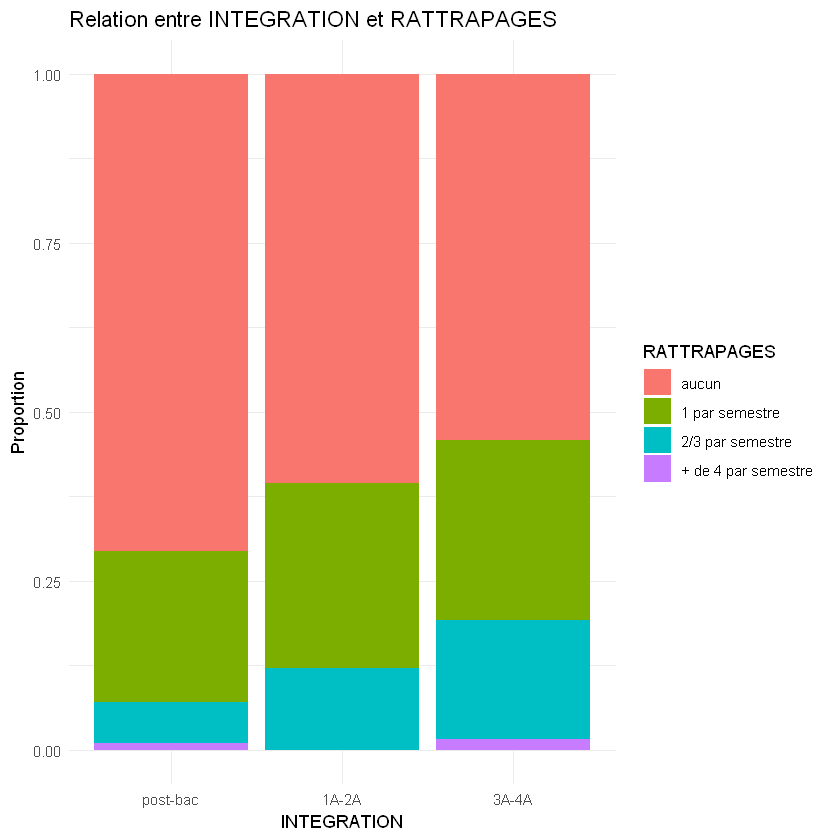

In [141]:
chi_square_test_and_plot(etudiants_4A_reduced, "INTEGRATION", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : IMPLICATION_TD et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 29.187, df = 6, p-value = 5.608e-05



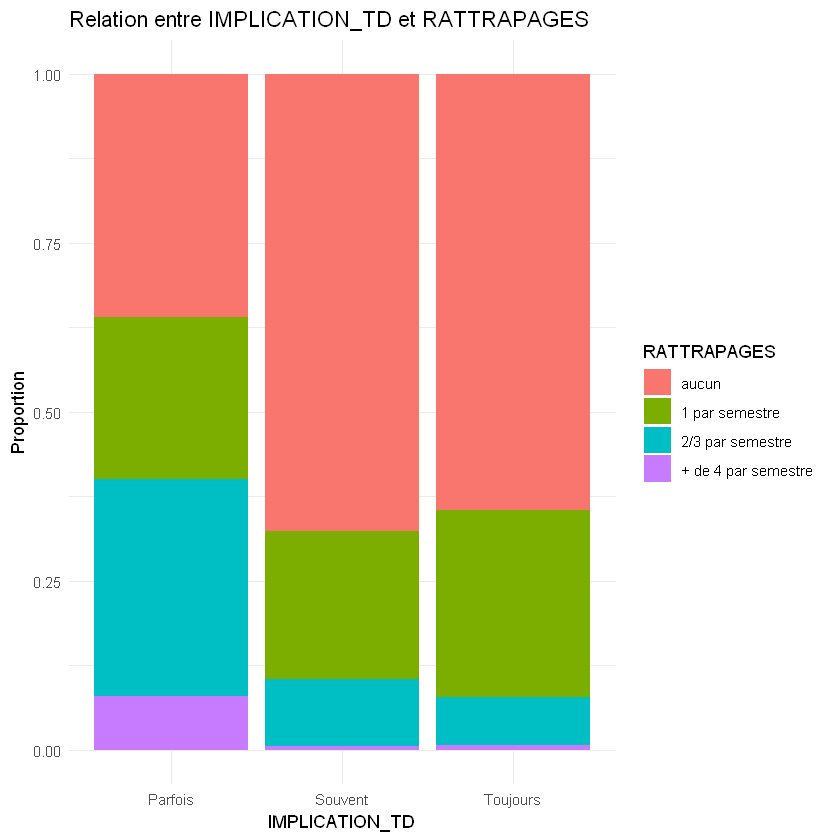

In [142]:
chi_square_test_and_plot(etudiants_4A_reduced, "IMPLICATION_TD", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : IMPLICATION_TP et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 9.1089, df = 6, p-value = 0.1675



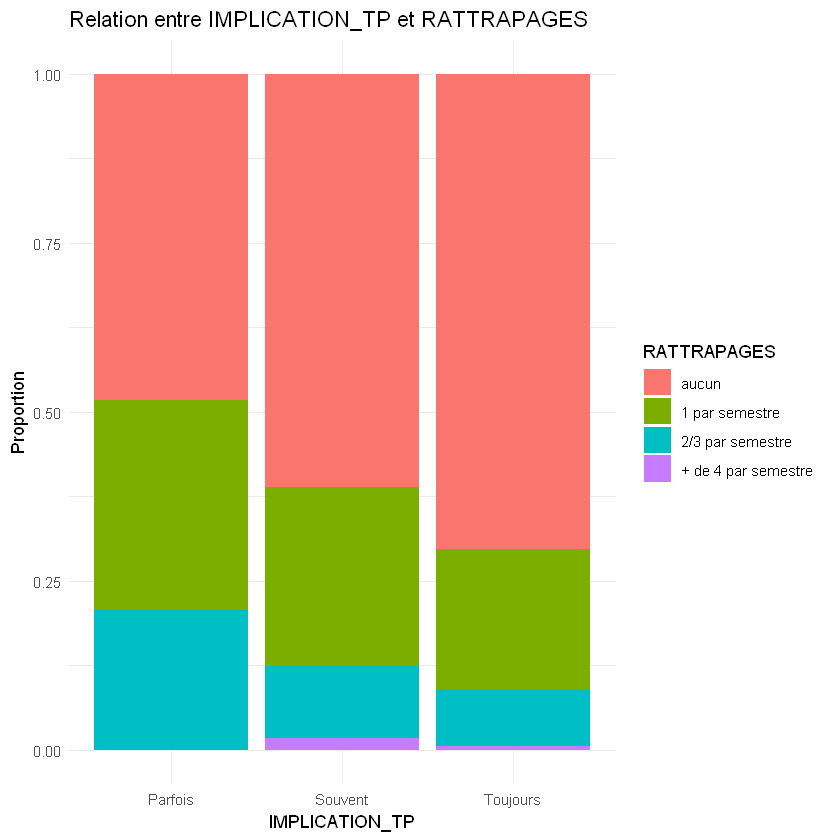

In [143]:
chi_square_test_and_plot(etudiants_4A_reduced, "IMPLICATION_TP", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : TIERSTEMPS et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 0.44348, df = 3, p-value = 0.9311



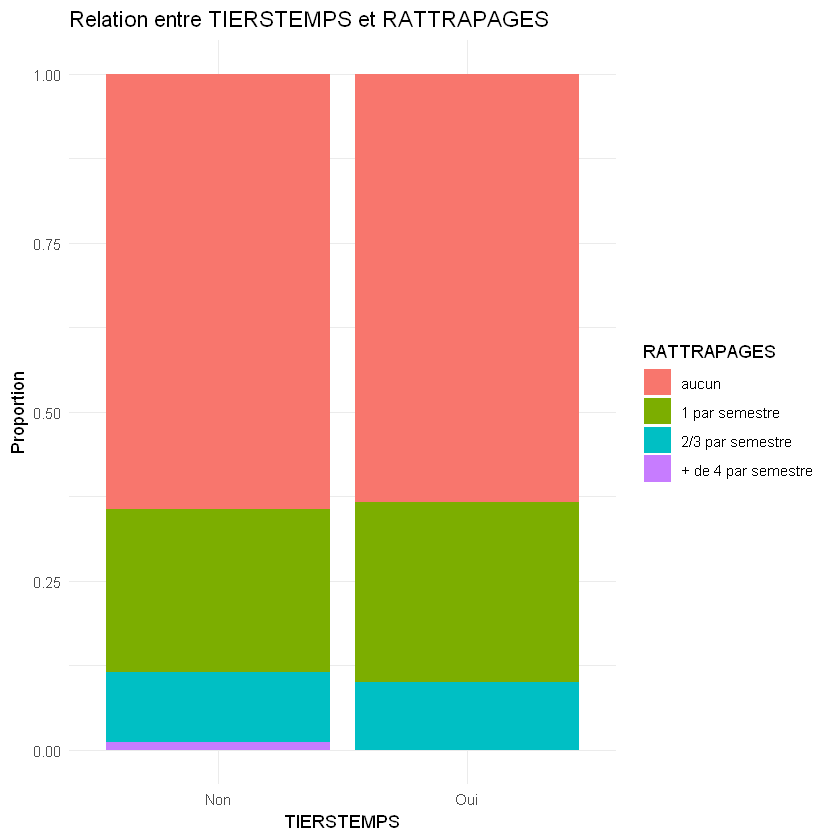

In [144]:
chi_square_test_and_plot(etudiants_4A_reduced, "TIERSTEMPS", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : SPECIALITE_PO et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 27.494, df = 24, p-value = 0.2819



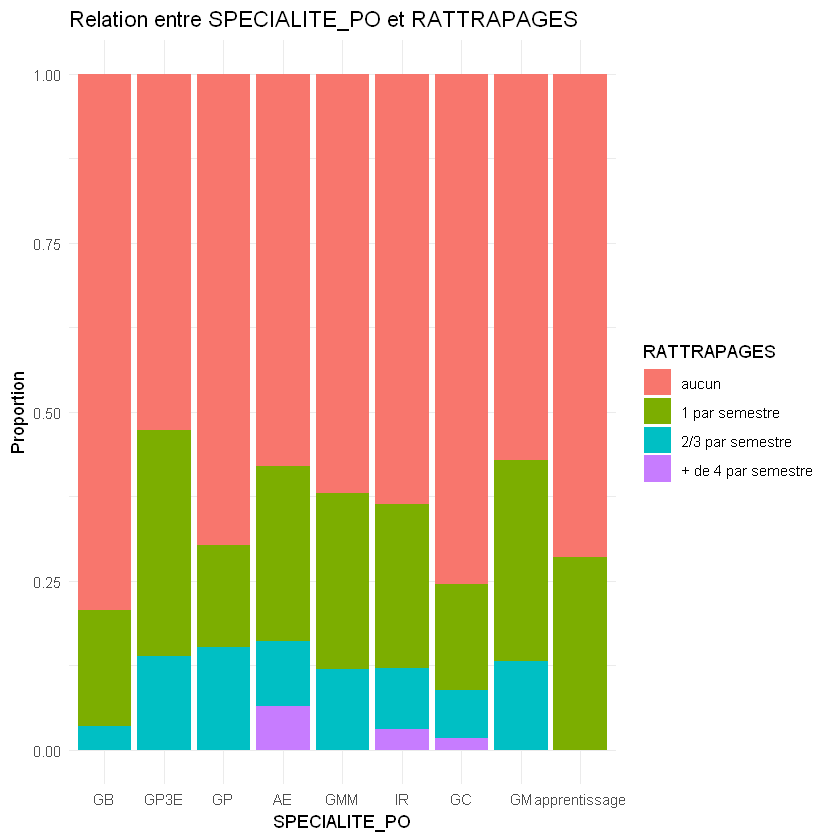

In [145]:
chi_square_test_and_plot(etudiants_4A_reduced, "SPECIALITE_PO", "RATTRAPAGES")

Warning message in chisq.test(table_var):
"Chi-squared approximation may be incorrect"


Résultat du test Chi-deux pour les variables : ETUDEWE et RATTRAPAGES 

	Pearson's Chi-squared test

data:  table_var
X-squared = 18.718, df = 15, p-value = 0.2268



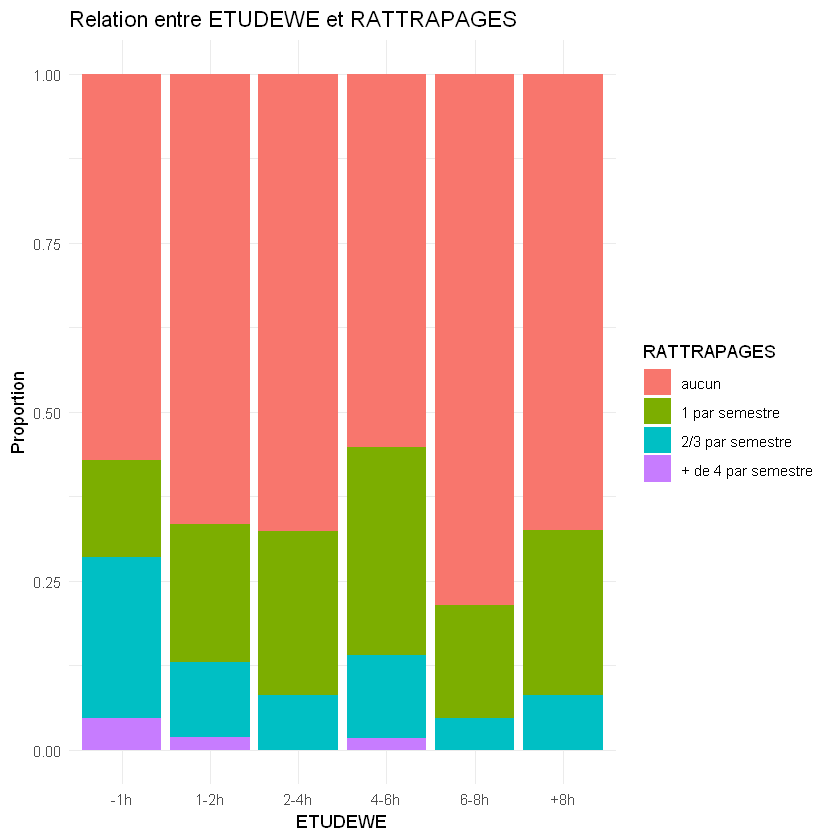

In [147]:
chi_square_test_and_plot(etudiants_4A_reduced, "ETUDEWE", "RATTRAPAGES")

Nous constatons que trois variables liées à la presence et l'attitude au TD semblent être importantes pour la variable RATTRAPAGES. Je trouve cela logique et assez similaire à mes expériences à l'INSA. En effet, je pense que si nous participons aux cours de TD et que nous nous concentrons sur la résolution des exercices, nous pouvons non seulement reviser les connaissances acquises en CM, mais aussi appliquer ces connaissances aux exercices. Par conséquent, je pense que comprendre les exercices en TD augmente nos chances de réussir les évaluations. D'après mon expérience, la seule matière pour laquelle j'ai dû passer un rattrapage est celle où, pour diverses raisons, je n'ai pas assisté à tous les cours de TD. Si nous ne faisons pas les exercices au fur et à mesure des cours, nous risquons d'accumuler beaucoup de exercices lors de la révision pour les examens. De plus, pour moi, il y a des matières pour lesquelles les corrections des TD sont disponibles sur Google Drive, et je pensais pouvoir les lire moi-même sans assister aux cours de TD. Cependant, cela m'a pris plus de temps pour les lire, ou bien je ne les ai pas lues avant la fin du semestre et mes notes dans ces matières n'ont pas été excellentes. En conclusion, la participation et la concentration pendant les cours de TD sont cruciales pour la réussite académique des étudiants. 

In [105]:
# Étape 1 : Créer le dataframe etudiants_4A_cleaned avec uniquement les étudiants de la promo "4A"
etudiants_4A_cleaned <- subset(group2_cleaned, PROMO == "4A")

# Étape 2 : Supprimer la colonne PROMO car elle n'est plus nécessaire
etudiants_4A_cleaned <- etudiants_4A_cleaned[, !names(etudiants_4A_cleaned) %in% c("PROMO")]

# Étape 3 : Vérifier le résultat en affichant les premières lignes du dataframe
str(etudiants_4A_cleaned)


tibble [322 × 55] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 1 3 2 3 2 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 1 1 2 2 2 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 2 2 5 5 5 ...
 $ LOGEMENTBIEN      : Factor w/ 3 levels "plutôt non","plutôt oui",..: 3 3 2 3 3 2 2 3 2 3 ...
 $ ACT_PRO           : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 2 2 3 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 1 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 1 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 3 2 2 2 4 ...
 $ COMMENTAIRE       : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 1 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 4 levels "pas commentaire",..: 1 3 3 3 3

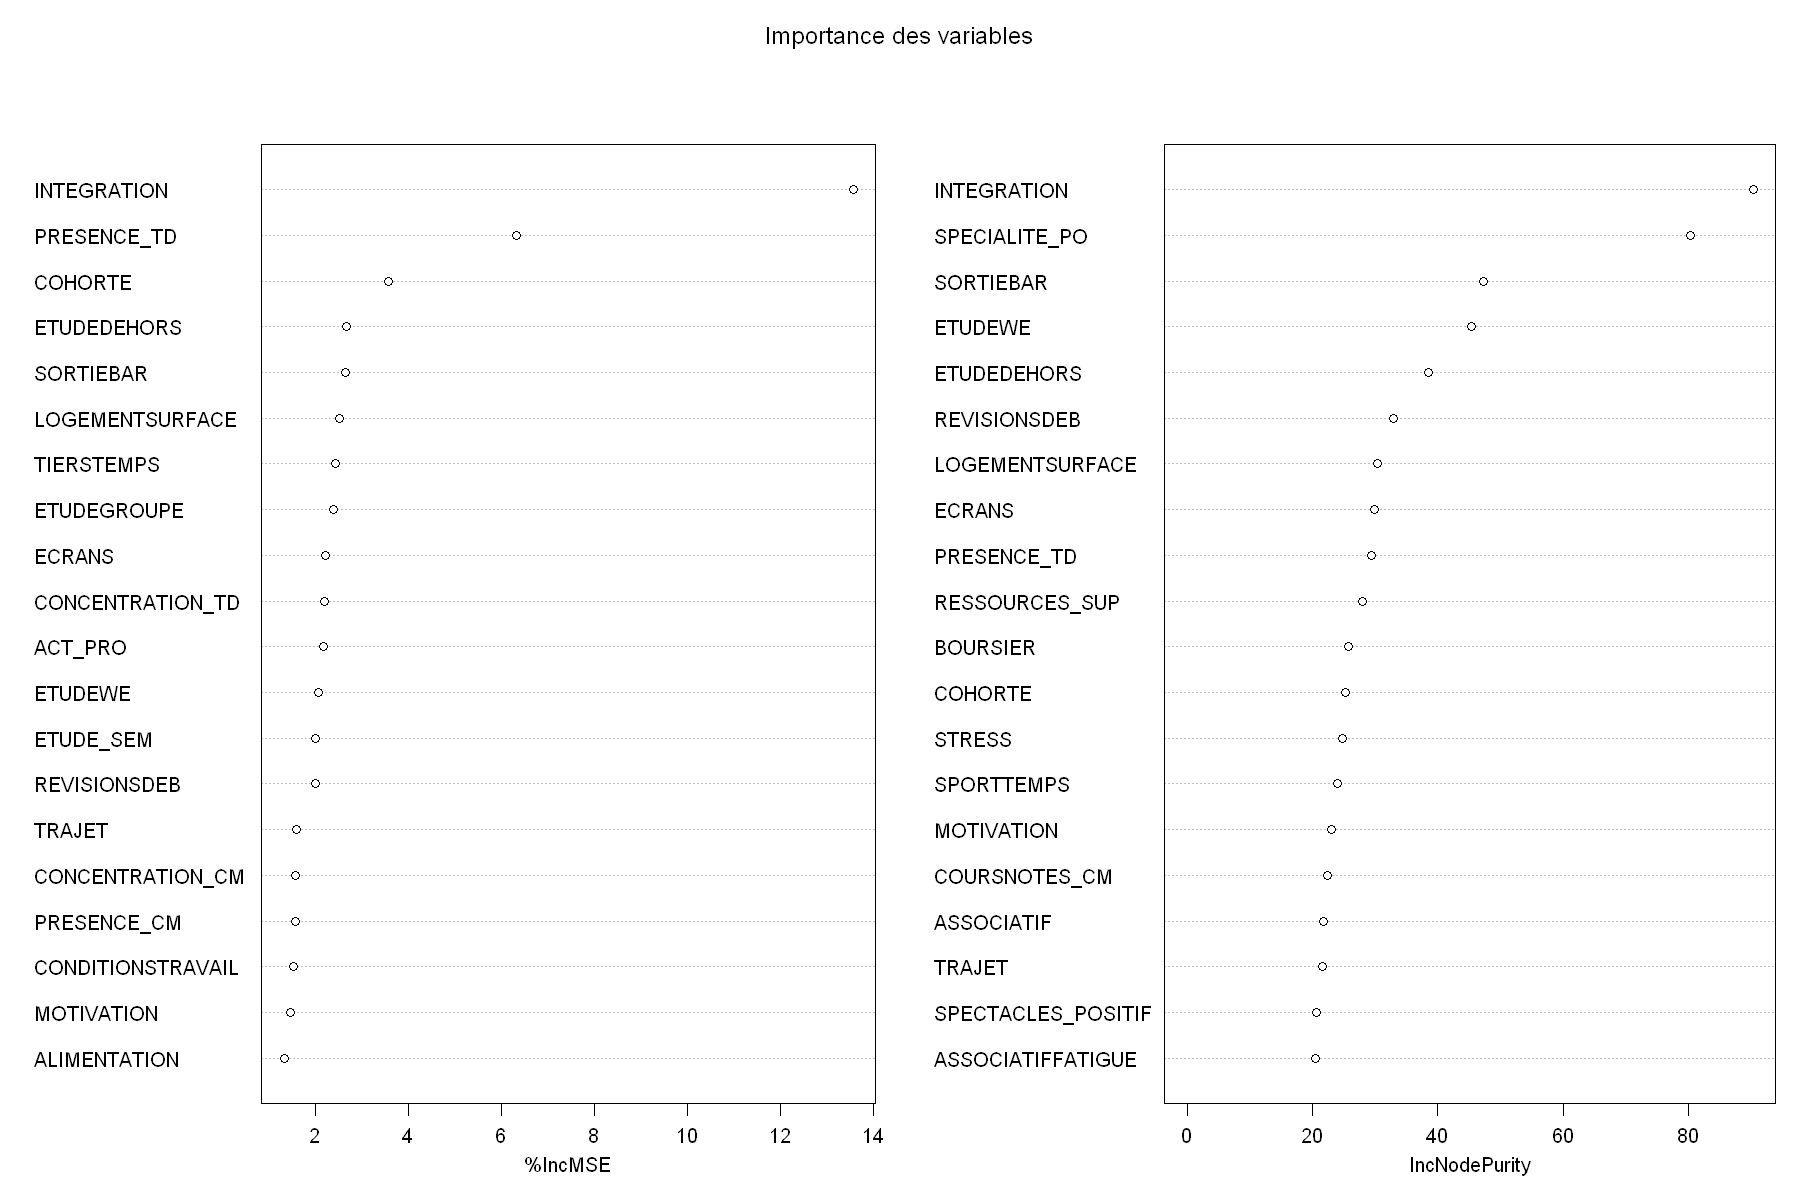

In [106]:
# Construire le modèle Random Forest
set.seed(151) # Fixer le seed pour la reproductibilité
rf_model_4a_redoublement <- randomForest(RESULTAT ~ ., data = etudiants_4A_cleaned, importance = TRUE)

# Extraire l'importance des variables
var_importance <- importance(rf_model_4a_redoublement)

# Tracer l'importance des variables
varImpPlot(rf_model_4a_redoublement, 
           sort = TRUE, 
           n.var = 20,  # Affiche les 10 variables les plus importantes
           main = "Importance des variables")

## Modèle linéaire

In [148]:
str(etudiants_4A_reduced)

tibble [367 × 35] (S3: tbl_df/tbl/data.frame)
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 2 2 ...
 $ ACT_PRO           : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 1 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 2 2 3 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 1 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 1 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 3 2 2 2 ...
 $ COMMENTAIRE       : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 1 ...
 $ ETUDEWE           : Factor w/ 6 levels "-1h","1-2h","2-4h",..: 3 3 4 5 4 2 4 5 3 2 ...
 $ ETUDEGROUPE       : Factor w/ 3 levels "jamais","parfois",..: 1 1 2 2 2 1 2 2 3 3 ...
 $ ETUDEDEHORS       : Factor w/ 4 levels "jamais","parfois",..: 3 2 2 2 3 3 3 1 4 2 ...
 $ REVISIONSDEB      : Factor w/ 5 levels "semestre","1 mois avant",..: 3 3 2 3

In [228]:
summary(etudiants_4A_reduced)

         LOGEMENTTYPE     ACT_PRO            BOURSIER   HANDICAP  TIERSTEMPS
 seul          :246   aucune  :302   non         :259   non:359   Non:337   
 colocation    :101   oui 1-5h: 32   echelon 0bis: 54   oui:  8   Oui: 30   
 foyer familial: 20   oui +5  : 33   echelon 1-3 : 28                       
                                     echelon 4-7 : 26                       
                                                                            
                                                                            
                                                                            
      STRESS     COMMENTAIRE  ETUDEWE     ETUDEGROUPE    ETUDEDEHORS 
 jamais  : 16   jamais : 84   -1h : 21   jamais : 50   jamais  : 60  
 parfois :139   parfois:242   1-2h: 54   parfois:188   parfois :175  
 souvent :160   souvent: 41   2-4h: 99   souvent:129   souvent :112  
 toujours: 52                 4-6h:114                 toujours: 20  
                              6-8h

In [134]:
# Charger les bibliothèques nécessaires
library(nnet)  # Pour la régression logistique multinomiale
library(MASS)  # Pour stepAIC, la sélection de modèle
# Ajuster le modèle de régression logistique multinomiale complet avec toutes les variables explicatives
modele_complet <- multinom(RATTRAPAGES ~ ., data = etudiants_4A_reduced)

modele_selection <- stepAIC(modele_complet, direction = "backward", trace = TRUE)

# Résumé du modèle sélectionné
summary(modele_selection)

# Extraire les coefficients et les variables importantes
coef(modele_selection)

# Vous pouvez aussi évaluer les prédictions et la précision du modèle si nécessaire
predictions <- predict(modele_selection, newdata = etudiants_4A_reduced)
table(predictions, etudiants_4A_reduced$RATTRAPAGES)

# La fonction varImp() calcule l'importance des variables dans le modèle
var_importance <- varImp(modele_selection, scale = FALSE)

# Afficher l'importance des variables
print(var_importance)

# weights:  380 (282 variable)
initial  value 508.770031 
iter  10 value 202.901328
iter  20 value 167.720631
iter  30 value 155.263491
iter  40 value 144.394310
iter  50 value 132.800299
iter  60 value 125.821863
iter  70 value 124.644641
iter  80 value 124.342581
iter  90 value 124.229820
iter 100 value 124.208663
final  value 124.208663 
stopped after 100 iterations
Start:  AIC=812.42
RATTRAPAGES ~ LOGEMENTTYPE + ACT_PRO + BOURSIER + HANDICAP + 
    TIERSTEMPS + STRESS + COMMENTAIRE + ETUDEWE + ETUDEGROUPE + 
    ETUDEDEHORS + REVISIONSDEB + CONCENTRATIONPERSO + CONDITIONSTRAVAIL + 
    RESSOURCES_SUP + AMIS + FAMILLE + ISOLEMENT + ASSOCIATIF + 
    SPORTTEMPS + SPECTACLES + SORTIEBAR + DETENTE + ECRANS + 
    SOMMEIL + ALIMENTATION + MOTIVATION + ADEQUATION + PREPMETIER + 
    SPECIALITE_PO + COHORTE + DOUBLEDIPLOME + INTEGRATION + BACTYPE + 
    IMPLICATION_CM + IMPLICATION_TD + IMPLICATION_TP

# weights:  372 (276 variable)
initial  value 508.770031 
iter  10 value 197.541885
ite

Warning message in sqrt(diag(vc)):
"NaNs produced"


Call:
multinom(formula = RATTRAPAGES ~ LOGEMENTTYPE + ACT_PRO + BOURSIER + 
    HANDICAP + TIERSTEMPS + STRESS + COMMENTAIRE + ETUDEGROUPE + 
    ETUDEDEHORS + REVISIONSDEB + CONCENTRATIONPERSO + RESSOURCES_SUP + 
    AMIS + FAMILLE + ISOLEMENT + ASSOCIATIF + SPORTTEMPS + SPECTACLES + 
    SORTIEBAR + DETENTE + ECRANS + SOMMEIL + ALIMENTATION + MOTIVATION + 
    ADEQUATION + COHORTE + INTEGRATION + IMPLICATION_CM + IMPLICATION_TD + 
    IMPLICATION_TP, data = etudiants_4A_reduced)

Coefficients:
                     (Intercept) LOGEMENTTYPEcolocation
1 par semestre         -0.382323           8.395723e-02
2/3 par semestre    -1720.342337          -1.144189e+03
+ de 4 par semestre   160.894199          -1.773511e+02
                    LOGEMENTTYPEfoyer familial ACT_PROoui 1-5h ACT_PROoui +5
1 par semestre                        0.561624   -3.039214e-03      1.089839
2/3 par semestre                  -1574.686949    5.611701e+01   1068.829761
+ de 4 par semestre                  57.5346

,(Intercept),LOGEMENTTYPEcolocation,LOGEMENTTYPEfoyer familial,ACT_PROoui 1-5h,ACT_PROoui +5,BOURSIERechelon 0bis,BOURSIERechelon 1-3,BOURSIERechelon 4-7,HANDICAPoui,TIERSTEMPSOui,⋯,ADEQUATIONtout à fait,COHORTEclassique,INTEGRATION1A-2A,INTEGRATION3A-4A,IMPLICATION_CMSouvent,IMPLICATION_CMToujours,IMPLICATION_TDSouvent,IMPLICATION_TDToujours,IMPLICATION_TPSouvent,IMPLICATION_TPToujours
1 par semestre,-0.382323,8.395723e-02,0.561624,-3.039214e-03,1.089839,-0.5967598,-1.511047,0.9579138,2.950772,-0.990659,⋯,-0.2001175,0.2131212,1.157823,1.117044,-1.653272,-1.663642,-0.8819828,0.4698891,-0.6620311,-1.164341
2/3 par semestre,-1720.342337,-1.144189e+03,-1574.686949,5.611701e+01,1068.829761,755.5889086,-319.426420,2578.9830682,-9115.969807,1637.032922,⋯,-252.0975051,-387.1705943,1347.280239,1796.823942,-1451.242981,-3386.595486,-3425.5934755,-2514.1381595,1253.9245659,1577.142545
+ de 4 par semestre,160.894199,-1.773511e+02,57.534618,-1.941222e+02,339.297638,-32.2972750,103.736399,-298.2852335,586.835595,-1761.709251,⋯,-203.9962519,493.6593949,-270.337933,-83.208127,-146.242633,-712.948085,-1147.4304977,-875.4832488,811.8722855,499.136788


                     
predictions           aucun 1 par semestre 2/3 par semestre + de 4 par semestre
  aucun                 222             42                0                   0
  1 par semestre         14             47                0                   0
  2/3 par semestre        0              0               38                   0
  + de 4 par semestre     0              0                0                   4

                                   Overall
LOGEMENTTYPEcolocation          1321.62365
LOGEMENTTYPEfoyer familial      1632.78319
ACT_PROoui 1-5h                  250.24230
ACT_PROoui +5                   1409.21724
BOURSIERechelon 0bis             788.48294
BOURSIERechelon 1-3              424.67387
BOURSIERechelon 4-7             2878.22622
HANDICAPoui                     9705.75617
TIERSTEMPSOui                   3399.73283
STRESSparfois                    782.55919
STRESSsouvent                    371.60377
STRESStoujours                   661.18746
COMMENTAIREparfois               888.47787
COMMENTAIREsouvent               849.43675
ETUDEGROUPEparfois               891.25095
ETUDEGROUPEsouvent              1271.93955
ETUDEDEHORSparfois              1554.21723
ETUDEDEHORSsouvent              1228.11757
ETUDEDEHORStoujours             3207.16197
REVISIONSDEB1 mois avant         768.19165
REVISIONSDEB2 semaines avant     934.49051
REVISIONSDEB1 semaine avant     1219.74107
REVISIONSDE

In [210]:
# La fonction varImp() calcule l'importance des variables dans le modèle
var_importance <- varImp(modele_selection, scale = FALSE)

# Afficher l'importance des variables
print(var_importance)

                                  Overall
LOGEMENTTYPEcolocation          652.78045
LOGEMENTTYPEfoyer familial     1783.04745
ACT_PROoui 1-5h                 452.33686
ACT_PROoui +5                  1599.67996
BOURSIERechelon 0bis            730.34840
BOURSIERechelon 1-3            1816.53142
BOURSIERechelon 4-7            1612.01601
HANDICAPoui                    5209.09972
TIERSTEMPSOui                  1929.54067
STRESSparfois                  1240.09707
STRESSsouvent                  1413.83824
STRESStoujours                  605.95439
ETUDEGROUPEparfois              362.90616
ETUDEGROUPEsouvent             1187.76954
ETUDEDEHORSparfois              942.74991
ETUDEDEHORSsouvent             1280.19935
ETUDEDEHORStoujours            2388.24501
REVISIONSDEB1 mois avant        385.52526
REVISIONSDEB2 semaines avant    223.65233
REVISIONSDEB1 semaine avant     399.85547
REVISIONSDEB-4 jours avant      468.14823
CONCENTRATIONPERSOplutôt oui    275.46395
CONCENTRATIONPERSOtrès          46

In [220]:
# La fonction varImp() calcule l'importance des variables dans le modèle
var_importance <- varImp(modele_selection, scale = FALSE)

# Convertir les résultats en un dataframe pour faciliter la manipulation
importance_df <- as.data.frame(var_importance)

# Ajouter une colonne contenant les noms des variables
importance_df$Variable <- rownames(importance_df)


# Trier les variables par importance décroissante (de la plus importante à la moins importante)
importance_sorted <- importance_df[order(importance_df$Overall, decreasing = TRUE), ]

# Afficher le résultat trié avec les variables classées par importance
print(importance_sorted)

                                  Overall                       Variable
HANDICAPoui                    5209.09972                    HANDICAPoui
COHORTESHN                     5083.67938                     COHORTESHN
IMPLICATION_CMToujours         4573.93634         IMPLICATION_CMToujours
IMPLICATION_TDSouvent          3442.05810          IMPLICATION_TDSouvent
IMPLICATION_CMSouvent          3414.61102          IMPLICATION_CMSouvent
IMPLICATION_TDToujours         3087.59486         IMPLICATION_TDToujours
LOISIRSparfois                 3036.09085                 LOISIRSparfois
LOISIRSrarement                2931.03996                LOISIRSrarement
ETUDEDEHORStoujours            2388.24501            ETUDEDEHORStoujours
IMPLICATION_TPToujours         2163.81795         IMPLICATION_TPToujours
IMPLICATION_TPSouvent          2089.40354          IMPLICATION_TPSouvent
ECRANS+6h                      2046.43376                      ECRANS+6h
IMPLICATION_CMParfois          2008.40569          

In [225]:
# On suppose que vous avez déjà un dataframe de l'importance des modalités (importance_sorted)
importance_sorted <- importance_sorted  # DataFrame contenant l'importance des variables (modalités)

# Extraire les noms des variables de base (variables d'origine) du dataframe etudiants_4A_reduced
# Ces noms serviront à identifier les modalités (dummies) correspondant à chaque variable d'origine
variable_roots <- colnames(etudiants_4A_reduced)

# Créer une nouvelle colonne dans importance_sorted pour stocker les noms des variables d'origine
importance_sorted$VariableRoot <- NA

# Associer les variables d'origine à chaque modalité (dummy)
for (root in variable_roots) {
  # Rechercher toutes les modalités (dummies) dont le nom commence par celui de la variable d'origine
  matched_indices <- grep(paste0("^", root), importance_sorted$Variable)
  
  # Assigner le nom de la variable d'origine aux modalités correspondantes
  importance_sorted$VariableRoot[matched_indices] <- root
}

# Calculer la moyenne de l'importance des modalités pour chaque variable d'origine
# La fonction aggregate permet de regrouper les modalités et de calculer la moyenne de l'importance
importance_by_root <- aggregate(Overall ~ VariableRoot, data = importance_sorted, FUN = mean)

# Trier les variables d'origine par ordre décroissant d'importance moyenne
importance_by_root_sorted <- importance_by_root[order(importance_by_root$Overall, decreasing = TRUE), ]

# Afficher le résultat trié, avec les variables classées par importance moyenne
print(importance_by_root_sorted)


         VariableRoot   Overall
16           HANDICAP 5209.0997
17     IMPLICATION_CM 3332.3177
18     IMPLICATION_TD 3264.8265
23            LOISIRS 2528.5839
19     IMPLICATION_TP 2126.6107
31         TIERSTEMPS 1929.5407
8             COHORTE 1687.2358
12             ECRANS 1646.9319
13        ETUDEDEHORS 1537.0648
7            BOURSIER 1386.2986
22       LOGEMENTTYPE 1217.9140
6             BACTYPE 1196.1851
27            SOMMEIL 1135.7115
30             STRESS 1086.6299
28      SPECIALITE_PO 1059.4471
1             ACT_PRO 1026.0084
24         PREPMETIER 1013.6928
10  CONDITIONSTRAVAIL  965.0286
29         SPORTTEMPS  923.3869
20        INTEGRATION  890.3987
3        ALIMENTATION  810.7455
14        ETUDEGROUPE  775.3379
5          ASSOCIATIF  760.1773
15            FAMILLE  716.6677
25     RESSOURCES_SUP  690.0114
2          ADEQUATION  596.3495
21          ISOLEMENT  579.5375
11      DOUBLEDIPLOME  538.1148
4                AMIS  388.2636
26       REVISIONSDEB  369.2953
9  CONCE

Interprétation des coefficients dans une régression logistique :
+ Si le coefficient associé à une modalité est positif, cela signifie que cette modalité augmente la probabilité de l'événement par rapport à la catégorie de référence.
+ Si le coefficient est négatif, cela signifie que cette modalité diminue la probabilité de l'événement par rapport à la catégorie de référence.
+ Si le coefficient est proche de 0, cela signifie que la modalité n'a pas d'effet significatif par rapport à la catégorie de référence.

Magnitude (valeur absolue) :

+ Grande valeur : Si un coefficient a une grande magnitude (en positif ou en négatif), cela signifie que la variable correspondante a un fort impact sur la probabilité de la variable cible.
+ Petite valeur : Si un coefficient a une petite magnitude (proche de 0), cela signifie que la variable correspondante a peu ou pas d'impact sur la probabilité de la variable cible.

GROUP2

In [138]:
# Étape 1 : Supprimer la variable cible (RATTRAPAGES) avant l'encodage
# Nous supprimons 'RATTRAPAGES' du dataframe avant de faire l'encodage one-hot
group2_reduced_without_target <- group2_reduced[ , !names(group2_reduced) %in% "RATTRAPAGES"]

# Étape 2 : Encodage one-hot des variables qualitatives (sans RATTRAPAGES)
group2_reduced_encoded <- dummy_cols(group2_reduced_without_target, remove_first_dummy = TRUE, remove_selected_columns = TRUE)

# Étape 3 : Préparer la variable cible et les variables explicatives
# Supposons que la variable cible est 'RATTRAPAGES'
target <- as.factor(group2_reduced$RATTRAPAGES)

# Convertir les variables explicatives en matrice
x <- as.matrix(group2_reduced_encoded)

# Étape 4 : Ajuster le modèle de régression logistique avec régularisation L1
# La fonction cv.glmnet ajuste plusieurs modèles et choisit la meilleure régularisation
model_lasso <- cv.glmnet(x, target, family = "multinomial", alpha = 1)

# Étape 5 : Visualiser les résultats
# Afficher le lambda optimal (le paramètre de régularisation)
best_lambda <- model_lasso$lambda.min
print(paste("Le meilleur lambda est:", best_lambda))

# Étape 6 : Voir uniquement les coefficients non nuls du modèle pour chaque classe
coefficients <- coef(model_lasso, s = "lambda.min")

# Obtenir les noms des classes (si disponibles)
# Sinon, vous pouvez les spécifier manuellement
classes <- names(coefficients)

# Obtenir les noms des variables explicatives encodées
variables <- rownames(as.matrix(coefficients[[1]]))

# Parcourir les coefficients pour chaque classe et afficher les variables importantes
for (i in 1:length(coefficients)) {
  # Extraire les coefficients pour chaque classe et les convertir en matrice
  class_coeff <- as.matrix(coefficients[[i]])
  
  # Extraire les coefficients non nuls
  non_zero_coeff <- class_coeff[class_coeff != 0]
  
  # Obtenir les noms des variables importantes (non nulles)
  important_variables <- variables[class_coeff != 0]
  
  # Afficher les résultats pour cette classe
  print(paste("Classe :", classes[i]))
  print("Variables importantes (coefficients non nuls) et leurs valeurs :")
  
  # Afficher les noms des variables avec leurs coefficients
  for (j in 1:length(non_zero_coeff)) {
    print(paste(important_variables[j], ":", non_zero_coeff[j]))
  }
  
  print("----------------------")
}


ERROR: Error in dummy_cols(group2_reduced_without_target, remove_first_dummy = TRUE, : could not find function "dummy_cols"


In [139]:
# Étape 1 : Supprimer la variable cible (RATTRAPAGES) avant l'encodage
# Nous supprimons 'RATTRAPAGES' du dataframe avant de faire l'encodage one-hot
etudiants_4A_reduced_without_target <- etudiants_4A_reduced[ , !names(etudiants_4A_reduced) %in% "RATTRAPAGES"]

# Étape 2 : Encodage one-hot des variables qualitatives (sans RATTRAPAGES)
etudiants_4A_reduced_encoded <- dummy_cols(etudiants_4A_reduced_without_target, remove_first_dummy = TRUE, remove_selected_columns = TRUE)

# Étape 3 : Préparer la variable cible et les variables explicatives
# Supposons que la variable cible est 'RATTRAPAGES'
target <- as.factor(etudiants_4A_reduced$RATTRAPAGES)

# Convertir les variables explicatives en matrice
x <- as.matrix(etudiants_4A_reduced_encoded)

# Étape 4 : Ajuster le modèle de régression logistique avec régularisation L1
# La fonction cv.glmnet ajuste plusieurs modèles et choisit la meilleure régularisation
model_lasso <- cv.glmnet(x, target, family = "multinomial", alpha = 1)

# Étape 5 : Visualiser les résultats
# Afficher le lambda optimal (le paramètre de régularisation)
best_lambda <- model_lasso$lambda.min
print(paste("Le meilleur lambda est:", best_lambda))

# Étape 6 : Voir uniquement les coefficients non nuls du modèle pour chaque classe
coefficients <- coef(model_lasso, s = "lambda.min")

# Obtenir les noms des classes (si disponibles)
# Sinon, vous pouvez les spécifier manuellement
classes <- names(coefficients)

# Obtenir les noms des variables explicatives encodées
variables <- rownames(as.matrix(coefficients[[1]]))

# Parcourir les coefficients pour chaque classe et afficher les variables importantes
for (i in 1:length(coefficients)) {
  # Extraire les coefficients pour chaque classe et les convertir en matrice
  class_coeff <- as.matrix(coefficients[[i]])
  
  # Extraire les coefficients non nuls
  non_zero_coeff <- class_coeff[class_coeff != 0]
  
  # Obtenir les noms des variables importantes (non nulles)
  important_variables <- variables[class_coeff != 0]
  
  # Afficher les résultats pour cette classe
  print(paste("Classe :", classes[i]))
  print("Variables importantes (coefficients non nuls) et leurs valeurs :")
  
  # Afficher les noms des variables avec leurs coefficients
  for (j in 1:length(non_zero_coeff)) {
    print(paste(important_variables[j], ":", non_zero_coeff[j]))
  }
  
  print("----------------------")
}


ERROR: Error in dummy_cols(etudiants_4A_reduced_without_target, remove_first_dummy = TRUE, : could not find function "dummy_cols"


    Après avoir combiné les modalités à faible fréquence et de signification similaire, nos données seront entièrement propres et prêtes pour la construction du modèle.

    Cependant, je vois un autre problème ici : nous avons des modalités avec des fréquences d'apparition très faibles, par exemple pour les variables LOGEMENTBIEN, ACT_PRO(TRAVAILTEMPS), COMCONSTRUCTIFS(NON), PRESENCE_TD,... Cela rend les estimations des paramètres de ces modalités très instables, entraînant du bruit et un surajustement du modèle. Par conséquent, la mise en commun augmente le nombre d'observations par groupe, aidant ainsi le modèle à apprendre des modèles de manière plus cohérente. De plus, regrouper les variables avec une fréquence faible mais des significations similaires aide à réduire la complexité du modèle, car chaque modalité dans une variable catégorielle crée une nouvelle dimension spatiale lorsqu’elle est codée à l’aide de la méthode de codage one-hot, entraînant une augmentation du nombre de paramètres à apprendre et un risque accru de surajustement.
    Par exemple, si nous avons seulement un étudiant qui choisit SORTIEBAR_tous les jours, et que cet étudiant redouble, nous risquons un surajustement car les variables REDOUBLEMENT et SORTIEBAR_tous les jours seraient complètement corrélées.

 Le choix du modèle pour l'analyse, nous allons utiliser la méthode Random Forest, car elle n'est pas affectée par la dépendance entre les variables. 